# RG-A SIDIS Analysis



In [1]:
%reset -f
import ROOT, numpy
import traceback
from datetime import datetime

ROOT.TH1.AddDirectory(0)
ROOT.gStyle.SetTitleOffset(1.3,'y')

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)


class color:
    CYAN      = '\033[96m'
    PURPLE    = '\033[95m'
    BLUE      = '\033[94m'
    YELLOW    = '\033[93m'
    GREEN     = '\033[92m'
    RED       = '\033[91m'
    DARKCYAN  = '\033[36m'
    BOLD      = '\033[1m'
    LIGHT     = '\033[2m'
    ITALIC    = '\033[3m'
    UNDERLINE = '\033[4m'
    BLINK     = '\033[5m'
    DELTA     = '\u0394' # symbol
    END       = '\033[0m'
    
    
class color_bg:
    BLACK   = '\033[40m'
    RED     = '\033[41m'
    GREEN   = '\033[42m'
    YELLOW  = '\033[43m'
    BLUE    = '\033[44m'
    MAGENTA = '\033[45m'
    CYAN    = '\033[46m'
    WHITE   = '\033[47m'
    RESET   = '\033[49m'
    END     = '\033[0m'
    
    
class root_color:
    # Colors
    White   = 0
    Black   = 1
    Red     = 2
    Green   = 3
    Blue    = 4
    Yellow  = 5
    Pink    = 6
    Cyan    = 7
    DGreen  = 8 # Dark Green
    Purple  = 9
    Grey    = 13
    Brown   = 28
    Gold    = 41
    Rust    = 46
    
    # Fonts
    Bold    = '#font[22]'
    Italic  = '#font[12]'
    
    # Symbols
    Delta   = '#Delta'
    Phi     = '#phi'
    π       = '#pi'
    Degrees = '#circ'
    
    Line    = '#splitline'

    

print(color.BOLD + "\nStarting RG-A SIDIS Analysis\n" + color.END)


# getting current date
datetime_object_full = datetime.now()
# print(datetime_object)

startMin_full = datetime_object_full.minute
startHr_full = datetime_object_full.hour

if(datetime_object_full.minute <10):
    timeMin_full = "".join(["0", str(datetime_object_full.minute)])
else:
    timeMin_full = str(datetime_object_full.minute)

    
Date_Day = "".join(["\nStarted running on ", color.BOLD, str(datetime_object_full.month), "-", str(datetime_object_full.day), "-", str(datetime_object_full.year), color.END, " at "])
# printing current time
if(datetime_object_full.hour > 12 and datetime_object_full.hour < 24):
    print("".join([Date_Day, color.BOLD, str((datetime_object_full.hour)-12), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour < 12 and datetime_object_full.hour > 0):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " a.m.", color.END]))
if(datetime_object_full.hour == 12):
    print("".join([Date_Day, color.BOLD, str(datetime_object_full.hour), ":", timeMin_full, " p.m.", color.END]))
if(datetime_object_full.hour == 0 or datetime_object_full.hour == 24):
    print("".join([Date_Day, color.BOLD, "12:", str(timeMin_full), " a.m.", color.END]))
print("")

Welcome to JupyROOT 6.22/06

Starting RG-A SIDIS Analysis


Started running on 11-30-2022 at 5:55 p.m.



.

.

.

# Initializing Alerts

In [2]:
# To run an alert, set the variable 'runAlert' to 'yes' (tells the code to run that alert)
runAlert = 'yes'
# runAlert = 'no'


if(runAlert == 'yes'):
    # """ jupyter addin shows starttime, elapsedtime; sounds alert on cell finish
    import time
    from IPython.core.magics.execution import _format_time
    from IPython.display import display as d
    from IPython.display import Audio
    from IPython.core.display import HTML
    import numpy as np
    import logging as log

    def alert():
        # """ makes sound on client using javascript (works with remote server) """      
        framerate = 44100
        duration=1
        freq=300
        t = np.linspace(0,duration,framerate*duration)
        data = np.sin(2*np.pi*freq*t)
        d(Audio(data,rate=framerate, autoplay=True))
        
    
    alert()
    print("Alert is set.")
else:
    print("There will be no alerts when this code is run.")

Alert is set.


.

.

.

# Save results?

In [3]:
SaveChoice = 'yes'
SaveChoice = 'no'


print("".join(["Saving results?  ", color.BOLD, str(SaveChoice), color.END, "\n"]))

if(SaveChoice == 'yes'):
    print("\tImages of results produced will be saved.")
else:
    print("\tNot saving results.")


Saving results?  no

	Not saving results.


.

.

.

.

.

.

.

.

.

# Loading Files

In [4]:
def FileLocation(FileName, Datatype):
    # location = "/lustre19/expphy/volatile/clas12/richcap/SIDIS_Analysis/Histo_Files_ROOT/"
    location = "Histo_Files_ROOT/"

    if(str(Datatype) == 'rdf'):
        file = "".join(["REAL_Data/SIDIS_epip_Data_REC_", str(FileName), ".root"])
    if(str(Datatype) == 'mdf'):
        file = "".join(["Matching_REC_MC/SIDIS_epip_MC_Matched_", str(FileName), ".root"])
    if(str(Datatype) == 'gdf'):
        file = "".join(["GEN_MC/SIDIS_epip_MC_GEN_", str(FileName), ".root"])
        
    loading = "".join([location, file])
    
    return loading





################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
Common_Name = "Unfolding_Tests_V4_All"
# Use unique file(s) for one of datatypes? (If so, set the following if(...) conditions to 'False')

##################################
##   Real (Experimental) Data   ##
##################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Real (Experimental) Data...\n", color.END]))
# if(False):
    REAL_File_Name = Common_Name
else:
    REAL_File_Name = "DNP_V3_All"
    REAL_File_Name = "Unfolding_Tests_V1_All"
##################################
##   Real (Experimental) Data   ##
##################################

########################################
##   Reconstructed Monte Carlo Data   ##
########################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Reconstructed Monte Carlo Data...\n", color.END]))
# if(False):
    MC_REC_File_Name = Common_Name
else:
    MC_REC_File_Name = "Mom_Cor_Response_Matrix_V3_All"
    MC_REC_File_Name = "Unfolding_Tests_V1_All"
########################################
##   Reconstructed Monte Carlo Data   ##
########################################

####################################
##   Generated Monte Carlo Data   ##
####################################
if(True):
#     print("".join([color.BOLD, "\nNot using the common file name for the Generated Monte Carlo Data...\n", color.END]))
# if(False):
    MC_GEN_File_Name = Common_Name
else:
    MC_GEN_File_Name = "Mom_Cor_Response_Matrix_V3_All"
    MC_GEN_File_Name = "Unfolding_Tests_V1_All"
    MC_GEN_File_Name = "Unfolding_Tests_V3_Most"
####################################
##   Generated Monte Carlo Data   ##
####################################

################################################################################################################################################################
##==========##==========##     Names of Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################





################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################
try:
    rdf = ROOT.TFile(str(FileLocation(str(REAL_File_Name), "rdf")), "READ")
    print("".join(["The total number of histograms available for the", color.BLUE , " Real (Experimental) Data", color.END, " in '", color.BOLD, REAL_File_Name, color.END, "' is ", color.BOLD, str(len(rdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'rdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    mdf = ROOT.TFile(str(FileLocation(str(MC_REC_File_Name), "mdf")), "READ")
    print("".join(["The total number of histograms available for the", color.RED , " Reconstructed Monte Carlo Data", color.END, " in '", color.BOLD, MC_REC_File_Name, color.END, "' is ", color.BOLD, str(len(mdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'mdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
try:
    gdf = ROOT.TFile(str(FileLocation(str(MC_GEN_File_Name), "gdf")), "READ")
    print("".join(["The total number of histograms available for the", color.GREEN , " Generated Monte Carlo Data", color.END, " in '", color.BOLD, MC_GEN_File_Name, color.END, "' is ", color.BOLD, str(len(gdf.GetListOfKeys())), color.END]))
except:
    print("".join([color.RED, color.BOLD, "\nERROR IN GETTING THE 'gdf' DATAFRAME...\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
################################################################################################################################################################
##==========##==========##     Loading Requested File(s)     ##==========##==========##==========##==========##==========##==========##==========##==========##
################################################################################################################################################################


print("".join(["\n\n", color.BOLD, "Done Loading RDataFrame files...\n", color.END]))

The total number of histograms available for the Real (Experimental) Data in 'Unfolding_Tests_V4_All' is 236
The total number of histograms available for the Reconstructed Monte Carlo Data in 'Unfolding_Tests_V4_All' is 704
The total number of histograms available for the Generated Monte Carlo Data in 'Unfolding_Tests_V4_All' is 98


Done Loading RDataFrame files...



.

.

## Full (Name) Search

In [5]:
try:
    Run_REAL_Search = False
    # Run_REAL_Search = True

    Run_MC_REC_Search = False
    # Run_MC_REC_Search = True

    Run_MC_GEN_Search = False
    # Run_MC_GEN_Search = True


    if(True in [Run_REAL_Search, Run_MC_REC_Search, Run_MC_GEN_Search]):
        if(Run_REAL_Search):
            print(color.BOLD + """

        --------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Real (Experimental) Data files:
        """ + color.END)
            REAL_Search_Condition = True
            for rdf_name in rdf.GetListOfKeys():
                # REAL_Search_Condition = ("Response" in str(rdf_name) and "phi" in str(rdf_name) and "1D" in str(rdf_name))
                if(REAL_Search_Condition):
#                     print("".join(["\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str(type(rdf.Get(rdf_name.GetName()))), color.END]))
                    print("".join(["\t", color.BLUE, str(rdf_name.GetName()), "\n\t-----   object type: ", str((rdf.Get(rdf_name.GetName()))), color.END]))
#                     print("".join(["\t", color.BLUE, str(rdf_name.GetName()), color.END]))
            print(color.BOLD + """
        Done checking the Real (Experimental) Data files
        --------------------------------------------------------------------------------------------------------------------------------------------------------

        """ + color.END)
        else:
            print("Not Checking the Real (Experimental) Data files...")

        if(Run_MC_REC_Search):
            print(color.BOLD + """

        --------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Reconstructed Monte Carlo Data files:
        """ + color.END)
            for mdf_name in mdf.GetListOfKeys():
                MC_REC_Search_Condition = True
                MC_REC_Search_Condition = ("Response" in str(mdf_name) and "phi_t" in str(mdf_name) and "no_cut" in str(mdf_name))
                if(MC_REC_Search_Condition):
                    # print("".join(["\t", color.RED, str(mdf_name.GetName()), "   -----   object type: ", str(type(mdf.Get(mdf_name.GetName()))), color.END]))
                    print("".join(["\t", color.RED, str(mdf_name.GetName()), color.END]))
                    # print("".join(["\t", color.RED, str(mdf_name.GetName()), "\n\t-----   object type: ", str((mdf.Get(mdf_name.GetName()))), color.END]))
            print(color.BOLD + """
        Done checking the Reconstructed Monte Carlo Data files
        --------------------------------------------------------------------------------------------------------------------------------------------------------

        """ + color.END)
        else:
            print("Not Checking the Reconstructed Monte Carlo Data files...")

        if(Run_MC_GEN_Search):
            print(color.BOLD + """

        --------------------------------------------------------------------------------------------------------------------------------------------------------
        Checking the Generated Monte Carlo Data files:
        """ + color.END)
            MC_GEN_Search_Condition = True
            for gdf_name in gdf.GetListOfKeys():
                # MC_GEN_Search_Condition = ("Response" in str(gdf_name) and "phi" in str(gdf_name) and "1D" in str(gdf_name))
                if(MC_GEN_Search_Condition):
                    # print("".join(["\t", color.GREEN, str(gdf_name.GetName()), "   -----   object type: ", str(type(gdf.Get(gdf_name.GetName()))), color.END]))
#                     print("".join(["\t", color.GREEN, str(gdf_name.GetName()), color.END]))
                    print("".join(["\t", color.GREEN, str(gdf_name.GetName()), "".join(["\n\t-----   object type: ", str((gdf.Get(gdf_name.GetName())))]) if("0x(nil)" in str((gdf.Get(str(gdf_name.GetName()))))) else "\n\tGOOD", color.END]))
            print(color.BOLD + """
        Done checking the Generated Monte Carlo Data files
        --------------------------------------------------------------------------------------------------------------------------------------------------------

        """ + color.END)
        else:
            print("Not Checking the Generated Monte Carlo Data files...")

    else:
        print("Not checking any of the data files...")

    print("\nDONE CHECKING FILES\n")
except:
    print("".join([color.RED, color.BOLD, "ERROR CHECKING FILES\nTraceback:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

Not checking any of the data files...

DONE CHECKING FILES



.

.

.

.

.

.

.

.

.

# Functions to Help with Histograms

## Variable Titles

In [6]:
def variable_Title_name(variable):

    smeared_named = ''

    if("_smeared" in variable):
        smeared_named = 'yes'
        variable = variable.replace("_smeared","")

    output = 'error'    

    if(variable == 'el_E'):
        output = 'E_{el}'
    if(variable == 'pip_E'):
        output = 'E_{#pi^{+}}'
    if(variable == 'el'):
        output = "p_{el}"
    if(variable == 'pip'):
        output = "p_{#pi^{+}}"
    if(variable == 'elth'):
        output = "#theta_{el}"
    if(variable == 'pipth'):
        output = "#theta_{#pi^{+}}"
    if(variable == 'elPhi'):
        output = "#phi_{el}"
    if(variable == 'pipPhi'):
        output = "#phi_{#pi^{+}}"
    if(variable == 'MM'):
        output = "Missing Mass"
    if(variable == 'MM2'):
        output = "Missing Mass^{2}"
    if(variable == 'Q2'):
        output = "Q^{2}"
    if(variable == 'xB'):
        output = "x_{B}"
    if(variable == 'v'):
        output = "#nu (lepton energy loss)"
    if(variable == 's'):
        output = "s (CM Energy^{2})"
    if(variable == 'W'):
        output = "W (Invariant Mass)"
    if(variable == 'y'):
        output = "y (lepton energy loss fraction)"
    if(variable == 'z'):
        output = "z"
    if(variable == 'epsilon'):
        output = "#epsilon"
    if(variable == 'pT'):
        output = "P_{T}"
    if(variable == 'phi_t'):
        output = "#phi_{h}"
    if(variable == 'xF'):
        output = "x_{F} (Feynman x)"
    if(variable == 'pipx_CM'):
        output = "CM p_{#pi^{+}} in #hat{x}"
    if(variable == 'pipy_CM'):
        output = "CM p_{#pi^{+}} in #hat{y}"
    if(variable == 'pipz_CM'):
        output = "CM p_{#pi^{+}} in #hat{z}"
    if(variable == 'qx_CM'):
        output = "CM p_{q} in #hat{x}"
    if(variable == 'qy_CM'):
        output = "CM p_{q} in #hat{y}"
    if(variable == 'qz_CM'):
        output = "CM p_{q} in #hat{z}"
    if(variable == 'beamX_CM'):
        output = "CM p_{beam} in #hat{x}"
    if(variable == 'beamY_CM'):
        output = "CM p_{beam} in #hat{y}"
    if(variable == 'beamZ_CM'):
        output = "CM p_{beam} in #hat{z}"
    if(variable == 'eleX_CM'):
        output = "CM p_{el} in #hat{x}"
    if(variable == 'eleY_CM'):
        output = "CM p_{el} in #hat{y}"
    if(variable == 'eleZ_CM'):
        output = "CM p_{el} in #hat{z}"
    if(variable == 'event'):
        output = "Event Number"
    if(variable == 'runN'):
        output = "Run Number"
    if(variable == 'ex'):
        output = "Lab p_{el} in #hat{x}"
    if(variable == 'ey'):
        output = "Lab p_{el} in #hat{y}"
    if(variable == 'ez'):
        output = "Lab p_{el} in #hat{z}"
    if(variable == 'px'):
        output = "Lab p_{#pi^{+}} in #hat{x}"
    if(variable == 'py'):
        output = "Lab p_{#pi^{+}} in #hat{y}"
    if(variable == 'pz'):
        output = "Lab p_{#pi^{+}} in #hat{z}"
    if(variable == 'esec'):
        output = "Electron Sector"
    if(variable == 'pipsec'):
        output = "#pi^{+} Sector"
    # if(variable == 'esec_a'):
    if('esec_a' in variable):
        output = "Electron Sector (Angle Def)"
    # if(variable == 'pipsec_a'):
    if('pipsec_a' in variable):
        output = "#pi^{+} Sector (Angle Def)"
    if(variable == 'Q2_xB_Bin'):
        output = "Q^{2}-x_{B} Bin"
    if(variable == 'Q2_xB_Bin_2'):
        output = "Q^{2}-x_{B} Bin (New)"
    if(variable == 'z_pT_Bin'):
        output = "z-p_{T} Bin"
    if(variable == 'elec_events_found'):
        output = "Number of Electrons Found"
    if(variable == 'Delta_Smear_El_P'):
        output = "#Delta_{Smeared}p_{el}"
    if(variable == 'Delta_Smear_El_Th'):
        output = "#Delta_{Smeared}#theta_{el}"
    if(variable == 'Delta_Smear_El_Phi'):
        output = "#Delta_{Smeared}#phi_{el}"
    if(variable == 'Delta_Smear_Pip_P'):
        output = "#Delta_{Smeared}p_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Th'):
        output = "#Delta_{Smeared}#theta_{#pi^{+}}"
    if(variable == 'Delta_Smear_Pip_Phi'):
        output = "#Delta_{Smeared}#phi_{#pi^{+}}"
    if("Bin_4D" in variable):
        output = "".join(["Combined 4D Bin", " (Original)" if("OG" in variable) else ""])



    if(smeared_named == 'yes'):
        output = "".join([output, " (Smeared)"])

    if(output == 'error'):
        print("".join(["A variable name was not recognized.\nPlease assign a new name for variable = ", str(variable)]))
        output = str(variable)

    return output


print("\nDone\n")


Done



## Kinematic Binning

In [7]:
# For My Modified Binning (based on Stefan's)
def Q2_xB_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')

    # Notation used: points are given by [xB, Q2] in sets of 2 points so they can be used to create the appropriate TLines 
    # All (original) points are given in Table 4.2 on page 18 of "A multidimensional study of SIDIS π+ beam spin asymmetry over a wide range of kinematics" - Stefan Diehl
    # Modifications made to Stefan's binning:
        # Size of some bins were reduced so that each bin did not have a minimum border value of Q2 < 2 (due to new cut)
        # One less Q2-xB bin (combined what was left of bin 1 with bin 3
            # The odd numbered bins are relabeled so that (example) the Q2-xB bin 5 defined by Stefan is now my Q2-xB bin 3 (the points above describe the only significant changes between Stefan's binning schemes and my own)
    Draw_Lines = []

    # Each appended list is defined in the following way:
        # Draw_Lines.append([[xB_Point_1, Q2_Point_1], [xB_Point_2, Q2_Point_2]])
    
    # To draw all bins, the input of this 'Q2_xB_Border_Lines' function should be Q2_xB_Bin_Select = -1
    # Any other value will draw just one single bin corresponding to the value of 'Q2_xB_Bin_Select'
        
    
#     For Q2_xB Bin 1
    if(Q2_xB_Bin_Select == 1 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.126602, 2], [0.15, 2.28]])
        Draw_Lines.append([[0.15, 2.28], [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.15, 2]])
#         Draw_Lines.append([[0.15, 1.98], [0.15, 1.95]])
        Draw_Lines.append([[0.15, 2], [0.126602, 2]])
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.15, 2], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.24, 2]])
        Draw_Lines.append([[0.24, 2], [0.15, 2]])
#         Draw_Lines.append([[0.15, 1.95], [0.15, 1.98]])
#         Draw_Lines.append([[0.15, 1.98], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 2.75], [0.24, 1.95]])
#         Draw_Lines.append([[0.24, 1.95], [0.15, 1.95]])


#     For Q2_xB Bin 3
    if(Q2_xB_Bin_Select == 3 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2.75], [0.24, 3.625]])
        Draw_Lines.append([[0.24, 3.625], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.24, 2.75]])
        
#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.24, 2], [0.24, 2.75]])
#         Draw_Lines.append([[0.24, 1.95], [0.24, 2.75]])
        Draw_Lines.append([[0.24, 2.75], [0.34, 3.63]])
#         Draw_Lines.append([[0.34, 3.63], [0.34, 1.95]])
#         Draw_Lines.append([[0.34, 1.95], [0.24, 1.95]])
        Draw_Lines.append([[0.34, 3.63], [0.34, 2]])
        Draw_Lines.append([[0.34, 2], [0.24, 2]])

#     For Q2_xB Bin 5
    if(Q2_xB_Bin_Select == 5 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 3.63], [0.34, 5.12]])
        Draw_Lines.append([[0.34, 5.12], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.34, 3.63]])

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.34, 2], [0.34, 3.63]])
        Draw_Lines.append([[0.34, 3.63], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.45, 2.52]])
        Draw_Lines.append([[0.45, 2.52], [0.387826, 2]])
        Draw_Lines.append([[0.387826, 2], [0.34, 2]])
#         Draw_Lines.append([[0.45, 2.52], [0.381848, 1.95]])
#         Draw_Lines.append([[0.381848, 1.95], [0.34, 1.95]])
        
#     For Q2_xB Bin 7
    if(Q2_xB_Bin_Select == 7 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 4.7], [0.45, 6.76]])
        Draw_Lines.append([[0.45, 6.76], [0.677, 10.185]])
        Draw_Lines.append([[0.677, 10.185], [0.7896, 11.351]])
        Draw_Lines.append([[0.7896, 11.351], [0.75, 9.52]])
        Draw_Lines.append([[0.75, 9.52], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.45, 4.7]])

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8 or Q2_xB_Bin_Select < 1):
        Draw_Lines.append([[0.45, 2.52], [0.45, 4.7]])
        Draw_Lines.append([[0.45, 4.7], [0.708, 7.42]])
        Draw_Lines.append([[0.708, 7.42], [0.64, 5.4]])
        Draw_Lines.append([[0.64, 5.4], [0.57, 4.05]])
        Draw_Lines.append([[0.57, 4.05], [0.50, 3.05]])
        Draw_Lines.append([[0.50, 3.05],[0.45, 2.52]])

        
    
    return Draw_Lines




# For my new 2D binning (only 8 Q2-xB bins)
def z_pT_Border_Lines(Q2_xB_Bin_Select):
#     Defining Borders for z and pT Bins (based on 'Q2_xB_Bin')


#     For Q2_xB Bin 1 (was 3 in Stefan's binning)
    if(Q2_xB_Bin_Select == 1):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 2
    if(Q2_xB_Bin_Select == 2):
        z_Borders  = [0.18, 0.25, 0.29, 0.34, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8
        
#     For Q2_xB Bin 3 (was 5 in Stefan's binning)
    if(Q2_xB_Bin_Select == 3):
        z_Borders  = [0.15, 0.20, 0.24, 0.29, 0.36, 0.445, 0.55, 0.70]
        Num_z_Borders = 8
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 4
    if(Q2_xB_Bin_Select == 4):
        z_Borders  = [0.20, 0.29, 0.345, 0.41, 0.50, 0.60, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.20, 0.30, 0.40, 0.50, 0.60, 0.75, 1.0]
        Num_pT_Borders = 8

#     For Q2_xB Bin 5 (was 7 in Stefan's binning)
    if(Q2_xB_Bin_Select == 5):
        z_Borders  = [0.15, 0.215, 0.26, 0.32, 0.40, 0.50, 0.70]
        Num_z_Borders = 7
        pT_Borders = [0.05, 0.22, 0.32, 0.41, 0.51, 0.65, 1.0]
        Num_pT_Borders = 7

#     For Q2_xB Bin 6
    if(Q2_xB_Bin_Select == 6):
        z_Borders  = [0.22, 0.32, 0.40, 0.47, 0.56, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.22, 0.32, 0.42, 0.54, 0.80]
        Num_pT_Borders = 6
        
#     For Q2_xB Bin 7 (was 9 in Stefan's binning)
    if(Q2_xB_Bin_Select == 7):
        z_Borders  = [0.15, 0.23, 0.30, 0.39, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.435, 0.55, 0.80]
        Num_pT_Borders = 6

#     For Q2_xB Bin 8
    if(Q2_xB_Bin_Select == 8):
        z_Borders  = [0.22, 0.30, 0.36, 0.425, 0.50, 0.70]
        Num_z_Borders = 6
        pT_Borders = [0.05, 0.23, 0.34, 0.45, 0.70]
        Num_pT_Borders = 5

        
                    # Info about z bins              # Info about pT bins         # Total number of z-pT bins
    output = [['z', Num_z_Borders, z_Borders],['pT', Num_pT_Borders, pT_Borders], (Num_z_Borders-1)*(Num_pT_Borders-1)]
    
    return output


              
print("\nDone\n")


Done



## Fit Functions

In [77]:
print("Defining ∆P/Theta/Phi fits...")
                
# Same as for fit2dall but this function is specifically meant for the ∆p histograms
def fit_Dp_2D(h2, minR, maxR, dR, Title, Particle, D_Angle=False, Cut_Q=True):
    hx = h2.ProjectionX()
    Histo_1D_Slices, Sigma_Widths, Sigma_Points = [], [], []
    gr2, gr2_sigma_up, gr2_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2.SetMarkerStyle(20)
    gr2_sigma_up.SetMarkerStyle(20)
    gr2_sigma_down.SetMarkerStyle(20)
    
    FindPeak_x, FindPeak_y, FindPeak_Sigma_Up, FindPeak_Sigma_Down = [], [], [], []
    
    while minR+dR <= maxR:
        ib0, ib1 = hx.FindBin(minR), hx.FindBin(minR+dR)
   
        hy2 = h2.ProjectionY(f"hy{ib1}", ib0, ib1)
        hy2.SetDirectory(0)
        
                    
        Histo_1D_Slices.append(hy2)
        
        fit_function = "gaus(0) + pol1(3)"

        fy2 = ROOT.TF1("fy2", str(fit_function), -0.5, 0.5)
  
        mu = hy2.GetBinCenter(hy2.GetMaximumBin())
        
        # if(hy2.GetBinContent(hy2.GetMaximumBin()) < 180):
        #     hy2.Rebin()
            
        
        fy2.SetParameters(1, mu, 0.05)
        fy2.SetParLimits(1, mu - 0.1, mu + 0.1)
        
        fy2.SetParameter(0, hy2.GetBinContent(hy2.GetMaximumBin()))
        fy2.SetParLimits(0, 0.75*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
        
        if("gaus(3)" in fit_function):
            fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
            fy2.SetParLimits(3, 0, 0.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameter(5, 0.15)
            fy2.SetParLimits(5, 0.01, 0.3)
            
        
        if(not D_Angle):
            fy2.SetRange(mu - 0.15, mu + 0.15)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
                fy2.SetRange(-5, 5)
        else:
            fy2.SetParLimits(0, 0.7*(hy2.GetBinContent(hy2.GetMaximumBin())), 1.25*(hy2.GetBinContent(hy2.GetMaximumBin())))
            fy2.SetParameters(1, mu, 0.05)
            fy2.SetParLimits(1, mu - 4, mu + 4)
            fy2.SetParLimits(2, 0.001, 3)
            if(not Cut_Q and D_Angle == "Theta"):
                fy2.SetParLimits(2, 0.001, 5)
                fy2.SetParameter(2, 0.5)
            if("gaus(3)" in fit_function):
                fy2.SetParameter(3, 0.1*hy2.GetBinContent(hy2.GetMaximumBin()))
                fy2.SetParLimits(3, 0, 0.65*(hy2.GetBinContent(hy2.GetMaximumBin())))
                fy2.SetParLimits(5, 0.1, 40)
            fy2.SetRange(mu*0.8, mu*1.2)
            
            
            
        if(D_Angle == "Theta"):
            fy2.SetParLimits(2, 0.001, 5)
            fy2.SetParameter(2, 0.5)
            fy2.SetRange(-5, 5)
        
        hy2.Fit(fy2, "RQ")
        
            
        mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))

        if(not D_Angle):
            fy2.SetRange(mu - 3*sig, mu + 3*sig)
        

        if(minR > 1):
            hy2.Fit(fy2, "RQ")
            mu, sig = fy2.GetParameter(1), abs(fy2.GetParameter(2))
        
        
        # # ERROR BAR OPTIONS:
        # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
        Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
        # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        Slice_Title = "".join(["#splitline{", Title, "}{p_{", Particle.replace("pip", "#pi^{+}"), "} Bin: ", str(round(minR, 4)), " < p_{", Particle.replace("pip", "#pi^{+}"), "} < ", str(round(minR + dR, 4)), "}"])
            
        hy2.SetTitle(Slice_Title)
        
        
        if(not D_Angle):
            Fit_Fixed_Error = 0.01
        else:
            Fit_Fixed_Error = 0.1
        
        # Statistical Error Bars
        Error_Bars = fy2.GetParError(1)
        
        # Pre-Set Error Bars
        if(Error_Option == "Set"):
            hy2.SetTitle(Slice_Title.replace("#DEl", "#Del"))
            if(abs(fy2.GetParError(1)) < Fit_Fixed_Error):
                Error_Bars = Fit_Fixed_Error
            else:
                # print("The statistical error is too large for: " + str(hy2.GetTitle()))
                Error_Bars = fy2.GetParError(1)
                
        
        
        sigma_factor_upper = 1.25
        sigma_factor_lower = 1.25
        if(D_Angle == "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
        if(D_Angle and D_Angle != "Theta"):
            sigma_factor_upper = 2
            sigma_factor_lower = 2
            
        gr2.SetPoint(gr2.GetN(), minR+dR/2.0, fy2.GetParameter(1))
        gr2.SetPointError(gr2.GetN()-1, dR/2.0, Error_Bars)
        
        gr2_sigma_up.SetPoint(gr2_sigma_up.GetN(), minR+dR/2.0, fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_up.SetPointError(gr2_sigma_up.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_upper*fy2.GetParError(2))**2)**(0.5))
        
        
        gr2_sigma_down.SetPoint(gr2_sigma_down.GetN(), minR+dR/2.0, fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2))))
        gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        # gr2_sigma_down.SetPointError(gr2_sigma_down.GetN()-1, 0 if(not D_Angle) else dR/2.0, (Error_Bars**2 + (sigma_factor_lower*fy2.GetParError(2))**2)**(0.5))
        
        
        
        # Sigma_Widths.append([[Momentum_Min, Momentum_Max, Momentum_Center], [Upper_Width, Lower_Width]])
        Sigma_Widths.append([[minR, minR+dR, minR+dR/2.0], [fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)), fy2.GetParameter(1) - (sigma_factor_lower*abs(fy2.GetParameter(2)))]])
        
        Sigma_Points.append([minR+dR/2.0, abs(fy2.GetParameter(2)), fy2.GetParError(2)])
            
        FindPeak_x.append(fy2.GetParameter(1))
        FindPeak_y.append(hy2.GetBinContent(hy2.FindBin(fy2.GetParameter(1))))
        
        FindPeak_Sigma_Up.append(fy2.GetParameter(1) + sigma_factor_upper*abs(fy2.GetParameter(2)))
        FindPeak_Sigma_Down.append(fy2.GetParameter(1) - sigma_factor_lower*abs(fy2.GetParameter(2)))
        
        
        minR += dR
        
    setattr(h2, "Histo_1D_Slices", Histo_1D_Slices)
    setattr(h2, "gr2", gr2)
    setattr(h2, "FindPeak_x", FindPeak_x)
    setattr(h2, "FindPeak_y", FindPeak_y)
    setattr(h2, "FindPeak_Sigma_Up", FindPeak_Sigma_Up)
    setattr(h2, "FindPeak_Sigma_Down", FindPeak_Sigma_Down)
    setattr(h2, "gr2_sigma_up", gr2_sigma_up)
    setattr(h2, "gr2_sigma_down", gr2_sigma_down)
    setattr(h2, "Sigma_Widths", Sigma_Widths)
    setattr(h2, "Sigma_Points", Sigma_Points)

    
    

print("\nDefining Unfolding fits...")
    
def Full_Calc_Fit(Histo):
    
    Histo_180_bin = Histo.FindBin(155)
    Histo_240_bin = Histo.FindBin(300)
    Histo_max_bin = Histo.GetMaximumBin()
    
    if(Histo_max_bin == Histo_180_bin or Histo_max_bin == Histo_240_bin):
        print("".join([color.RED, "(Minor) Error in 'Full_Calc_Fit': Same bin used in fits"]))
        Histo_max_bin = Histo.FindBin(100)
    
    Histo_180_bin_y = Histo.GetBinContent(Histo_180_bin)
    Histo_240_bin_y = Histo.GetBinContent(Histo_240_bin)
    Histo_max_bin_y = Histo.GetBinContent(Histo_max_bin)
    
    Histo_180_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_180_bin)
    Histo_240_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_240_bin)
    Histo_max_bin_x = (3.1415926/180)*Histo.GetBinCenter(Histo_max_bin)
    
    Histo_180_bin_Cos_phi = ROOT.cos(Histo_180_bin_x)
    Histo_240_bin_Cos_phi = ROOT.cos(Histo_240_bin_x)
    Histo_max_bin_Cos_phi = ROOT.cos(Histo_max_bin_x)
    
    Histo_180_bin_Cos_2_phi = ROOT.cos(2*Histo_180_bin_x)
    Histo_240_bin_Cos_2_phi = ROOT.cos(2*Histo_240_bin_x)
    Histo_max_bin_Cos_2_phi = ROOT.cos(2*Histo_max_bin_x)
    
    numerator = (Histo_180_bin_y*Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_Cos_phi*Histo_240_bin_y*Histo_max_bin_Cos_2_phi) - (Histo_180_bin_y*Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_2_phi*Histo_240_bin_y*Histo_max_bin_Cos_phi) + (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi*Histo_max_bin_y) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi*Histo_max_bin_y)
    denominator = (Histo_180_bin_Cos_phi*Histo_240_bin_Cos_2_phi) - (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi) - (Histo_180_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_240_bin_Cos_phi*Histo_max_bin_Cos_2_phi) + (Histo_180_bin_Cos_2_phi*Histo_max_bin_Cos_phi) - (Histo_240_bin_Cos_2_phi*Histo_max_bin_Cos_phi)

    try:
        A = numerator/denominator
        # A = 0.025
        B = -0.2*A
        C = -0.1*A
        # C = ((Histo_240_bin_x - A) + (Histo_180_bin_x - A)*(Histo_240_bin_Cos_phi/Histo_180_bin_Cos_phi))/((Histo_240_bin_Cos_2_phi + (Histo_180_bin_Cos_2_phi*Histo_240_bin_Cos_phi)/Histo_180_bin_Cos_phi))
        
        # B = (Histo_max_bin - A - C*Histo_max_bin_Cos_2_phi)/(Histo_max_bin_Cos_phi)
        
    except:
        print("".join([color.RED, color.BOLD, str(traceback.format_exc()), color.END]))
        A, B, C = "Error", "Error", "Error"
        
        
    return [A, B, C]
    

print("".join([color.BOLD, "\nDONE\n", color.END]))

Defining ∆P/Theta/Phi fits...

Defining Unfolding fits...

DONE



In [80]:
print("\nDefining ∆P (Smearing Correction) fits...")
                
# Fits the ∆P Peaks for all 3 datasets at the same time
def Sigma_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minM, maxM, dM, particle, Title_Data, Title_MC, Title_MC_Smeared):
    
    try:
        fit_Dp_2D(h2=Histo2D_Data,     minR=minM, maxR=maxM, dR=dM, Title=Title_Data,       Particle=particle)
        fit_Dp_2D(h2=Histo2D_MC,       minR=minM, maxR=maxM, dR=dM, Title=Title_MC,         Particle=particle)
        fit_Dp_2D(h2=Histo2D_MC_Smear, minR=minM, maxR=maxM, dR=dM, Title=Title_MC_Smeared, Particle=particle)
    except Exception as e:
        print("".join([color.BOLD, "Error in slicing:\n\t", str(e), color.END]))
    
    gr2_Data_MC, gr2_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors()
    gr2_Data_MC.SetMarkerStyle(20)
    gr2_Data_MC_Smear.SetMarkerStyle(20)
    
    if(len(Histo2D_Data.Sigma_Points) == len(Histo2D_MC.Sigma_Points) == len(Histo2D_MC_Smear.Sigma_Points)):

        for ii in range(0, len(Histo2D_Data.Sigma_Points), 1):

            Sigma_Points_List_Data     = Histo2D_Data.Sigma_Points[ii]
            Sigma_Points_List_MC       = Histo2D_MC.Sigma_Points[ii]
            Sigma_Points_List_MC_Smear = Histo2D_MC_Smear.Sigma_Points[ii]
            
            Mom_Center_Data,     Sigma_Data,     Sigma_Error_Data     = Sigma_Points_List_Data
            Mom_Center_MC,       Sigma_MC,       Sigma_Error_MC       = Sigma_Points_List_MC
            Mom_Center_MC_Smear, Sigma_MC_Smear, Sigma_Error_MC_Smear = Sigma_Points_List_MC_Smear
            
            if(Mom_Center_Data != Mom_Center_MC != Mom_Center_MC_Smear):
                print("".join([color.RED, color.BOLD, "ERROR: the 'Mom_Center' points are not all the same...", color.END]))
            
            gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC)
            gr2_Data_MC_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC, Sigma_Data, Sigma_MC, (Sigma_Data/Sigma_MC))
            try:
                gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, 0, gr2_Data_MC_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))

            gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), Mom_Center_Data, Sigma_Data/Sigma_MC_Smear)
            gr2_Data_MC_Smear_Error = Error_Propagation("div", Sigma_Error_Data, Sigma_Error_MC_Smear, Sigma_Data, Sigma_MC_Smear, (Sigma_Data/Sigma_MC_Smear))
            try:
                gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, 0, gr2_Data_MC_Smear_Error)
            except Exception as e:
                print("Error Propergation failed...\n\t" + str(e))
            
    else:
        print("".join([color.RED, color.BOLD, "ERROR: length of 'Sigma_Points' is not the same...", color.END]))

    setattr(Histo2D_Data, "gr2_Data_MC", gr2_Data_MC)
    setattr(Histo2D_Data, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)

    setattr(Histo2D_MC, "gr2_Data_MC", gr2_Data_MC)
    setattr(Histo2D_MC, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
    setattr(Histo2D_MC_Smear, "gr2_Data_MC", gr2_Data_MC)
    setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    


Defining ∆P (Smearing Correction) fits...


In [ ]:
# print("\nDefining ∆P (Smearing Correction) fits...")
                
# # Fits the ∆P Peaks for all 3 datasets at the same time
# def Sigma_Smearing_Correction(Histo2D_Data, Histo2D_MC, Histo2D_MC_Smear, minR, maxR, dR, Particle, Title_Data, Title_MC, Title_MC_Smeared):
#     Histo_1D_Slices_Data, Histo_1D_Slices_MC, Histo_1D_Slices_MC_Smear, Sigma_Peaks = [], [], [], []
#     FindPeak_X_Data, FindPeak_X_MC, FindPeak_X_MC_Smear, FindPeak_Y_Data, FindPeak_Y_MC, FindPeak_Y_MC_Smear = [], [], [], [], [], []
    
#     Histo2D_Data_X, Histo2D_MC_X, Histo2D_MC_Smear_X = Histo2D_Data.ProjectionX(), Histo2D_MC.ProjectionX(), Histo2D_MC_Smear.ProjectionX()

#     gr_Data, gr_MC, gr_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr_Data.SetMarkerStyle(20)
#     gr_MC.SetMarkerStyle(20)
#     gr_MC_Smear.SetMarkerStyle(20)
    
#     gr_Data_sigma_up, gr_MC_sigma_up, gr_MC_Smear_sigma_up = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr_Data_sigma_up.SetMarkerStyle(20)
#     gr_MC_sigma_up.SetMarkerStyle(20)
#     gr_MC_Smear_sigma_up.SetMarkerStyle(20)
    
#     gr_Data_sigma_down, gr_MC_sigma_down, gr_MC_Smear_sigma_down = ROOT.TGraphErrors(), ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr_Data_sigma_down.SetMarkerStyle(20)
#     gr_MC_sigma_down.SetMarkerStyle(20)
#     gr_MC_Smear_sigma_down.SetMarkerStyle(20)
    
#     gr2_Data_MC, gr2_Data_MC_Smear = ROOT.TGraphErrors(), ROOT.TGraphErrors()
#     gr2_Data_MC.SetMarkerStyle(20)
#     gr2_Data_MC_Smear.SetMarkerStyle(20)
    
#     while minR+dR <= maxR:
        
#         ib0_Data, ib1_Data = Histo2D_Data_X.FindBin(minR), Histo2D_Data_X.FindBin(minR+dR)
#         Histo2D_Data_Y     = Histo2D_Data.ProjectionY(f"hy_Data{ib1_Data}", ib0_Data, ib1_Data)
#         Histo2D_Data_Y.SetDirectory(0)
        
#         ib0D_MC, ib1D_MC   = Histo2D_MC_X.FindBin(minR), Histo2D_MC_X.FindBin(minR+dR)
#         Histo2D_MC_Y       = Histo2D_MC.ProjectionY(f"hy_MC{ib1D_MC}", ib0D_MC, ib1D_MC)
#         Histo2D_MC_Y.SetDirectory(0)
        
#         ib0_MC_Smear, ib1_MC_Smear = Histo2D_MC_Smear_X.FindBin(minR), Histo2D_MC_Smear_X.FindBin(minR+dR)
#         Histo2D_MC_Smear_Y         = Histo2D_MC_Smear.ProjectionY(f"hy_MC_Smear{ib1_MC_Smear}", ib0_MC_Smear, ib1_MC_Smear)
#         Histo2D_MC_Smear_Y.SetDirectory(0)
                    
#         Histo_1D_Slices_Data.append(Histo2D_Data_Y)
#         Histo_1D_Slices_MC.append(Histo2D_MC_Y)
#         Histo_1D_Slices_MC_Smear.append(Histo2D_MC_Smear_Y)
        
#         fit_function = "gaus(0) + pol1(3)"     # Fitting with linear background
#         # fit_function = "gaus(0) + gaus(3)"     # Fitting with gausian background
#         # fit_function = "gaus(0)"               # Fitting without background
        
#         fy_Data     = ROOT.TF1("fy_Data",     fit_function, -0.5, 0.5)
#         fy_MC       = ROOT.TF1("fy_MC",       fit_function, -0.5, 0.5)
#         fy_MC_Smear = ROOT.TF1("fy_MC_Smear", fit_function, -0.5, 0.5)
        
#         mu_Data     = Histo2D_Data_Y.GetBinCenter(Histo2D_Data_Y.GetMaximumBin())
#         mu_MC       = Histo2D_MC_Y.GetBinCenter(Histo2D_MC_Y.GetMaximumBin())
#         mu_MC_Smear = Histo2D_MC_Smear_Y.GetBinCenter(Histo2D_MC_Smear_Y.GetMaximumBin())
        
#         # if(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin()) < 180 and Particle == 'el'):
#         #     Histo2D_Data_Y.Rebin()
#         # if(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin()) < 180 and Particle == 'el'):
#         #     Histo2D_MC_Y.Rebin()
#         # if(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin()) < 180 and Particle == 'el'):
#         #     Histo2D_MC_Smear_Y.Rebin()
            
#         fy_Data.SetParameters(1, mu_Data, 0.05)
#         fy_Data.SetParLimits(1,  mu_Data - 0.1, mu_Data + 0.1)
        
#         fy_MC.SetParameters(1, mu_MC, 0.05)
#         fy_MC.SetParLimits(1,  mu_MC - 0.1, mu_MC + 0.1)
        
#         fy_MC_Smear.SetParameters(1, mu_MC_Smear, 0.05)
#         fy_MC_Smear.SetParLimits(1,  mu_MC_Smear - 0.1, mu_MC_Smear + 0.1)
        
        
#         fy_Data.SetParameter(0, Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin()))
#         fy_Data.SetParLimits(0, 0.75*(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin())), 1.25*(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.GetMaximumBin())))
        
#         fy_MC.SetParameter(0, Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin()))
#         fy_MC.SetParLimits(0, 0.75*(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin())), 1.25*(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.GetMaximumBin())))
        
#         fy_MC_Smear.SetParameter(0, Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin()))
#         fy_MC_Smear.SetParLimits(0, 0.75*(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin())), 1.25*(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.GetMaximumBin())))
        
        
#         fy_Data.SetRange(mu_Data - 0.15, mu_Data + 0.15)
#         fy_MC.SetRange(mu_MC - 0.15, mu_MC + 0.15)
#         fy_MC_Smear.SetRange(mu_MC_Smear - 0.15, mu_MC_Smear + 0.15)

#         Histo2D_Data_Y.Fit(fy_Data, "RQ")
#         Histo2D_MC_Y.Fit(fy_MC, "RQ")
#         Histo2D_MC_Smear_Y.Fit(fy_MC_Smear, "RQ")
        
#         Histo2D_Data_Y.SetTitle("".join(["#splitline{", Title_Data, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]).replace("#DEl", "#Del"))
#         Histo2D_MC_Y.SetTitle("".join(["#splitline{", Title_MC, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]).replace("#DEl", "#Del"))
#         Histo2D_MC_Smear_Y.SetTitle("".join(["#splitline{", Title_MC_Smeared, "}{", str(minR), " < p_{", str(Particle), "} < ", str(minR + dR), "}"]).replace("#DEl", "#Del"))
        
#         mu_Data, sig_Data         = fy_Data.GetParameter(1),     abs(fy_Data.GetParameter(2))
#         mu_MC, sig_MC             = fy_MC.GetParameter(1),       abs(fy_MC.GetParameter(2))
#         mu_MC_Smear, sig_MC_Smear = fy_MC_Smear.GetParameter(1), abs(fy_MC_Smear.GetParameter(2))
        
#         fy_Data.SetRange(mu_Data - 3*sig_Data, mu_Data + 3*sig_Data)
#         fy_MC.SetRange(mu_MC - 3*sig_MC, mu_MC + 3*sig_MC)
#         fy_MC_Smear.SetRange(mu_MC_Smear - 3*sig_MC_Smear, mu_MC_Smear + 3*sig_MC_Smear)
        
#         if(minR > 1):
#             Histo2D_Data_Y.Fit(fy_Data, "RQ")
#             Histo2D_MC_Y.Fit(fy_MC, "RQ")
#             Histo2D_MC_Smear_Y.Fit(fy_MC_Smear, "RQ")
            

#         # # ERROR BAR OPTIONS:
#         # Error_Option = "Stat" # This option uses the default errors given by the fits (i.e., Error_Bars = fy2.GetParError(1))
#         Error_Option = "Set" # This option uses a user defined error for error bars (i.e., Error_Bars = Fit_Fixed_Error)
#         # # This code will always default to fy2.GetParError(1) if it gives the largest error bars
        
        
#         Fit_Fixed_Error = 0.01
        
#         # Statistical Error Bars
#         Error_Bars_Data     = abs(fy_Data.GetParError(1))
#         Error_Bars_MC       = abs(fy_MC.GetParError(1))
#         Error_Bars_MC_Smear = abs(fy_MC_Smear.GetParError(1))
        
#         # Pre-Set Error Bars
#         if(Error_Option == "Set"):
#             if(Error_Bars_Data < Fit_Fixed_Error):
#                 Error_Bars_Data = Fit_Fixed_Error
#             if(Error_Bars_MC < Fit_Fixed_Error):
#                 Error_Bars_MC = Fit_Fixed_Error
#             if(Error_Bars_MC_Smear < Fit_Fixed_Error):
#                 Error_Bars_MC_Smear = Fit_Fixed_Error
        
#         mu_Data, sig_Data         = fy_Data.GetParameter(1),     abs(fy_Data.GetParameter(2))
#         mu_MC, sig_MC             = fy_MC.GetParameter(1),       abs(fy_MC.GetParameter(2))
#         mu_MC_Smear, sig_MC_Smear = fy_MC_Smear.GetParameter(1), abs(fy_MC_Smear.GetParameter(2))
        
#         gr_Data.SetPoint(gr_Data.GetN(), minR+dR/2.0, mu_Data)
#         gr_Data.SetPointError(gr_Data.GetN()-1, 0, Error_Bars_Data)
        
#         gr_MC.SetPoint(gr_MC.GetN(), minR+dR/2.0, mu_MC)
#         gr_MC.SetPointError(gr_MC.GetN()-1, 0, Error_Bars_MC)
        
#         gr_MC_Smear.SetPoint(gr_MC_Smear.GetN(), minR+dR/2.0, mu_MC_Smear)
#         gr_MC_Smear.SetPointError(gr_MC_Smear.GetN()-1, 0, Error_Bars_MC_Smear)
        
        
#         gr_Data_sigma_up.SetPoint(gr_Data_sigma_up.GetN(), minR+dR/2.0, mu_Data + abs(sig_Data))
#         # gr_Data_sigma_up.SetPointError(gr_Data_sigma_up.GetN()-1, 0, Error_Bars_Data + fy_Data.GetParError(2))
#         gr_Data_sigma_up.SetPointError(gr_Data_sigma_up.GetN()-1, 0, Error_Propagation("add", Error_Bars_Data, fy_Data.GetParError(2)))
        
#         gr_MC_sigma_up.SetPoint(gr_MC_sigma_up.GetN(), minR+dR/2.0, mu_MC + abs(sig_MC))
#         # gr_MC_sigma_up.SetPointError(gr_MC_sigma_up.GetN()-1, 0, Error_Bars_MC + fy_MC.GetParError(2))
#         gr_MC_sigma_up.SetPointError(gr_MC_sigma_up.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC, fy_MC.GetParError(2)))
        
#         gr_MC_Smear_sigma_up.SetPoint(gr_MC_Smear_sigma_up.GetN(), minR+dR/2.0, mu_MC_Smear + abs(sig_MC_Smear))
#         # gr_MC_Smear_sigma_up.SetPointError(gr_MC_Smear_sigma_up.GetN()-1, 0, Error_Bars_MC_Smear + fy_MC_Smear.GetParError(2))
#         gr_MC_Smear_sigma_up.SetPointError(gr_MC_Smear_sigma_up.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC_Smear, fy_MC_Smear.GetParError(2)))
        
#         gr_Data_sigma_down.SetPoint(gr_Data_sigma_down.GetN(), minR+dR/2.0, mu_Data - abs(sig_Data))
#         # gr_Data_sigma_down.SetPointError(gr_Data_sigma_down.GetN()-1, 0, Error_Bars_Data + fy_Data.GetParError(2))
#         gr_Data_sigma_down.SetPointError(gr_Data_sigma_down.GetN()-1, 0, Error_Propagation("add", Error_Bars_Data, fy_Data.GetParError(2)))
        
#         gr_MC_sigma_down.SetPoint(gr_MC_sigma_down.GetN(), minR+dR/2.0, mu_MC - abs(sig_MC))
#         # gr_MC_sigma_down.SetPointError(gr_MC_sigma_down.GetN()-1, 0, Error_Bars_MC + fy_MC.GetParError(2))
#         gr_MC_sigma_down.SetPointError(gr_MC_sigma_down.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC, fy_MC.GetParError(2)))
        
#         gr_MC_Smear_sigma_down.SetPoint(gr_MC_Smear_sigma_down.GetN(), minR+dR/2.0, mu_MC_Smear - abs(sig_MC_Smear))
#         # gr_MC_Smear_sigma_down.SetPointError(gr_MC_Smear_sigma_down.GetN()-1, 0, Error_Bars_MC_Smear + fy_MC_Smear.GetParError(2))
#         gr_MC_Smear_sigma_down.SetPointError(gr_MC_Smear_sigma_down.GetN()-1, 0, Error_Propagation("add", Error_Bars_MC_Smear, fy_MC_Smear.GetParError(2)))
        
#         Sigma_Peaks.append([sig_Data, sig_MC, sig_MC_Smear])
            
#         FindPeak_X_Data.append(mu_Data)
#         FindPeak_X_MC.append(mu_MC)
#         FindPeak_X_MC_Smear.append(mu_MC_Smear)
        
#         FindPeak_Y_Data.append(Histo2D_Data_Y.GetBinContent(Histo2D_Data_Y.FindBin(mu_Data)))
#         FindPeak_Y_MC.append(Histo2D_MC_Y.GetBinContent(Histo2D_MC_Y.FindBin(mu_MC)))
#         FindPeak_Y_MC_Smear.append(Histo2D_MC_Smear_Y.GetBinContent(Histo2D_MC_Smear_Y.FindBin(mu_MC_Smear)))
        
#         gr2_Data_MC.SetPoint(gr2_Data_MC.GetN(), minR+dR/2.0, sig_Data/sig_MC)
#         # gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, 0, (sig_Data/sig_MC)*ROOT.sqrt(((fy_Data.GetParError(2)/sig_Data)*(fy_Data.GetParError(2)/sig_Data)) + ((fy_MC.GetParError(2)/sig_MC)*(fy_MC.GetParError(2)/sig_MC))))
#         gr2_Data_MC_Error = Error_Propagation("div", fy_Data.GetParError(2), fy_MC.GetParError(2), sig_Data, sig_MC, (sig_Data/sig_MC))
#         try:
#             gr2_Data_MC.SetPointError(gr2_Data_MC.GetN()-1, 0, gr2_Data_MC_Error)
#         except Exception as e:
#             print("Error Propergation failed...")
#             print(e)
        
#         gr2_Data_MC_Smear.SetPoint(gr2_Data_MC_Smear.GetN(), minR+dR/2.0, sig_Data/sig_MC_Smear)
#         # gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, 0, (sig_Data/sig_MC_Smear)*ROOT.sqrt(((fy_Data.GetParError(2)/sig_Data)*(fy_Data.GetParError(2)/sig_Data)) + ((fy_MC_Smear.GetParError(2)/sig_MC_Smear)*(fy_MC_Smear.GetParError(2)/sig_MC_Smear))))
#         gr2_Data_MC_Smear_Error = Error_Propagation("div", fy_Data.GetParError(2), fy_MC_Smear.GetParError(2), sig_Data, sig_MC_Smear, (sig_Data/sig_MC_Smear))
#         try:
#             gr2_Data_MC_Smear.SetPointError(gr2_Data_MC_Smear.GetN()-1, 0, gr2_Data_MC_Smear_Error)
#         except Exception as e:
#             print("Error Propergation failed...")
#             print(e)
        
#         minR += dR
        
#     setattr(Histo2D_Data, "Histo_1D_Slices_Data", Histo_1D_Slices_Data)
#     setattr(Histo2D_Data, "gr", gr_Data)
#     setattr(Histo2D_Data, "FindPeak_x", FindPeak_X_Data)
#     setattr(Histo2D_Data, "FindPeak_y", FindPeak_Y_Data)
#     setattr(Histo2D_Data, "gr_sigma_up", gr_Data_sigma_up)
#     setattr(Histo2D_Data, "gr_sigma_down", gr_Data_sigma_down)
#     setattr(Histo2D_Data, "Sigma_Peaks", Sigma_Peaks)
#     setattr(Histo2D_Data, "gr2_Data_MC", gr2_Data_MC)
#     setattr(Histo2D_Data, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
#     setattr(Histo2D_MC, "Histo_1D_Slices_MC", Histo_1D_Slices_MC)
#     setattr(Histo2D_MC, "gr", gr_MC)
#     setattr(Histo2D_MC, "FindPeak_x", FindPeak_X_MC)
#     setattr(Histo2D_MC, "FindPeak_y", FindPeak_Y_MC)
#     setattr(Histo2D_MC, "gr_sigma_up", gr_MC_sigma_up)
#     setattr(Histo2D_MC, "gr_sigma_down", gr_MC_sigma_down)
#     setattr(Histo2D_MC, "Sigma_Peaks", Sigma_Peaks)
#     setattr(Histo2D_MC, "gr2_Data_MC", gr2_Data_MC)
#     setattr(Histo2D_MC, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
#     setattr(Histo2D_MC_Smear, "Histo_1D_Slices_MC_Smear", Histo_1D_Slices_MC_Smear)
#     setattr(Histo2D_MC_Smear, "gr", gr_MC_Smear)
#     setattr(Histo2D_MC_Smear, "FindPeak_x", FindPeak_X_MC_Smear)
#     setattr(Histo2D_MC_Smear, "FindPeak_y", FindPeak_Y_MC_Smear)
#     setattr(Histo2D_MC_Smear, "gr_sigma_up", gr_MC_Smear_sigma_up)
#     setattr(Histo2D_MC_Smear, "gr_sigma_down", gr_MC_Smear_sigma_down)
#     setattr(Histo2D_MC_Smear, "Sigma_Peaks", Sigma_Peaks)
#     setattr(Histo2D_MC_Smear, "gr2_Data_MC", gr2_Data_MC)
#     setattr(Histo2D_MC_Smear, "gr2_Data_MC_Smear", gr2_Data_MC_Smear)
    
#     return Sigma_Peaks

## Unfolding Functions

In [9]:
def Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default"):
    
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "SVD"   #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################
    if(Method in ["SVD", "Default"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, "SVD", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        Name_Main = Response_2D.GetName()
        
#         if(("Q2_xB_Bin_2" in out_print_main or "phi_t" in out_print_main) and (Common_Name == "Unfolding_Tests_V3_All")):
#         if((Common_Name == "Unfolding_Tests_V3_All")):
        nBins_CVM = ExREAL_1D.GetNbinsX()
        MinBinCVM = ExREAL_1D.GetBinCenter(0)
        MaxBinCVM = ExREAL_1D.GetBinCenter(nBins_CVM)

        ExREAL_1D.GetXaxis().SetRange(0,   nBins_CVM)     # Experimental/real data (rdf)
        MC_REC_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Reconstructed data (mdf)
        MC_GEN_1D.GetXaxis().SetRange(0,   nBins_CVM)     # MC Generated data (gdf)
        Response_2D.GetXaxis().SetRange(0, nBins_CVM)     # Response Matrix (X axis --> GEN)
        Response_2D.GetYaxis().SetRange(0, nBins_CVM)     # Response Matrix (Y axis --> REC)

#             MC_GEN_1D.SetBinContent(0, 0)
#             if("'pT'" not in Name_Main):
#                 MC_GEN_1D.SetBinContent(1, 0)
#                 MC_GEN_1D.SetBinContent(2, 0)
            
            
        Covariance_Matrix = ROOT.TH2D("".join(["statcov_", str(Name_Main)]), "".join(["Covariance Matrix for: ", str(Name_Main)]), nBins_CVM, MinBinCVM, MaxBinCVM, nBins_CVM, MinBinCVM, MaxBinCVM)
        
        #######################################################################################
        ##==========##==========##   Filling the Covariance Matrix   ##==========##==========##
        #######################################################################################
        for CVM_Bin in range(0, nBins_CVM, 1):
            Covariance_Matrix.SetBinContent(CVM_Bin, CVM_Bin, ExREAL_1D.GetBinError(CVM_Bin)*ExREAL_1D.GetBinError(CVM_Bin))
        ######################################################################################
        ##==========##==========##   Filled the Covariance Matrix   ##==========##==========##
        ######################################################################################
            
            
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################
        Reg_Par = 13
        ########################################################
        ##=====##  Unfolding Regularization Parameter  ##=====##
        ########################################################

        # Unfolding_Canvas_Name = "".join([str(Name_Main), "_Unfolded"])
        # print(Unfolding_Canvas_Name)
        
        if(nBins_CVM == MC_REC_1D.GetNbinsX() == MC_GEN_1D.GetNbinsX() == Response_2D.GetNbinsX() == Response_2D.GetNbinsY()):
            try:
                
                Unfold_Obj = ROOT.TSVDUnfold(ExREAL_1D, Covariance_Matrix, MC_REC_1D, MC_GEN_1D, Response_2D)
                Unfold_Obj.SetNormalize(False)

                Unfolded_Histo = Unfold_Obj.Unfold(Reg_Par)

                Unfolded_Histo.SetLineColor(root_color.Pink)
                Unfolded_Histo.SetMarkerColor(root_color.Pink)
                Unfolded_Histo.SetMarkerSize(5)
                Unfolded_Histo.SetLineWidth(2)

                
                Unfolded_Determinate = Unfold_Obj.GetD()
                # Unfolded_Single_Value = Unfold_Obj[Unfolding_Canvas_Name].GetSV()

                unfolding_toys = 100

                Unfolded_Covariance_Matrix = Unfold_Obj.GetUnfoldCovMatrix(Covariance_Matrix, unfolding_toys)

                Error_Matrix = Unfold_Obj.GetAdetCovMatrix(100)

                Unfolded_Covariance_Matrix.Add(Error_Matrix)

                Regularized_CV_Matrix = Unfold_Obj.GetXtau()

                Regularized_CV_Matrix.Add(Error_Matrix)

                # Inverse_CV_Matrix = Unfold_Obj.GetXinv()

                for ii in range(1, Unfolded_Histo.GetNbinsX() + 1, 1):
                    Unfolded_Histo.SetBinError(ii, ROOT.sqrt(Regularized_CV_Matrix.GetBinContent(ii, ii)))
                
                Unfolded_Histo.SetTitle(((str(Unfolded_Histo.GetTitle()).replace("Experimental", "SVD Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
                Unfolded_Histo.GetXaxis().SetTitle(str(Unfolded_Histo.GetXaxis().GetTitle()).replace("(REC)", "(Smeared)" if("smeared" in str(Name_Main) or "smear" in str(Name_Main)) else ""))
                
                List_Of_Outputs = [Unfolded_Histo, Unfold_Obj, Unfolded_Determinate, Unfolded_Covariance_Matrix, Regularized_CV_Matrix]    
                
                return List_Of_Outputs

            except:
                print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (SVD)...", color.END]))
                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
        else:
            print("unequal bins...")
            print("".join(["nBins_CVM = ", str(nBins_CVM)]))
            print("".join(["MC_REC_1D.GetNbinsX() = ", str(MC_REC_1D.GetNbinsX())]))
            print("".join(["MC_GEN_1D.GetNbinsX() = ", str(MC_GEN_1D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsX() = ", str(Response_2D.GetNbinsX())]))
            print("".join(["Response_2D.GetNbinsY() = ", str(Response_2D.GetNbinsY())]))
            return "ERROR"
#####################################################################################################
#####=========================#####===============================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "SVD"     #####=====#####=====#####=====#####
#####=========================#####===============================#####=========================#####
#####################################################################################################

#############################################################################################################################################################################
#############################################################################################################################################################################

############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####   Current Default is: "Bin-by-Bin"   #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    elif(Method in ["Bin", "bin", "Bin-by-Bin", "Bin by Bin"]):
        
        print("".join([color.BOLD, color.CYAN, "Starting ", color.UNDERLINE, color.PURPLE, "Bin-by-Bin", color.END, color.BOLD, color.CYAN, " Unfolding Procedure...", color.END]))
        
        try:
            Bin_Acceptance = MC_REC_1D.Clone()
            Bin_Acceptance.Sumw2()
            Bin_Acceptance.Divide(MC_GEN_1D)
            # Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance Correction factor for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            Bin_Acceptance.SetTitle(((str(ExREAL_1D.GetTitle()).replace("Experimental Distribution of", "Bin-by-Bin Acceptance for")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            # Bin_Acceptance.GetYaxis().SetTitle("#frac{Number of REC Events}{Number of GEN Events}")
            Bin_Acceptance.GetYaxis().SetTitle("Acceptance")
            Bin_Acceptance.GetXaxis().SetTitle(str(Bin_Acceptance.GetXaxis().GetTitle()).replace("(REC)", ""))
            
            Bin_Unfolded = ExREAL_1D.Clone()
            Bin_Unfolded.Divide(Bin_Acceptance)
            Bin_Unfolded.SetTitle(((str(Bin_Unfolded.GetTitle()).replace("Experimental", "Bin-By-Bin Unfolded")).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            
            return [Bin_Unfolded, Bin_Acceptance]
        except:
            print("".join([color.BOLD, color.RED, "\nFAILED TO UNFOLD A HISTOGRAM (Bin-by-Bin)...", color.END]))
            print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
            return "ERROR"
############################################################################################################
#####=========================#####======================================#####=========================#####
#####=====#####=====#####=====#####     End of Method:  "Bin-by-Bin"     #####=====#####=====#####=====#####
#####=========================#####======================================#####=========================#####
############################################################################################################
    else:
        print("".join(["Procedure for Method '", str(Method), "' has not yet been defined..."]))
        return "ERROR"
        

print("\nDone\n")







Done



## Canvas Functions

In [10]:
def Canvas_Create(Name, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0):
    canvas_test = ROOT.TCanvas(str(Name), str(Name), Size_X, Size_Y)
    canvas_test.Divide(Num_Columns, Num_Rows, cd_Space, cd_Space)
    canvas_test.SetGrid()
    ROOT.gStyle.SetAxisColor(16, 'xy')
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetOptFit(1)

    return canvas_test

def Draw_Canvas(canvas, cd_num, left_add=0.05, right_add=0.05, up_add=0.1, down_add=0.1):
    canvas.cd(cd_num)
    try:
        canvas.cd(cd_num).SetLeftMargin(left_add)
        canvas.cd(cd_num).SetRightMargin(right_add)
        canvas.cd(cd_num).SetTopMargin(up_add)
        canvas.cd(cd_num).SetBottomMargin(down_add)
    except:
        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))        


def palette_move(canvas, histo, x_left=0.905, x_right=0.925, y_up=0.1, y_down=0.9):
    canvas.Modified()
    canvas.Update()
    palette_test = 0
    while(palette_test < 4 and palette_test != -1):
        try:
            palette_histo = histo.GetListOfFunctions().FindObject("palette")

            palette_histo.SetX1NDC(x_left)
            palette_histo.SetX2NDC(x_right)
            palette_histo.SetY1NDC(y_down)
            palette_histo.SetY2NDC(y_up)

            canvas.Modified()
            canvas.Update()
            palette_test = -1
        except:
            palette_test += 1
    if(palette_test > 0):
            print("\nFailed to move palette...")



def statbox_move(Histogram, Canvas, Default_Stat_Obj="", Y1_add=0.05, Y2_add=0.25, X1_add=0.05, X2_add=0.35, Print_Method="norm"):
    finding, search = 0, 0
    while(finding == 0 and search < 5):
        if(Default_Stat_Obj == ""):
            Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")

        if("TPaveStats" not in str(type(Default_Stat_Obj))):
            try:
                Default_Stat_Obj = Histogram.GetListOfFunctions().FindObject("stats")# Default_Stat_Obj.FindObject("stats")
            except Exception as e:
                print("".join([color.RED, str(e), "\nTRACEBACK:\n", str(traceback.format_exc()), color.END]))
                
        try:
            if(Print_Method == "norm"):
                Default_Stat_Obj.SetY1NDC(Y1_add)
                Default_Stat_Obj.SetY2NDC(Y2_add)
                Default_Stat_Obj.SetX1NDC(X1_add)
                Default_Stat_Obj.SetX2NDC(X2_add)
            if(Print_Method == "off"):
                Default_Stat_Obj.SetY1NDC(0)
                Default_Stat_Obj.SetY2NDC(0)
                Default_Stat_Obj.SetX1NDC(0)
                Default_Stat_Obj.SetX2NDC(0)

            Default_Stat_Obj.Draw("same")
            Canvas.Modified()
            Canvas.Update()
            finding += 1
        except:
            Canvas.Modified()
            Canvas.Update()
            finding = 0
            search += 1
    if(search > 4):
        print("Failed search")
        
        
        



def print_rounded_str(number, rounding=0):
    try:
        if(rounding != 0 and abs(number) >= 0.001):
            output = round(number, rounding)
            output = "".join(["{:.", str(rounding), "}"]).format(number)
            # print("round")
        elif(rounding != 0):
            output = "".join(["{:.", str(rounding-1), "e}"]).format(number)
            # print("science")
        else:
            # print("other")
            output = number
            
        return output
    
    except Exception as e:
        print("".join([color.BOLD, color.RED, "Error: number = ", str(output), " is not accepted", " --> failed to round input..." if(rounding != 0) else "", "\nERROR Output Is: \n", str(e), color.END]))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        return number


def Error_Propagation(Type_of_Prop, Error1, Error2=0, Number1=0, Number2=0, Result=False):
    
    Error = False
    
    try:
    
        if("ave" in Type_of_Prop or "Ave" in Type_of_Prop or "average" in Type_of_Prop or "Average" in Type_of_Prop):
            # Average of given numbers
            if(type(Error1) is list):
                for x in Error1:
                    Error += (x - np.average(Error1))**2
                Error /= (len(Error1) - 1)
                Error *= 1/2
            else:
                ave = (Error1 + Error2)/2
                Error = ((Error1 - ave)**2 + (Error2 - ave)**2)**0.5
                
                
        if("add" in Type_of_Prop or "Add" in Type_of_Prop or "subtract" in Type_of_Prop or "Subtract" in Type_of_Prop or "sub" in Type_of_Prop or "Sub" in Type_of_Prop):
            # Addition or Subtraction
            Error = ((Error1)**2 + (Error2)**2)**0.5
            
            
        if("mult" in Type_of_Prop or "Mult" in Type_of_Prop or "multiply" in Type_of_Prop or "Multiply" in Type_of_Prop):
            # Multiplication
            if(not Result):
                Error = (Number1*Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            
            
        if("div" in Type_of_Prop or "Div" in Type_of_Prop or "divide" in Type_of_Prop or "Divide" in Type_of_Prop):
            # Division
            if(not Result):
                Error = (Number1/Number2)*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
            else:
                Error = Result*((Error1/Number1)**2 + (Error2/Number2)**2)**0.5
        
        if(not Error):
            print("ERROR: error not calculated... (See option selection for 'Type_of_Prop')")
        else:
            return Error
    
    except Exception as e:
        print("".join([color.RED, "Error taking Error Propagation with inputs:\n", color.END, "Type_of_Prop = ", str(Type_of_Prop), ", Error1 = ", str(Error1), ", Error2 = ", str(Error2), ", Number1 = ", str(Number1), ", Number2 = ", str(Number2), "".join([", Result = ", str(Result)]) if(not Result) else ""]))
        print("Error is: \n\t" + str(e))
        print("".join([color.RED, "TRACEBACK:\n", str(traceback.format_exc()), color.END]))
        
        
        
        
        
def Get_Max_Y_Histo_1D(Histo_List, Norm_Q="Default"):
    try:
        if(type(Histo_List) is not list):
            Histo_List = [Histo_List]
        
        Max_Y = 0
        
        for Histo in Histo_List:
            Test_Y = (Histo.GetMaximum()) if((Norm_Q not in ["Normalized", "Norm"]) or (Norm_Q == "Default")) else ((Histo.GetMaximum())/(Histo.Integral()))
            if(Test_Y > Max_Y):
                Max_Y = Test_Y
                
        return Max_Y
            
    except:
        print("".join([color.BOLD, color.RED, "\nERROR IN GETTING THE MAX Y OF THE 1D HISTOGRAMS...", color.END]))
        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return "ERROR"

print("\nDone\n")


Done



.

.

.

.

.

.

.

.

.

.

.

.

# Run Options

In [11]:
space_between_outputs = "".join([color.BLUE, """
================================================
""", color.END])

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################

# # Will run using the following dataframes:
Data_Choice = ["rdf", "mdf", "gdf"]
# Data_Choice = ["rdf", "mdf"]

print(space_between_outputs)
print("Will run using the following dataframes:")
for df in Data_Choice:
    print("".join([color.BOLD, "\t (*) ", str(df), color.END]))

################################################################################
##===========##==========##   Choice of Data Types   ##===========##==========##
################################################################################





###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################

# # Will run the following histogram types:
Histo_Type = ["Response_Matrix", "Response_Matrix_Normal", "1D", "2D", "Mom_Cor_Histos", "Unfold"]
# Histo_Type = ["Mom_Cor_Histos"]

print(space_between_outputs)
print("Will run the following histogram types:")
for htype in Histo_Type:
    print("".join([color.BOLD, "\t (*) ", str(htype), color.END]))

###########################################################################
##===========##==========##   Histogram Types   ##===========##==========##
###########################################################################





############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################

# # Will apply the following Smearing Options:
Smear_Q_List = ["", "smeared"]
Smear_Q_List = [""]


print(space_between_outputs)
print("Will apply the following Smearing Options:")
for smear_Q in Smear_Q_List:
    print("".join([color.BOLD, "\t (*) ", str(smear_Q) if(smear_Q != "") else "''", color.END]))

############################################################################
##===========##==========##   Smearing Choices   ##===========##==========##
############################################################################





#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################

# # Will apply the following Cut Options:
Cut_List = ['no_cut', 'cut_Complete_EDIS', 'cut_Complete_SIDIS']
# Cut_List = ['cut_Complete_SIDIS']


print(space_between_outputs)
print("Will apply the following Cut Options:")
for cut_Q in Cut_List:
    print("".join([color.BOLD, "\t (*) ", str(cut_Q), color.END]))

#######################################################################
##===========##==========##   Cut Choices   ##===========##==========##
#######################################################################




############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################

# # Will plot the following variables (for the above choices):
# Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D", "Bin_5D"]
Var_List = ["Q2", "xB", "z", "pT", "y", "MM", "W", "el", "elth", "elPhi", "pip", "pipth", "pipPhi", "phi_t", "Bin_4D"]
Var_List = ["Q2", "xB", "z", "pT", "phi_t", "Q2_xB_Bin_2"]


print(space_between_outputs)
print("Will plot the following variables (for the above choices):")
for var_names in Var_List:
    print("".join([color.BOLD, "\t (*) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))

############################################################################
##===========##==========##   Variable Choices   ##===========##==========##
############################################################################





#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################

if("2D" in Histo_Type):
    # # Will (attempt to) plot the following variables in 2D plots:
    Var_List_2D = [["Q2", "xB"], ["z", "pT"], ["el", "elth"], ["el", "elPhi"], ["pip", "pipth"], ["pip", "pipPhi"]]


    print(space_between_outputs)
    print("Will (attempt to) plot the following variables in 2D plots:")
    for var_2D_names in Var_List_2D:
        print("".join([color.BOLD, "\t (*) ", str(var_2D_names), color.END]))
        for var_names in var_2D_names:
            print("".join([color.BOLD, "\t\t (-) ", str(var_names), color.END, " --> ", str(variable_Title_name(var_names))]))
else:
    print("\n\t(Not running 2D histograms...)")
    Var_List_2D = []
#################################################################################
##===========##==========##   Variable Choices (2D)   ##===========##==========##
#################################################################################






print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



Will run using the following dataframes:
	 (*) rdf
	 (*) mdf
	 (*) gdf


Will run the following histogram types:
	 (*) Response_Matrix
	 (*) Response_Matrix_Normal
	 (*) 1D
	 (*) 2D
	 (*) Mom_Cor_Histos
	 (*) Unfold


Will apply the following Smearing Options:
	 (*) ''


Will apply the following Cut Options:
	 (*) no_cut
	 (*) cut_Complete_EDIS
	 (*) cut_Complete_SIDIS


Will plot the following variables (for the above choices):
	 (*) Q2 --> Q^{2}
	 (*) xB --> x_{B}
	 (*) z --> z
	 (*) pT --> P_{T}
	 (*) phi_t --> #phi_{h}
	 (*) Q2_xB_Bin_2 --> Q^{2}-x_{B} Bin (New)


Will (attempt to) plot the following variables in 2D plots:
	 (*) ['Q2', 'xB']
		 (-) Q2 --> Q^{2}
		 (-) xB --> x_{B}
	 (*) ['z', 'pT']
		 (-) z --> z
		 (-) pT --> P_{T}
	 (*) ['el', 'elth']
		 (-) el --> p_{el}
		 (-) elth --> #theta_{el}
	 (*) ['el', 'elPhi']
		 (-) el --> p_{el}
		 (-) elPhi --> #phi_{el}
	 (*) ['pip', 'pipth']
		 (-) pip --> p_{#pi^{+}}
		 (-) pipth --> #theta_{#pi^{+}}
	 (*) ['pip', 'pipPhi']
		 

.

.

.

## Search Histograms Function

In [12]:
# The following function will take the options selected above and will (attempt to) filter unselected histograms from subsequent loops
# The fuction will return a value of '[True]' if the inputed histogram meets the search criteria above and '[False]' if it does not 
# Default value will be '[True]' (note: the output will always be a list - may also include the variable)
def Histo_Search_Function(Histo_Name, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D):
    try:
        if(Search_Option in ["all", "All"]):
            return [True]
        if(Search_Option in ["all_print", "All_print", "all print", "All print", "all_Print", "All_Print", "all Print", "All Print"]):
            print("".join(["Histo Name: ", str(Histo_Name)]))
            return [True]

        All_Conditions          = [True]
        Data_Conditions         = []
        Histo_Conditions        = []
        Smear_Conditions        = []
        Cut_Conditions          = []
        Variables_Conditions    = []
        Variables_2D_Conditions = []

#########################################################################################################################################################################################################################################################
        if("DataFrame_Type" in str(Histo_Name)):
            Data_Conditions = [True] # This is the default option for Each DataFrame type together
        else:
            for df in Data_Options:
                Data_Conditions.append(str(df) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        for hist in Histo_Options:
            Histo_Conditions.append(str(hist) in str(Histo_Name))
        Histo_Conditions.append("Unfold" in Histo_Options and ("Response_Matrix" in str(Histo_Name) or "Response_Matrix_1D" in str(Histo_Name) or "Response_Matrix_Normal" in str(Histo_Name) or "Response_Matrix_Normal_1D" in str(Histo_Name)))
        # "Unfold" does not appear in the histograms' names, but requires the Response Matrices
#########################################################################################################################################################################################################################################################
        
#########################################################################################################################################################################################################################################################
        for smear_Q in Smear_Options:
            Smear_Conditions.append("smeared" == smear_Q and ("smear" in str(Histo_Name) or "smeared" in str(Histo_Name)))
            Smear_Conditions.append("" == smear_Q and ("smear" not in str(Histo_Name) and "smeared" not in str(Histo_Name)))
#########################################################################################################################################################################################################################################################
    
#########################################################################################################################################################################################################################################################
        for cut in Cut_Options:
            Cut_Conditions.append(str(cut) in str(Histo_Name))
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        if("2D" not in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for var_1D in Variables:
                Variables_Conditions.append("".join(["'", str(var_1D), "'"]) in str(Histo_Name))
                Variables_Conditions.append("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)
        else:
            Variables_Conditions = [True]
            # If "2D" is in the 'Search_Option' parameter, then the 1D variable list is not used to search for the histograms (see below)
#########################################################################################################################################################################################################################################################

#########################################################################################################################################################################################################################################################
        # 2D conditions requires that "2D" is in the 'Search_Option' parameter
        if("2D" in Search_Option and "Mom_Cor_Histos" not in str(Histo_Name)):
            # Mom_Cor_Histos uses a different selection criteria for its variables
            for vars_2D in Variables_2D:
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "'"]) in str(Histo_Name)) and ("".join(["'", str(vars_2D[1]), "'"]) in str(Histo_Name)))
                Variables_2D_Conditions.append(("".join(["'", str(vars_2D[0]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options) and ("".join(["'", str(vars_2D[1]), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options))
        else:
            Variables_2D_Conditions = [True]
#########################################################################################################################################################################################################################################################



        if((True not in Data_Conditions) and ("Default" in Search_Option or "Data" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Data_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Histo_Conditions) and ("Default" in Search_Option or "Histo" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Histo_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Smear_Conditions) and ("Default" in Search_Option or "Smear" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Smear_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Cut_Conditions) and ("Default" in Search_Option or "Cut" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Cut_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)
        if((True not in Variables_2D_Conditions) and ("Default" in Search_Option or "Vars" in Search_Option)):
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED CONDITION: 'Variables_2D_Conditions'", color.END]))
            All_Conditions.append(False)
        else:
            All_Conditions.append(True)

            
        if(False not in All_Conditions):
            if("print" in Search_Option or "Print" in Search_Option):
                print("".join(["Histo Name: ", str(Histo_Name)]))
            if("Var_1D" in Search_Option):
                for var_1D in Variables:
                    if(("".join(["'", str(var_1D), "'"]) in str(Histo_Name)) or ("".join(["'", str(var_1D), "_smeared'"]) in str(Histo_Name) and "smeared" in Smear_Options)):
                        if("pri_Var_1D" in Search_Option):
                            print("".join(["Found Histogram for: ", str(var_1D)]))
                            return [True]
                        else:
                            return [True, str(var_1D)]
            return [True]
        else:
            if("fail" in Search_Option or "Fail" in Search_Option):
                print("".join([color.RED, "FAILED: ", str(Histo_Name), color.END]))
            return [False]
                
    except:
        print("".join([color.RED, color.BOLD, "ERROR in Histo_Search_Function:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
        return [True]
    
    
    print("".join([color.RED, color.BOLD, "End of Function Error...", color.END]))
    return [True]




print("".join([color.BOLD, "\n\nDONE\n\n", color.END]))



DONE




.

.

.

.

.

.

.

.

.

.

.

.

In [13]:
try:
    alert()
    print("".join([color.BOLD, "\nStarting Plot Creation...\n", color.END]))
except:
    print("Alerts have not been set...")
    
    


Starting Plot Creation...



# Plot Creation (One Dataframe at a time)

In [14]:
# count_1, count_2 = 0, 0
# for DF in Data_Choice:
#     DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"
    
#     for ii in DF_Current.GetListOfKeys():
#         out_print = str(ii.GetName())
#         # print(out_print)
#         count_1 += 1
#         if(False not in Histo_Search_Function(Histo_Name=out_print, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)):
#             count_2 += 1
#             print(out_print)
#             print(DF_Current.Get(str(out_print)))
# #         else:
# #             print(out_print)
#         # if("Response" in out_print):
#         #     print(out_print)
#         #     break
    
    
# print("count_1 = " + str(count_1))
# print("count_2 = " + str(count_2))
# print("".join([color.BOLD, "\nDone\n", color.END]))
# try:
#     alert()
# except:
#     print("Alerts have not been set...")
print("Not finished yet")

Not finished yet


.

.

.

.

.

# Momentum Smearing/Corrections (Individual)

In [15]:
if("Mom_Cor_Histos" in Histo_Type and False):
    Mom_Cor_Canvas, Mom_Cor_Histos = {}, {}
    for DF in Data_Choice:
        
        # DF_Current = rdf.Clone() if("rdf" == str(DF)) else mdf.Clone() if("mdf" == str(DF)) else gdf.Clone() if("gdf" == str(DF)) else "ERROR"
        DF_Current = rdf if("rdf" == str(DF)) else mdf if("mdf" == str(DF)) else gdf if("gdf" == str(DF)) else "ERROR"

        for ii in DF_Current.GetListOfKeys():
            out_print = str(ii.GetName())

            if("Mom_Cor_Code" not in str(out_print)):
                continue
            
            # # # Missing Mass Histograms
            # if("Var-D1='MM'" not in str(out_print)):
            #     continue
            
            # # ∆ Histograms Histograms
            if("Delta_Pel_Cors" not in str(out_print)):
                continue
                
            if("cut_Complete_EDIS" not in str(out_print)):
                continue
                
            if("Var-D2='el'" not in str(out_print)):
                continue
                
            print(out_print)
            
            Mom_Cor_Histos[out_print] = DF_Current.Get(out_print)
            
            # print(type(Mom_Cor_Histos[out_print]))

            Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
            Mom_Cor_Canvas[out_print].Draw()
            Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
            
            if("3D" in str(type(Mom_Cor_Histos[out_print]))):
                Mom_Cor_Histos[out_print] = Mom_Cor_Histos[out_print].Project3D('yx')
                Mom_Cor_Histos[out_print].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print].GetTitle()).replace("yx projection", ""), "}{", "Experimental Data" if("rdf" == str(DF)) else "MC Reconstructed Data" if("mdf" == str(DF)) else "MC Generated Data" if("gdf" == str(DF)) else "ERROR", "}"]))
                
            if("Delta" in out_print):
                Mom_Cor_Histos[out_print].GetYaxis().SetRangeUser(-1, 1)
                
            try:
                Mom_Cor_Histos[out_print].Draw("col")
            except:
                print("fail")


    try:
        alert()
    except:
        print("Alerts have not been set...")
        
elif("Mom_Cor_Histos" in Histo_Type):
    print("".join([color.BOLD, "\nThis cell has not been set to run (Cell was manually turned off in the first 'if' statement)\n", color.END]))
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list)\n", color.END]))


This cell has not been set to run (Cell was manually turned off in the first 'if' statement)



# Momentum Smearing/Corrections (Together)

((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Pel_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='el'-[NumBins=200, MinBin=0, MaxBin=10]))
((Histo-Group='Mom_Cor_Code'), (Data-Type='DF_ALL'), (Data-Cut='cut_Complete_EDIS'), (Smear-Type=''), (Var-D1='Delta_Ppip_Cors'-[NumBins=500, MinBin=-3, MaxBin=3]), Var-D2='pip'-[NumBins=200, MinBin=0, MaxBin=8]))


Warning in <TCanvas::Constructor>: Deleting canvas with same name: test
Warning in <TCanvas::Constructor>: Deleting canvas with same name: test


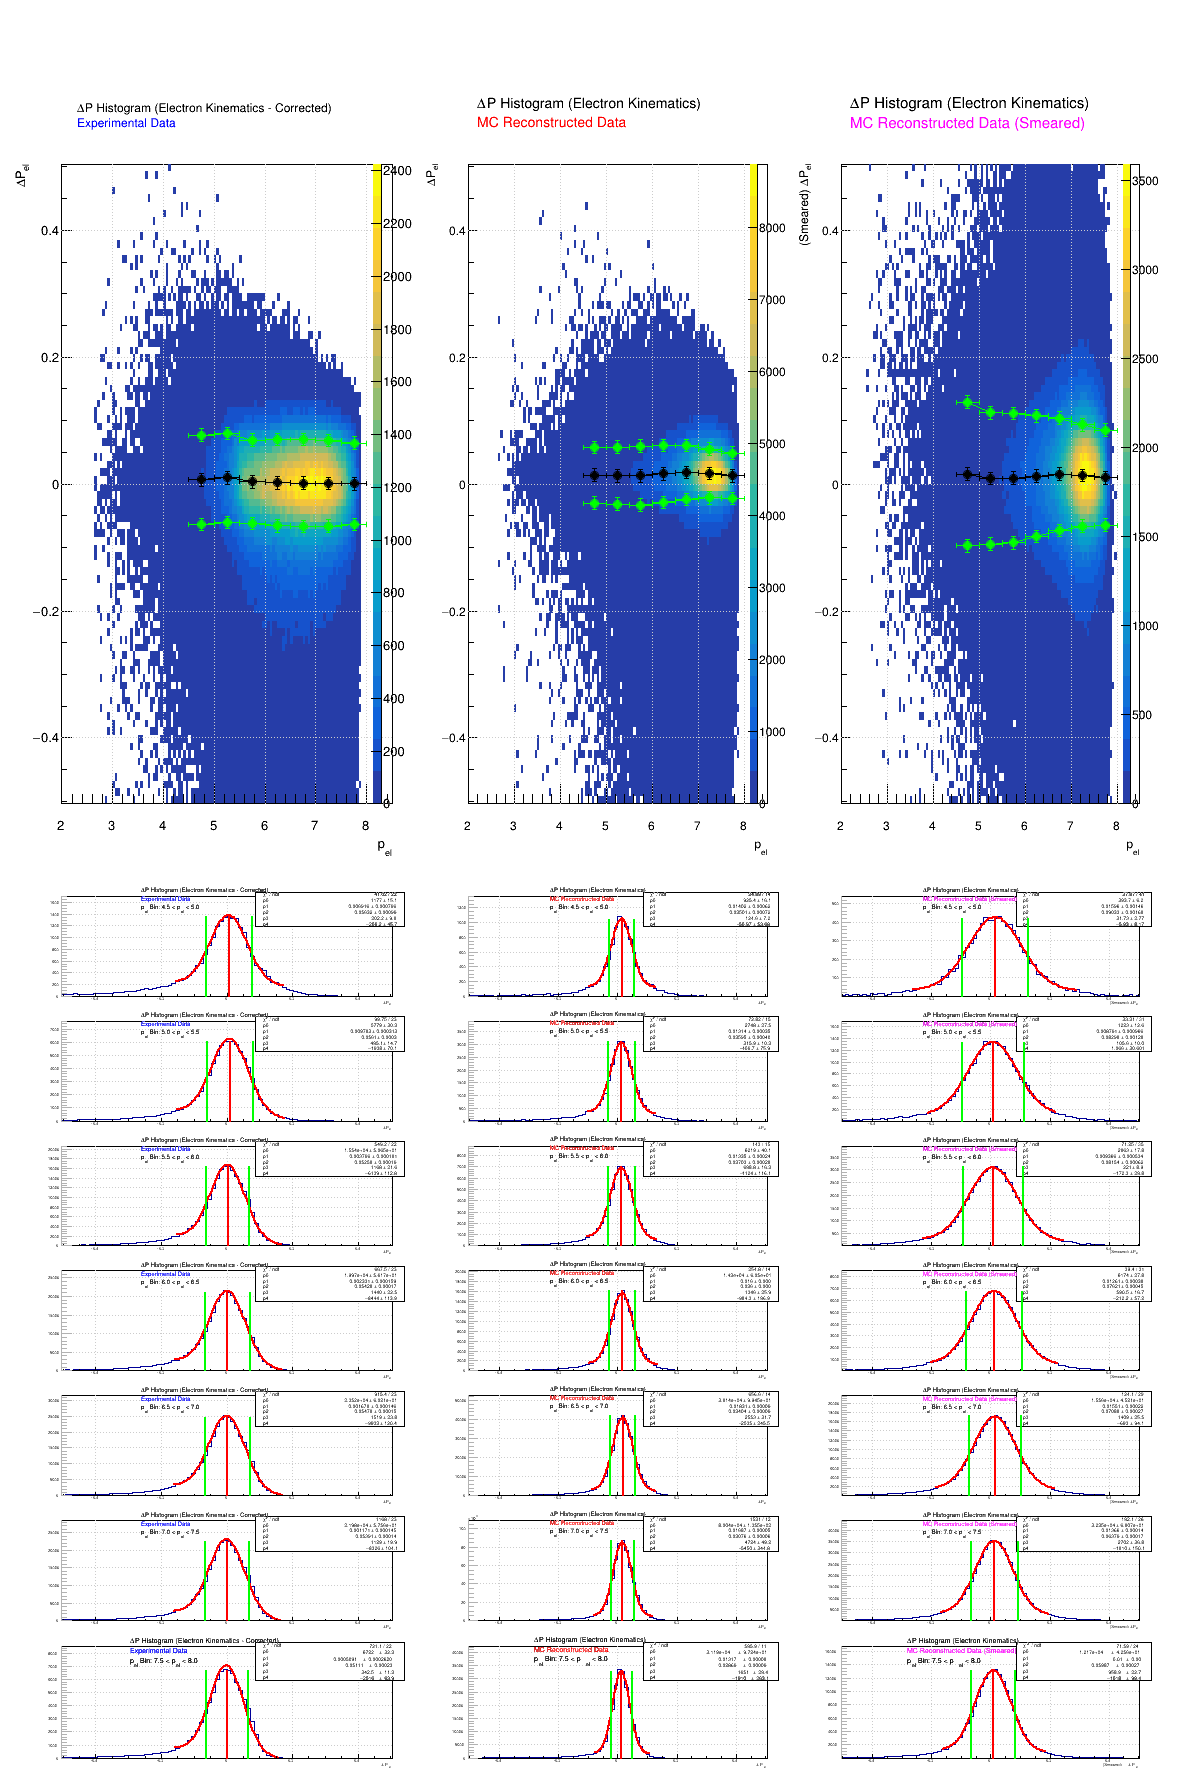

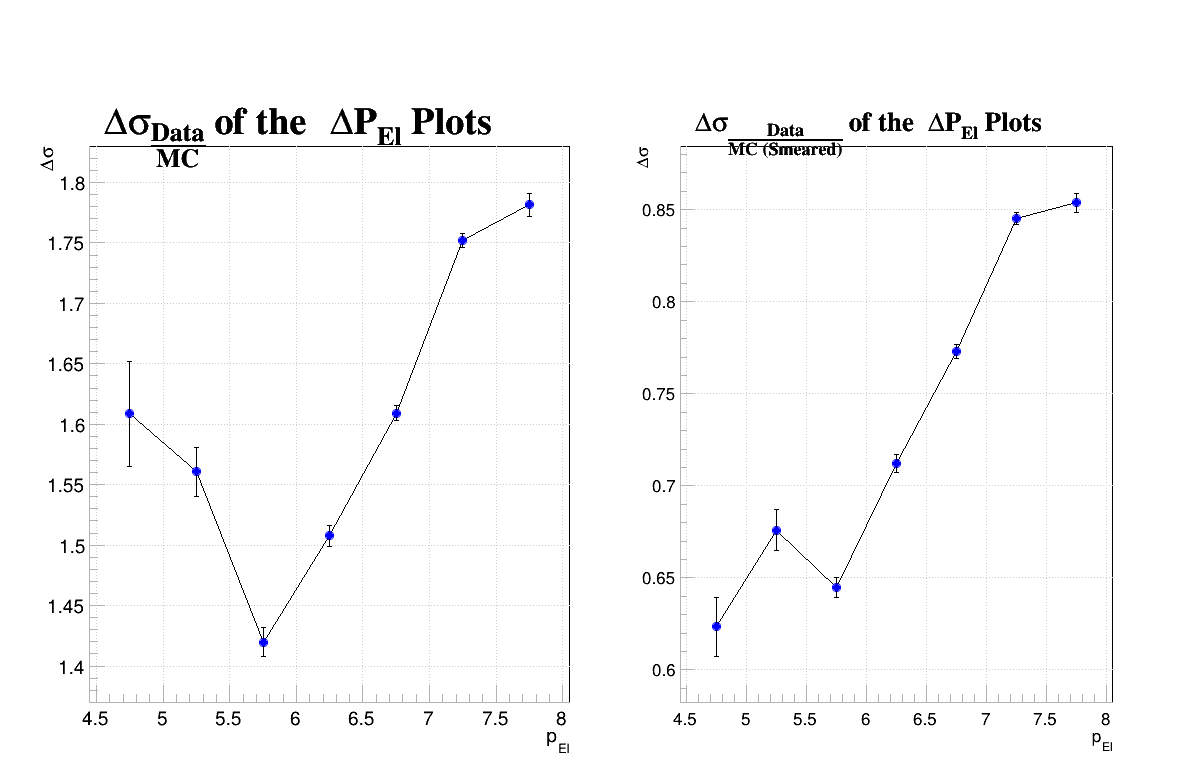

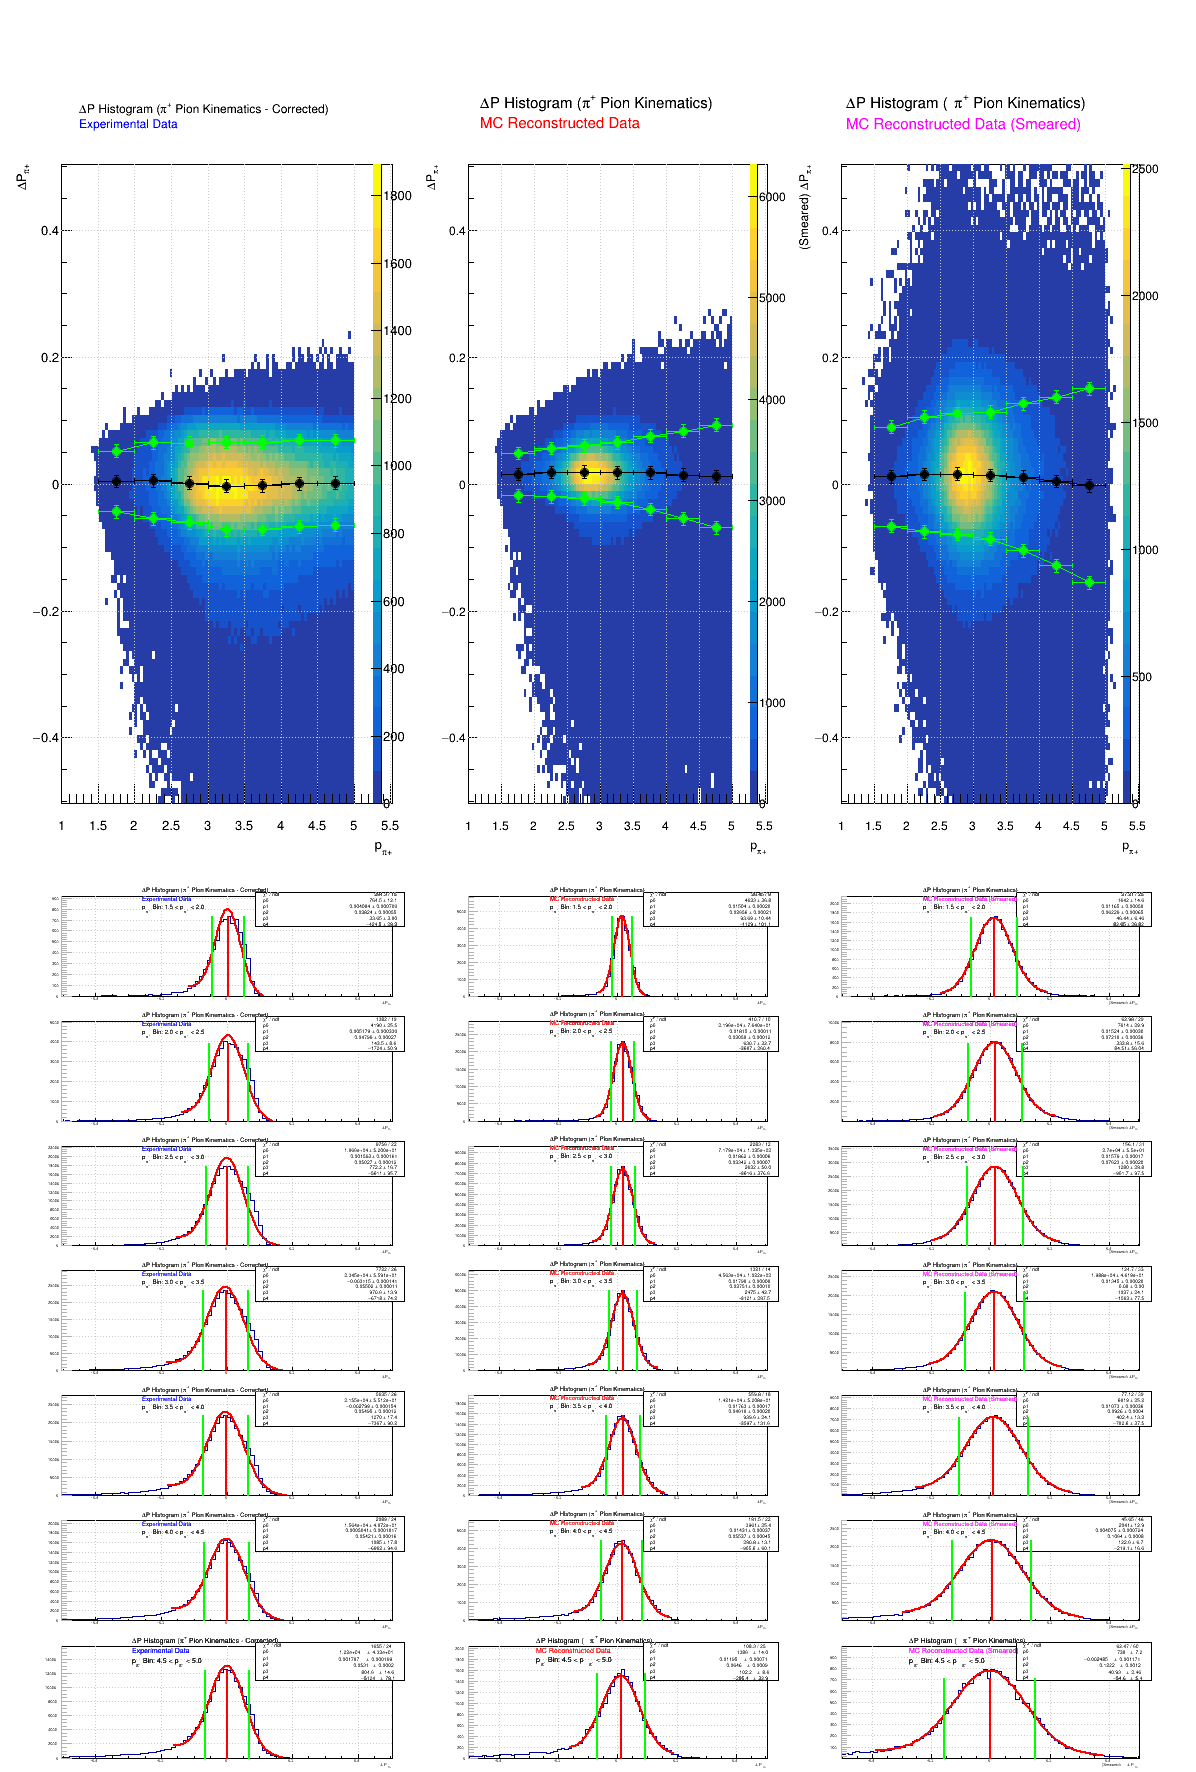

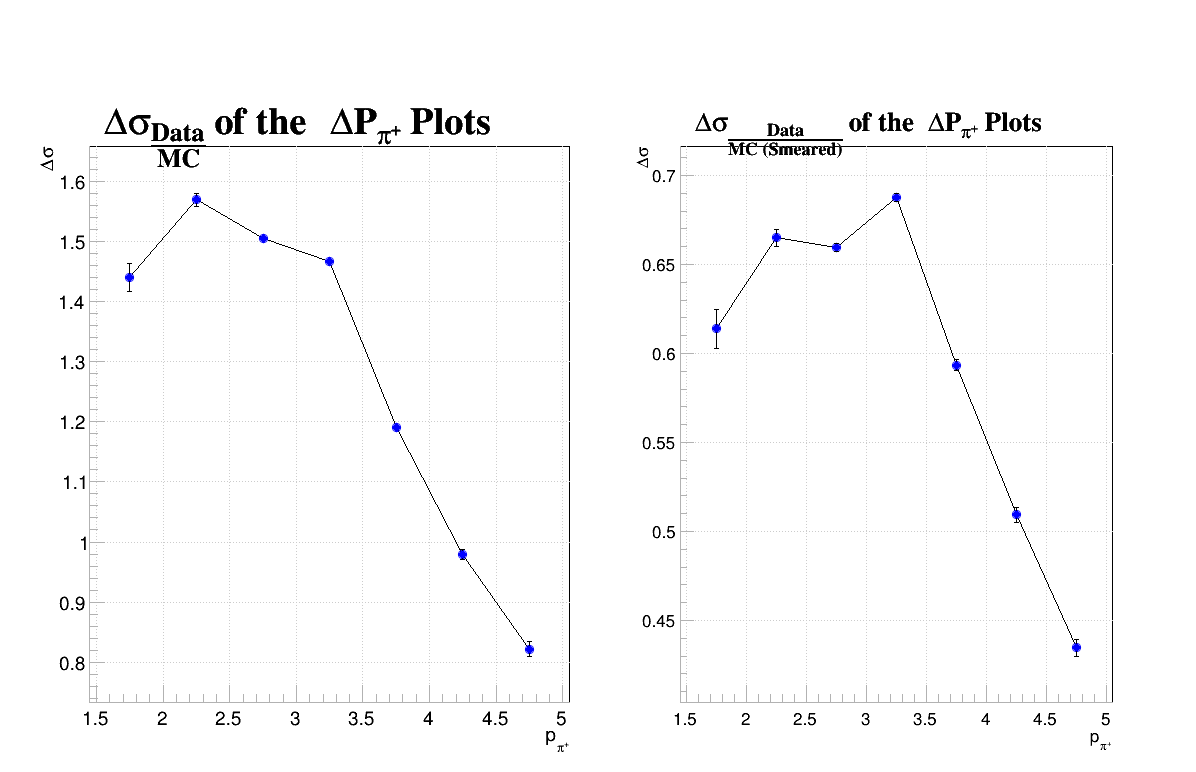

In [88]:
if("Mom_Cor_Histos" in Histo_Type):
    Mom_Cor_Canvas, Mom_Cor_Histos, TLine_Fits = {}, {}, {}
    try:
        for ii in rdf.GetListOfKeys():
            out_print_rdf = str(ii.GetName())
            
            out_print             = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='DF_ALL')")
            out_print_mdf         = out_print_rdf.replace("(Data-Type='rdf')", "(Data-Type='mdf')")
            out_print_mdf_smeared = out_print_mdf.replace("(Smear-Type='')", "(Smear-Type='smear')")

            if("Mom_Cor_Code" not in str(out_print)):
                continue

            # # # Missing Mass Histograms
            # if("Var-D1='MM'" not in str(out_print)):
            #     continue
            # else:
            #     out_print_mdf_smeared = out_print_mdf_smeared.replace("'MM'", "'MM_smeared'")

            # # ∆ Histograms Histograms
            if("Delta_Pel_Cors" not in str(out_print) and "Delta_Ppip_Cors" not in str(out_print)):
                continue
            # else:
            #     out_print_mdf_smeared = out_print_mdf_smeared.replace("'Delta_Pel_Cors'", "'Delta_Pel_Cors_smeared'")
            #     out_print_mdf_smeared = out_print_mdf_smeared.replace("'Delta_Ppip_Cors'", "'Delta_Ppip_Cors_smeared'")

            if("cut_Complete_EDIS" not in str(out_print)):
                continue

            if("Var-D2='el'" not in str(out_print) and "Var-D2='pip'" not in str(out_print)):
                continue

            print(out_print)
            
            # if(out_print_mdf_smeared in mdf.GetListOfKeys()):
            #     print("Good MS")
            # else:
            #     print(color.RED + "Bad MS" + color.END)
            # if(out_print_mdf in mdf.GetListOfKeys()):
            #     print("Good MR")
            # else:
            #     print(color.RED + "Bad MR" + color.END)
            # if(out_print_rdf in rdf.GetListOfKeys()):
            #     print("Good R")
            # else:
            #     print(color.RED + "Bad R" + color.END)

            try:
                Mom_Cor_Histos[out_print_rdf]         = rdf.Get(out_print_rdf)
                Mom_Cor_Histos[out_print_mdf]         = mdf.Get(out_print_mdf)
                Mom_Cor_Histos[out_print_mdf_smeared] = mdf.Get(out_print_mdf_smeared)
            except:
                print("".join([color.BOLD, color.RED, "ERROR IN GETTING HISTOGRAM(S) FROM DATAFRAME:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            # print(type(Mom_Cor_Histos[out_print]))
            # print(Mom_Cor_Histos[out_print_mdf_smeared])

            Mom_Cor_Canvas[out_print] = Canvas_Create(Name=out_print, Num_Columns=3, Num_Rows=2, Size_X=1200, Size_Y=1800, cd_Space=0)

            if("3D" in str(type(Mom_Cor_Histos[out_print_rdf]))):
                Mom_Cor_Histos[out_print_rdf] = Mom_Cor_Histos[out_print_rdf].Project3D('yx')
                Mom_Cor_Histos[out_print_rdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Blue), "]{Experimental Data}}"]))
                Mom_Cor_Histos[out_print_rdf].SetTitle(str(Mom_Cor_Histos[out_print_rdf].GetTitle()).replace("/Sector", ""))
                
            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf]))):
                Mom_Cor_Histos[out_print_mdf] = Mom_Cor_Histos[out_print_mdf].Project3D('yx')
                Mom_Cor_Histos[out_print_mdf].SetTitle("".join(["#splitline{", str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("yx projection", ""), "}{#color[", str(root_color.Red), "]{MC Reconstructed Data}}"]))
                Mom_Cor_Histos[out_print_mdf].SetTitle(str(Mom_Cor_Histos[out_print_mdf].GetTitle()).replace("/Sector", ""))
                
            if("3D" in str(type(Mom_Cor_Histos[out_print_mdf_smeared]))):
                Mom_Cor_Histos[out_print_mdf_smeared] = Mom_Cor_Histos[out_print_mdf_smeared].Project3D('yx')
                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle("".join(["#splitline{", str((Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("yx projection", "")).replace("(Smeared) ", ""), "}{#color[", str(root_color.Pink), "]{MC Reconstructed Data (Smeared)}}"]))
                Mom_Cor_Histos[out_print_mdf_smeared].SetTitle(str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()).replace("/Sector", ""))
                

            if("Delta" in out_print):
                Mom_Cor_Histos[out_print_rdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                Mom_Cor_Histos[out_print_mdf].GetYaxis().SetRangeUser(-0.5, 0.5)
                Mom_Cor_Histos[out_print_mdf_smeared].GetYaxis().SetRangeUser(-0.5, 0.5)
                if("Var-D2='el'" in str(out_print)):
                    
                    if("Delta_P" in str(out_print)):
                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=4.5, maxR=8, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="el", D_Angle=False, Cut_Q=True)
                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=4.5, maxM=8, dM=0.5, particle="el", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                    
                    Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(2, 8.5)
                    Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(2, 8.5)
                    Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(2, 8.5)
                    
                if("Var-D2='pip'" in str(out_print)):
                    
                    if("Delta_P" in str(out_print)):
                        test_canvas = Canvas_Create(Name="test", Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_rdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                        # fit_Dp_2D(h2=Mom_Cor_Histos[out_print_mdf_smeared], minR=1.5, maxR=5, dR=0.5, Title=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()), Particle="pip", D_Angle=False, Cut_Q=True)
                        Sigma_Smearing_Correction(Histo2D_Data=Mom_Cor_Histos[out_print_rdf], Histo2D_MC=Mom_Cor_Histos[out_print_mdf], Histo2D_MC_Smear=Mom_Cor_Histos[out_print_mdf_smeared], minM=1.5, maxM=5, dM=0.5, particle="pip", Title_Data=str(Mom_Cor_Histos[out_print_rdf].GetTitle()), Title_MC=str(Mom_Cor_Histos[out_print_mdf].GetTitle()), Title_MC_Smeared=str(Mom_Cor_Histos[out_print_mdf_smeared].GetTitle()))
                    
                    Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(1, 5.5)
                    Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(1, 5.5)
                    Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(1, 5.5)
                    

            Mom_Cor_Canvas[out_print].Draw()
            try:
                Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                # ROOT.gPad.SetLogz(1)
                Mom_Cor_Histos[out_print_rdf].Draw("colz")
                # Mom_Cor_Histos[out_print_rdf].GetXaxis().SetRangeUser(4.55, 5.05)
                
                
                Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                # ROOT.gPad.SetLogz(1)
                Mom_Cor_Histos[out_print_mdf].Draw("colz")
                # Mom_Cor_Histos[out_print_mdf].GetXaxis().SetRangeUser(4.55, 5.05)
                
                
                Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                # ROOT.gPad.SetLogz(1)
                Mom_Cor_Histos[out_print_mdf_smeared].Draw("colz")
                # Mom_Cor_Histos[out_print_mdf_smeared].GetXaxis().SetRangeUser(4.55, 5.05)
                
                
                
                Mom_Cor_Canvas[out_print].Modified()
                Mom_Cor_Canvas[out_print].Update()
                
                palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_rdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                palette_move(canvas=Mom_Cor_Canvas[out_print], histo=Mom_Cor_Histos[out_print_mdf_smeared], x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
                
                try:
                    Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    Mom_Cor_Histos[out_print_rdf].gr2.Draw("same PL")
                    
                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetLineColor(root_color.Green)
                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetLineColor(root_color.Green)
                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_up.Draw("same PL")
                    Mom_Cor_Histos[out_print_rdf].gr2_sigma_down.Draw("same PL")
                except:
                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                try:
                    Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    Mom_Cor_Histos[out_print_mdf].gr2.Draw("same PL")
                    
                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetLineColor(root_color.Green)
                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetLineColor(root_color.Green)
                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.SetMarkerColor(root_color.Green)
                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_up.Draw("same PL")
                    Mom_Cor_Histos[out_print_mdf].gr2_sigma_down.Draw("same PL")
                except:
                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                try:
                    Draw_Canvas(canvas=Mom_Cor_Canvas[out_print], cd_num=3, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2.Draw("same PL")
                    
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetLineColor(root_color.Green)
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetLineColor(root_color.Green)
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.SetMarkerColor(root_color.Green)
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.SetMarkerColor(root_color.Green)
                    
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_up.Draw("same PL")
                    Mom_Cor_Histos[out_print_mdf_smeared].gr2_sigma_down.Draw("same PL")
                except:
                    print("".join([color.BOLD, color.RED, "ERROR IN ∆P Fits:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

                    

                Mom_Cor_Canvas_cd_4 = Mom_Cor_Canvas[out_print].cd(4)
                Mom_Cor_Canvas_cd_4.Divide(1, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 0, 0)
                
                for ii in range(0, len(Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices), 1):    
                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_4, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].Draw("same")
                    Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMaximum())
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineColor(root_color.Red)
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_4_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_rdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_rdf].FindPeak_y[ii])
                    
                    
                Mom_Cor_Canvas_cd_5 = Mom_Cor_Canvas[out_print].cd(5)
                Mom_Cor_Canvas_cd_5.Divide(1, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 0, 0)
                
                for ii in range(0, len(Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices), 1):    
                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_5, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    # Mom_Cor_Canvas_cd_5.cd(ii + 1)
                    Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].Draw("same")
                    Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMaximum())
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineColor(root_color.Red)
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])
                    
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])
                    
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_5_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf].FindPeak_y[ii])

                Mom_Cor_Canvas_cd_6 = Mom_Cor_Canvas[out_print].cd(6)
                Mom_Cor_Canvas_cd_6.Divide(1, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 0, 0)
                
                for ii in range(0, len(Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices), 1):    
                    Draw_Canvas(canvas=Mom_Cor_Canvas_cd_6, cd_num=(ii + 1), left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                    # Mom_Cor_Canvas_cd_6.cd(ii + 1)
                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].Draw("same")
                    Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetYaxis().SetRangeUser(0.75*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), 1.25*Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMaximum())
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineColor(root_color.Red)
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii)])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_x[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineColor(root_color.Green)
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Up"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Up[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])] = ROOT.TLine()
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineColor(root_color.Green)
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].SetLineWidth(2)
                    TLine_Fits["".join([str(out_print), "_cd_6_", str(ii), "_Sigma_Down"])].DrawLine(Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].Histo_1D_Slices[ii].GetMinimum(), Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_Sigma_Down[ii], Mom_Cor_Histos[out_print_mdf_smeared].FindPeak_y[ii])
                    
                    
                    
                Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])] = Canvas_Create(Name="".join([str(out_print), "_Smear_Compare"]), Num_Columns=2, Num_Rows=1, Size_X=1200, Size_Y=800, cd_Space=0)
                Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])].Draw()
                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=1, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.Draw("ALP same")
                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC.SetMarkerColor(root_color.Blue)
                
                Draw_Canvas(canvas=Mom_Cor_Canvas["".join([str(out_print), "_Smear_Compare"])], cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetTitle("".join([root_color.Bold, "{#scale[2]{#Delta#sigma_{#frac{Data}{MC (Smeared)}} of the #DeltaP_{", "#pi^{+}" if("pip" in str(out_print)) else "El","} Plots}}; ", "p" if(("Var-D2='pip'" in str(out_print)) or ("Var-D2='el'" in str(out_print))) else "#theta", "_{", "#pi^{+}" if("pip" in str(out_print)) else "El","}; #Delta#sigma"]))
                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.Draw("ALP same")
                Mom_Cor_Histos[out_print_rdf].gr2_Data_MC_Smear.SetMarkerColor(root_color.Blue)
                
            except:
                print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                
    except:
        print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

    try:
        alert()
    except:
        print("Alerts have not been set...")
        
else:
    print("".join([color.BOLD, "\nThis cell has not been set to run (include 'Mom_Cor_Histos' in the 'Histo_Type' list and make sure that 'rdf' and 'mdf' are both defined)\n", color.END]))

In [17]:
# for ii in mdf.GetListOfKeys():
#     out_print_mdf = str(ii.GetName())
#     if("smear" in str(out_print_mdf)):
#         print(out_print_mdf)

.

.

.

# Plot Creation (Each Dataframe at the same time)


((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=All, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=20, MinBin=1.48, MaxBin=11.87]))
Starting SVD Unfolding Procedure...
Starting Bin-by-Bin Unfolding Procedure...
Finished Unfolding: Q2

((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=1, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=20, MinBin=1.48, MaxBin=11.87]))
Starting SVD Unfolding Procedure...
Starting Bin-by-Bin Unfolding Procedure...
Finished Unfolding: Q2

((Histo-Group='Response_Matrix_Normal'), (Data-Type='DataFrame_Type'), (Data-Cut='cut_Complete_SIDIS'), (Smear-Type=''), (Binning-Type='2'-[Q2-xB-Bin=3, z-PT-Bin=All]), (Var-D1='Q2'-[NumBins=20, MinBin=1.48, MaxBin=11.87]))
Starting SVD Unfolding Procedure...
Starting Bin-by-Bin Unfolding Procedure...
Finished Unfolding: Q2

((Histo-Group='R

Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 0.002808
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 6229.181685
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 0.019736
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 2683.098522
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 0.003373
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 1.289380
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 0.002107
Info in <TSVDUnfold::Unfold>: Unfolding param: 13
Info in <TSVDUnfold::Unfold>: Curvature of weight distribution: 0.001724
Info in <T

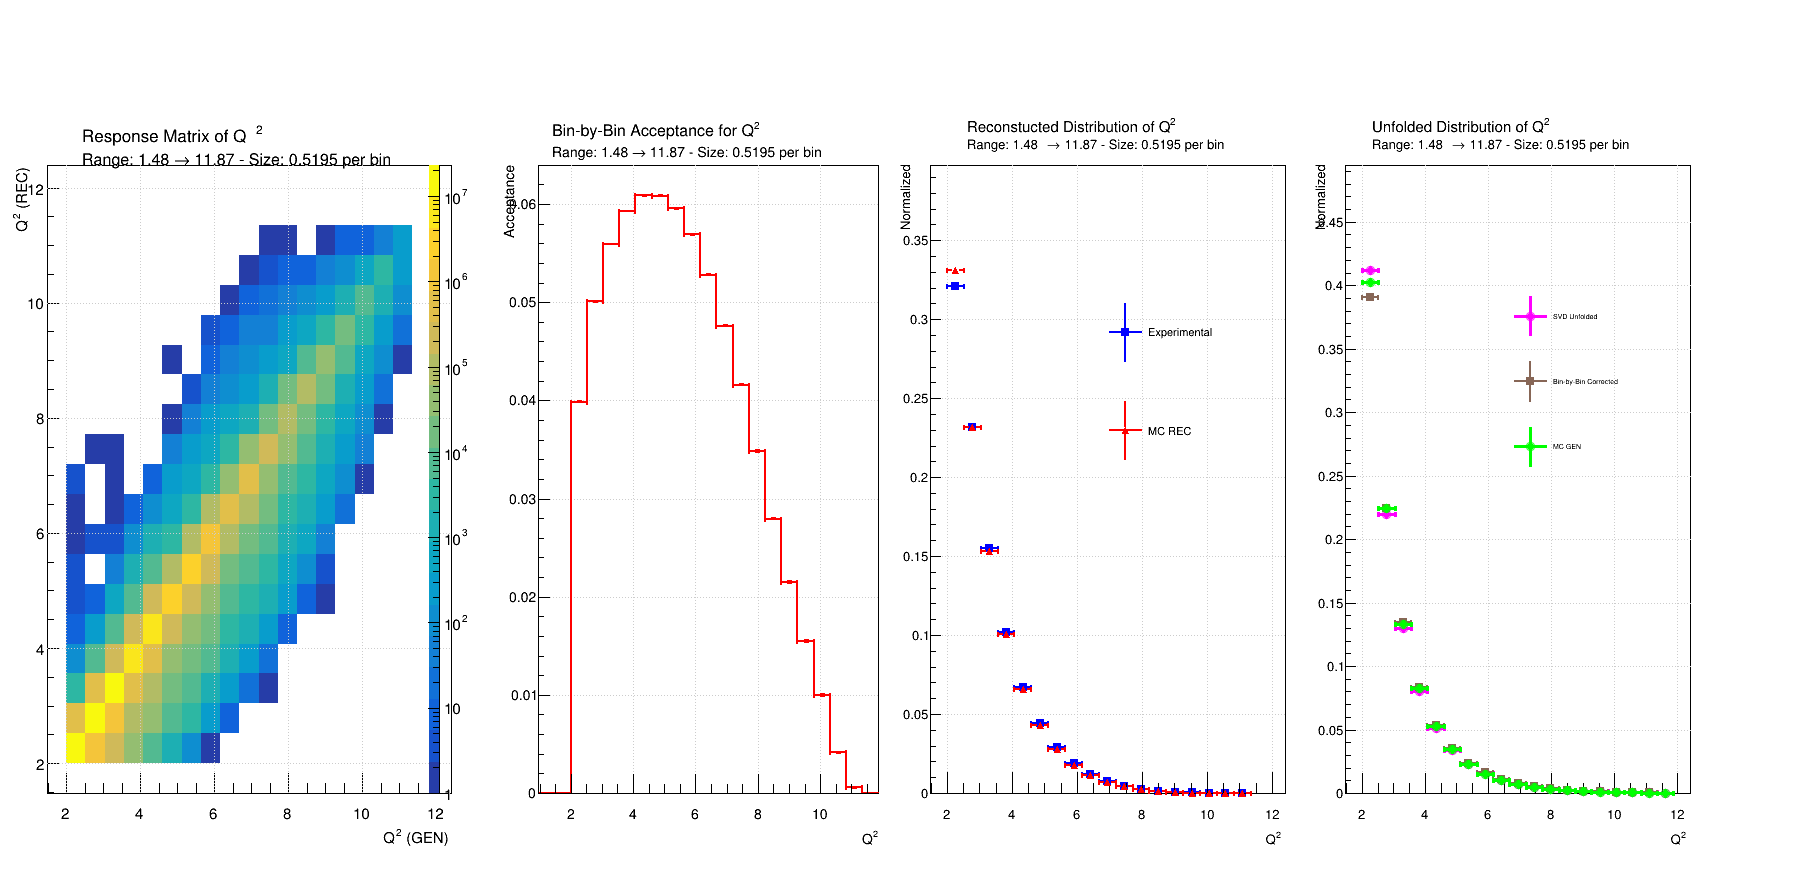

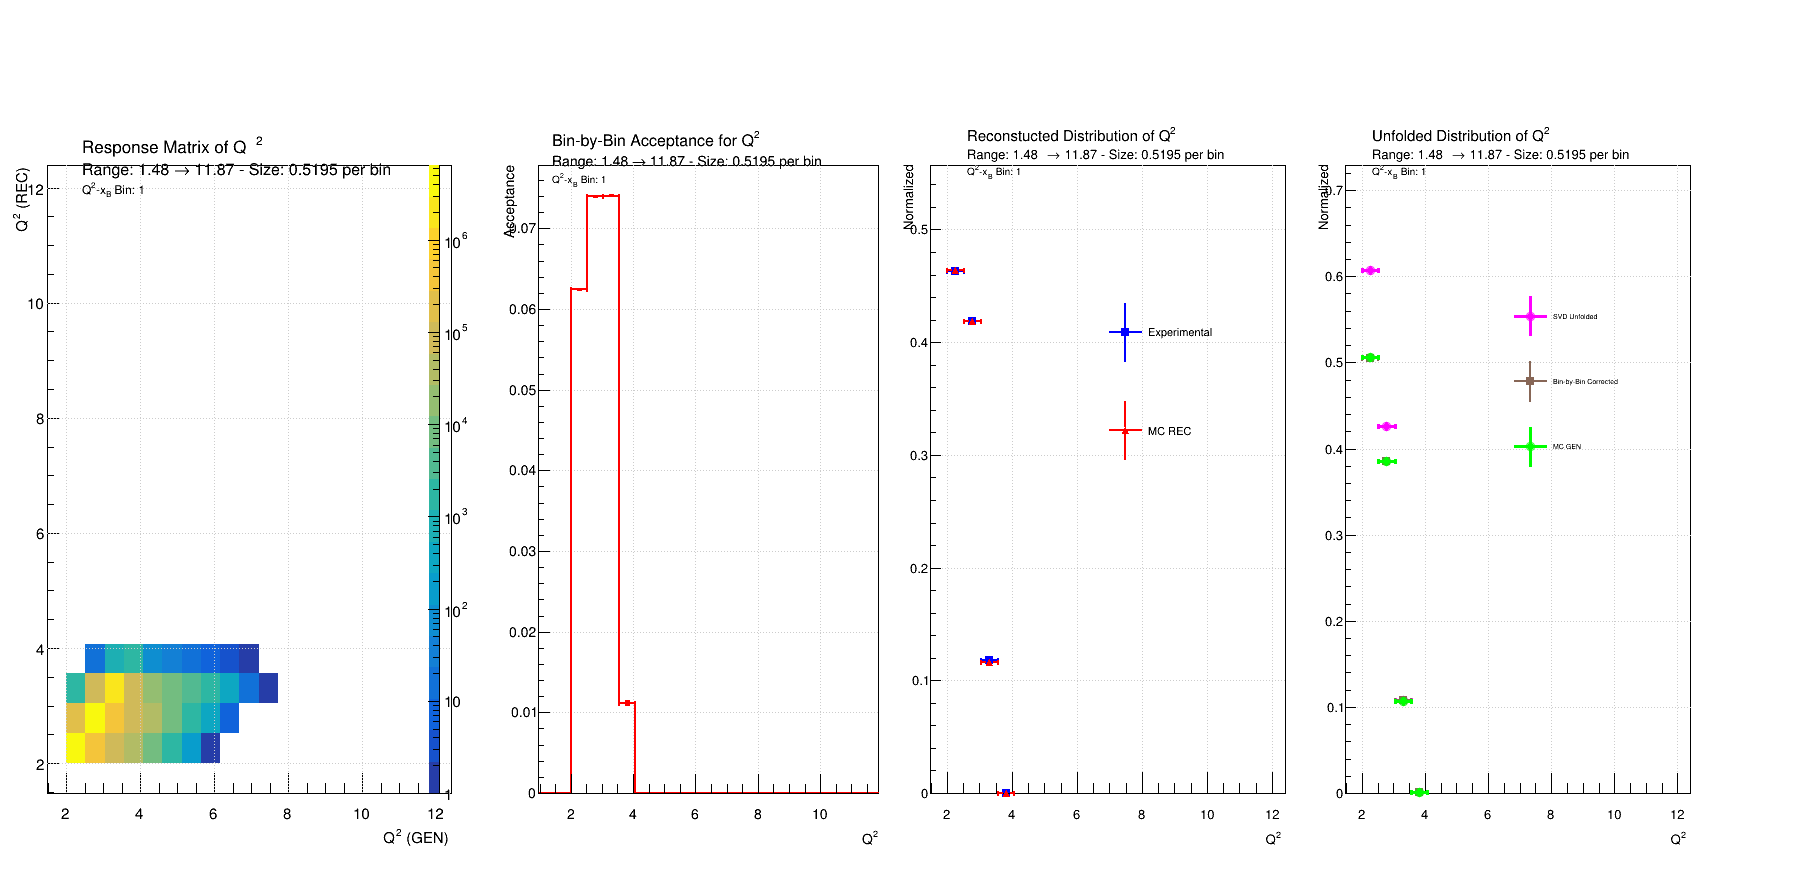

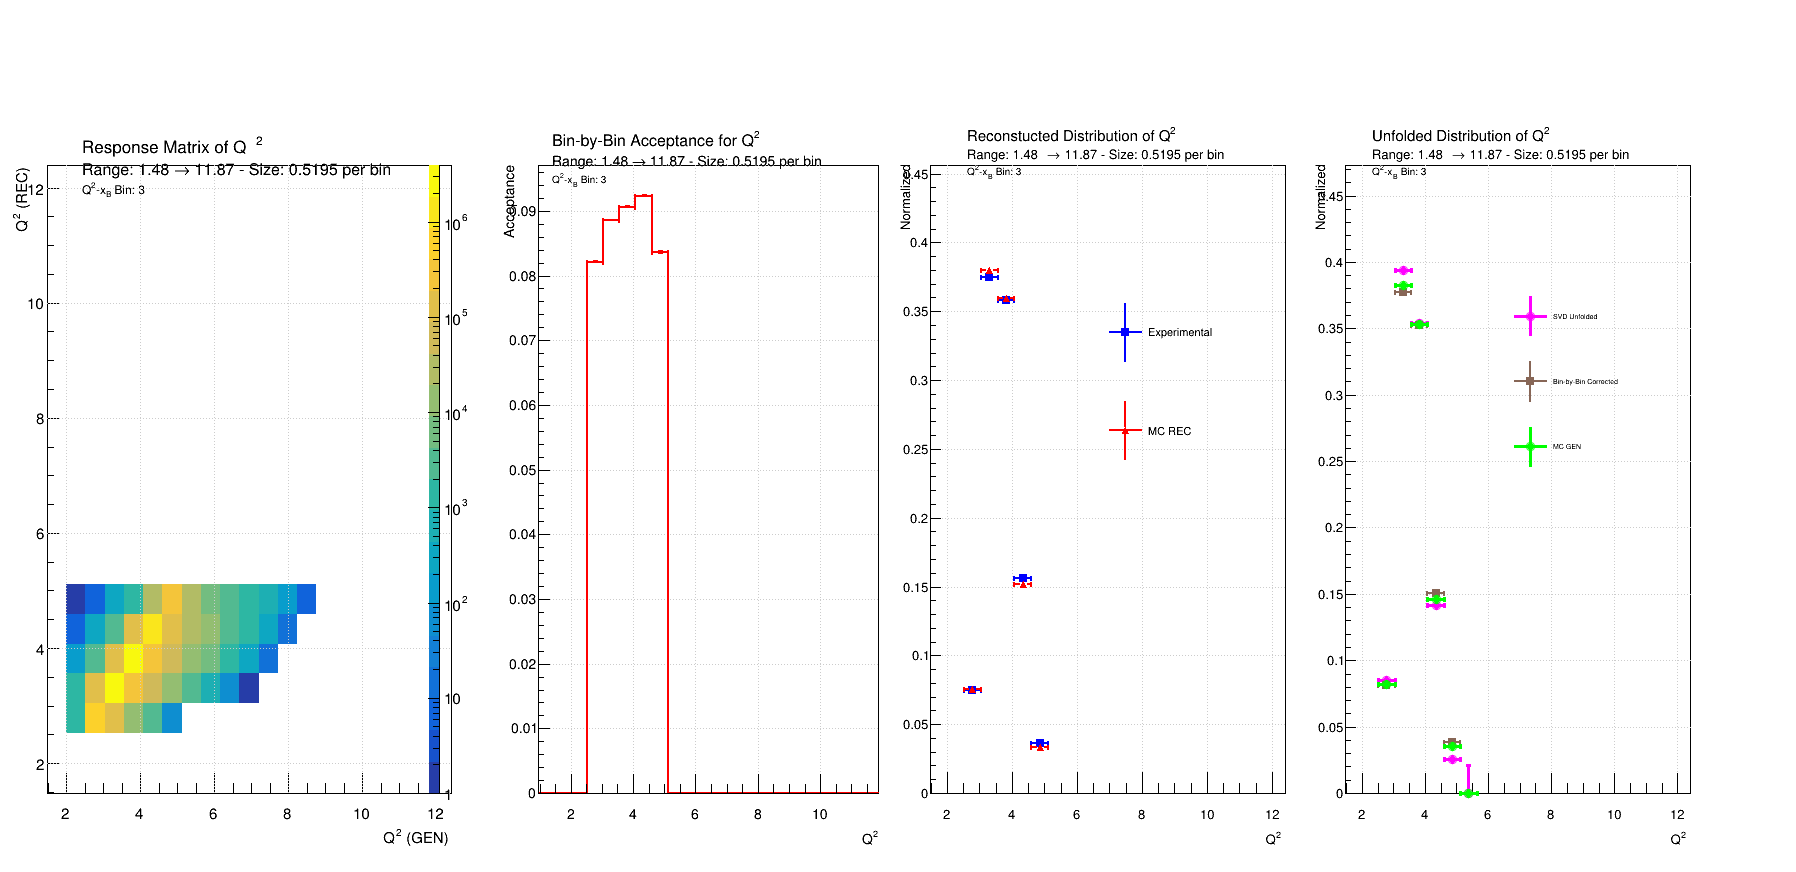

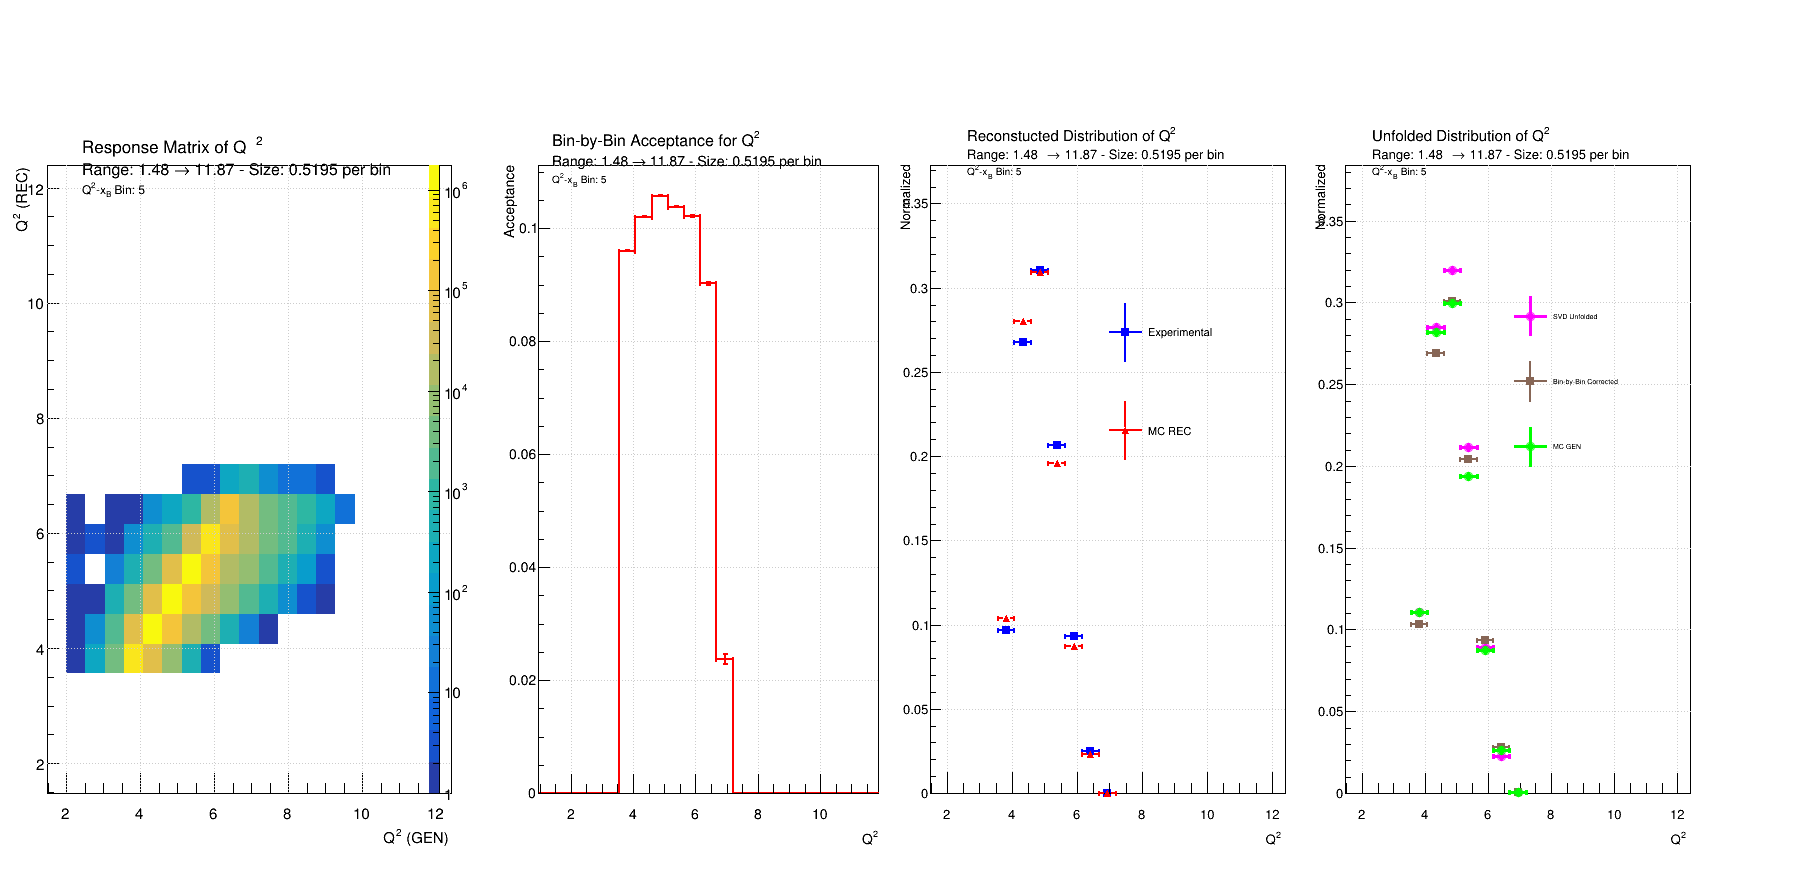

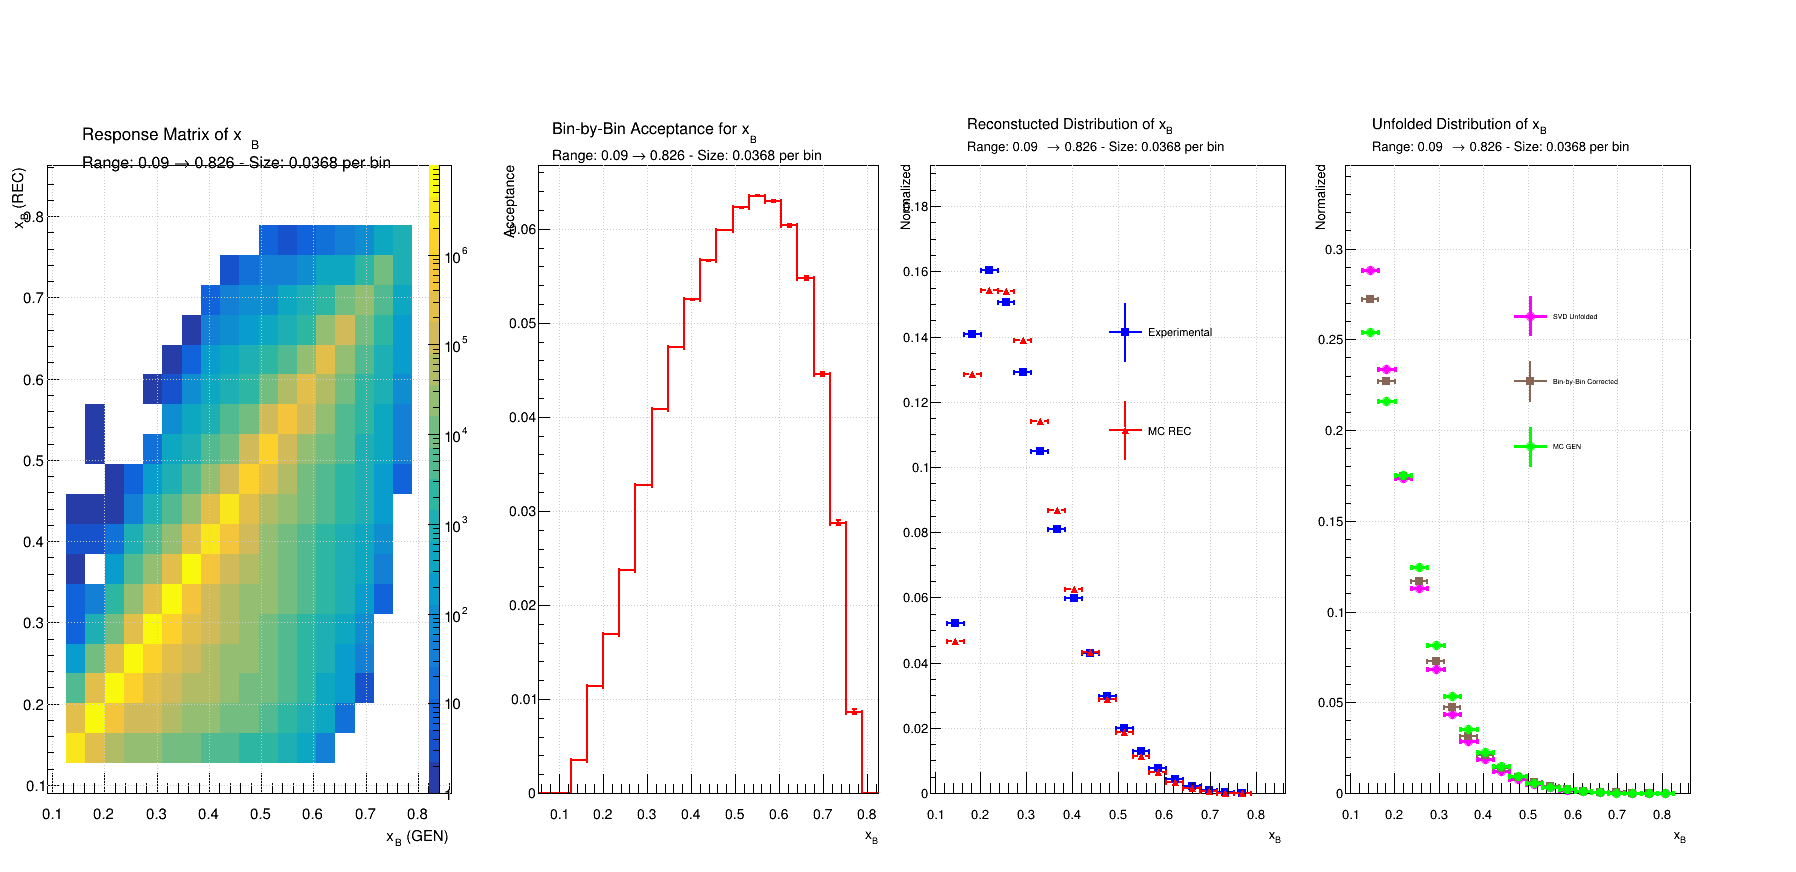

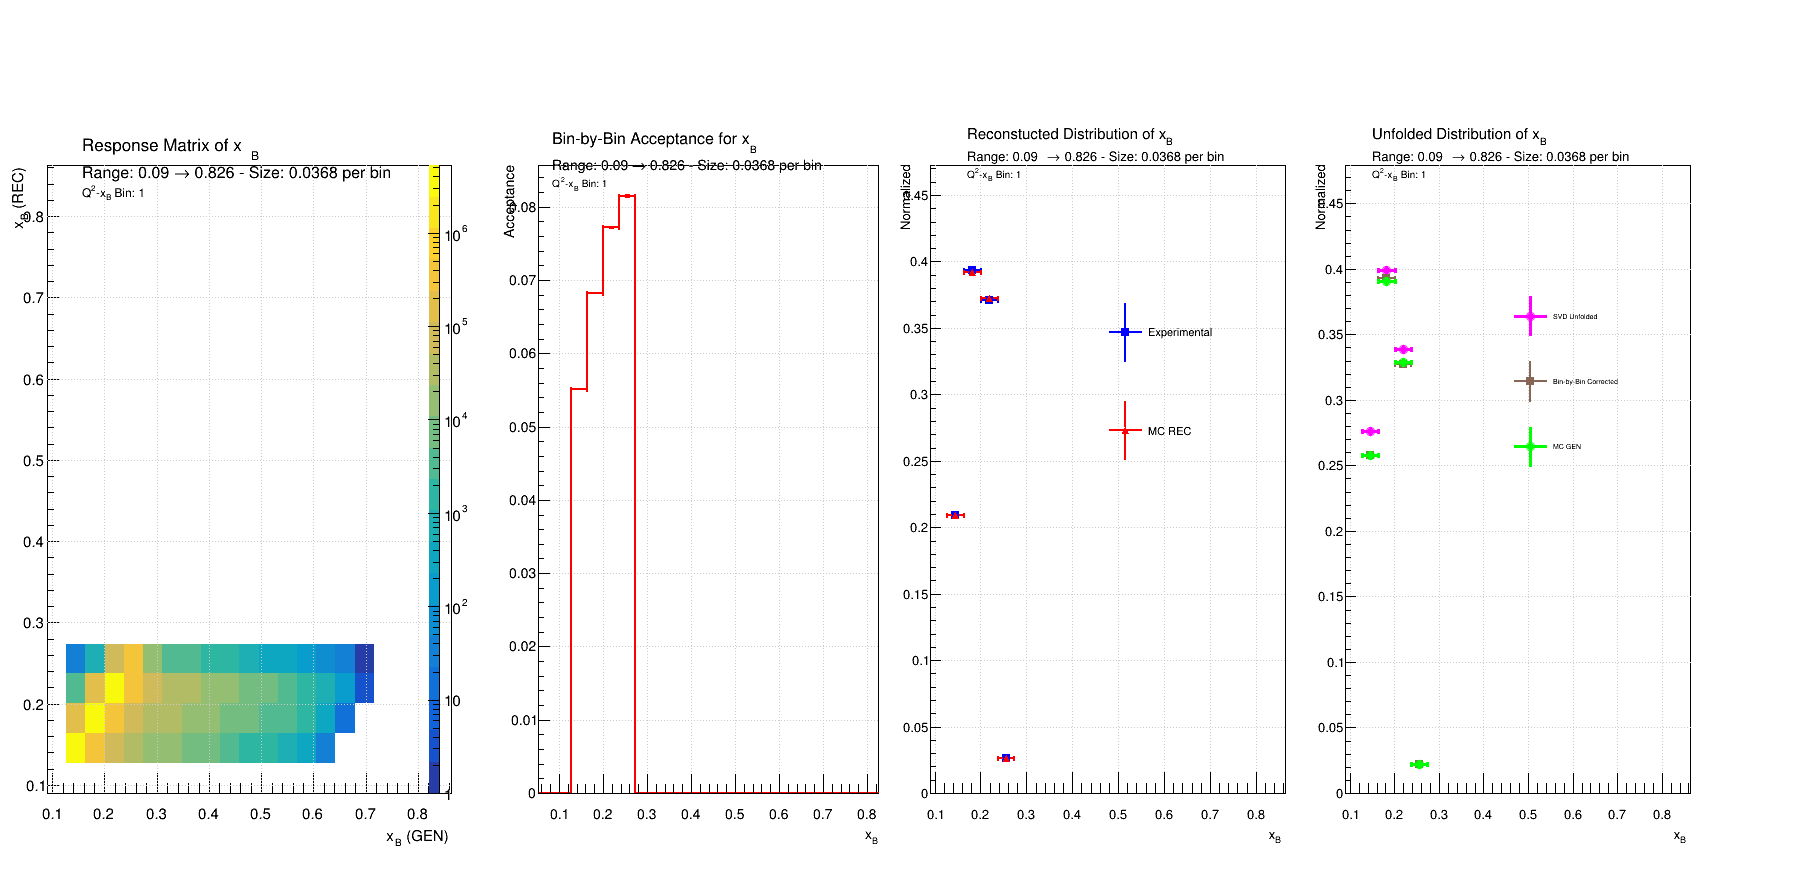

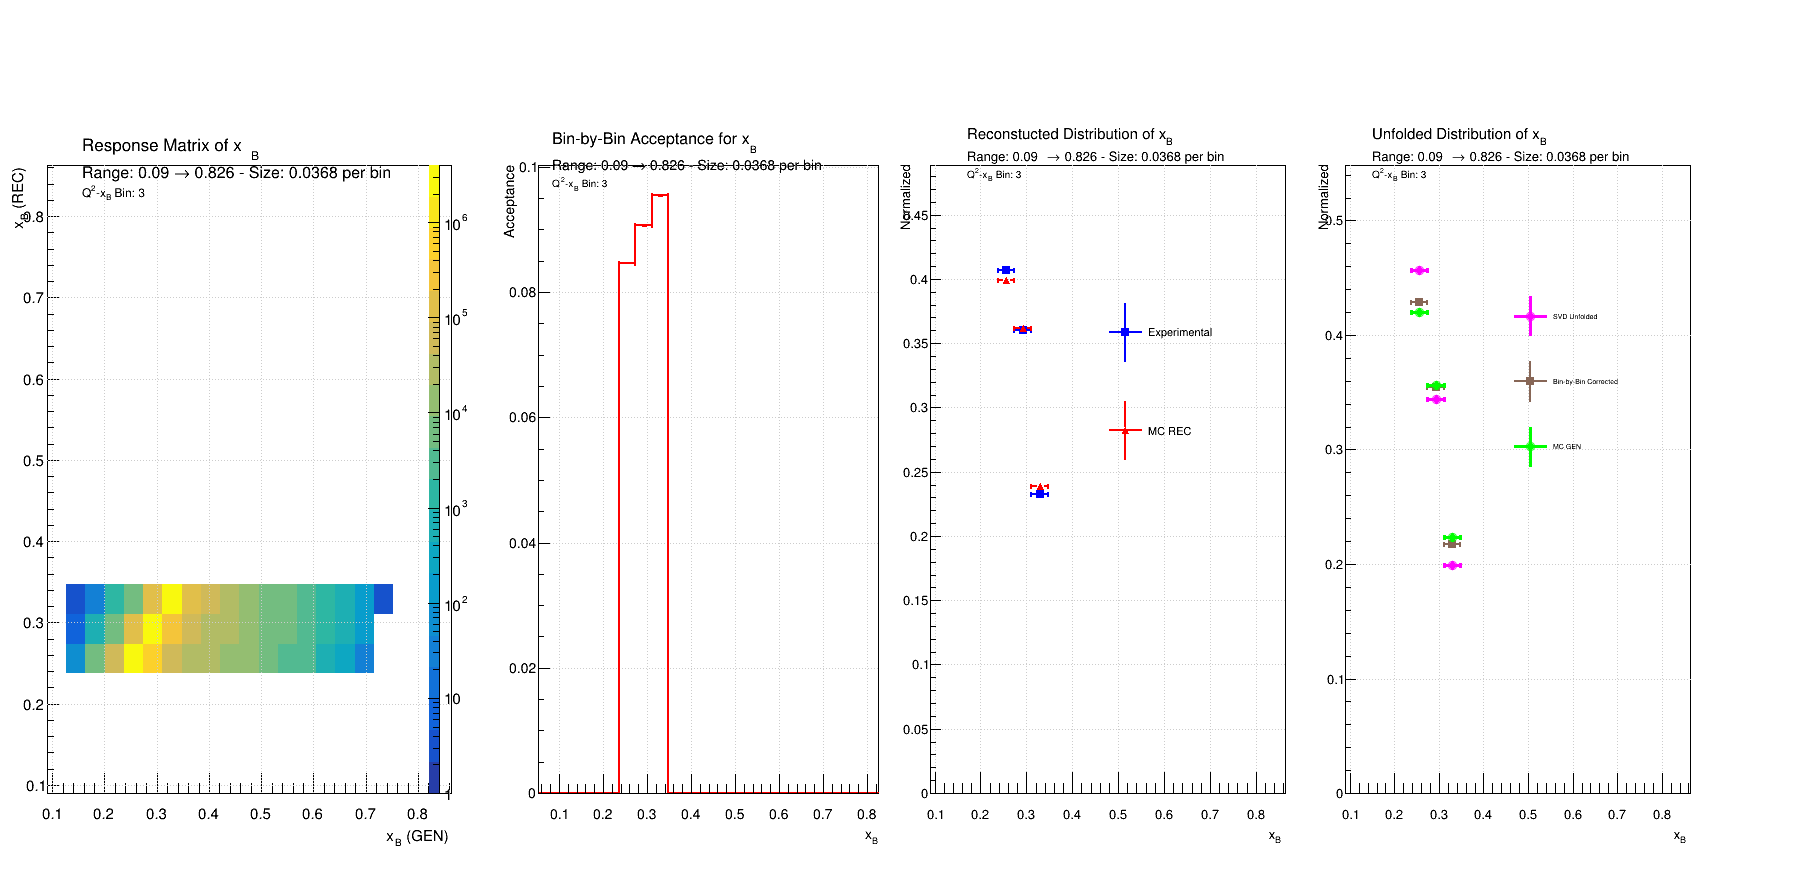

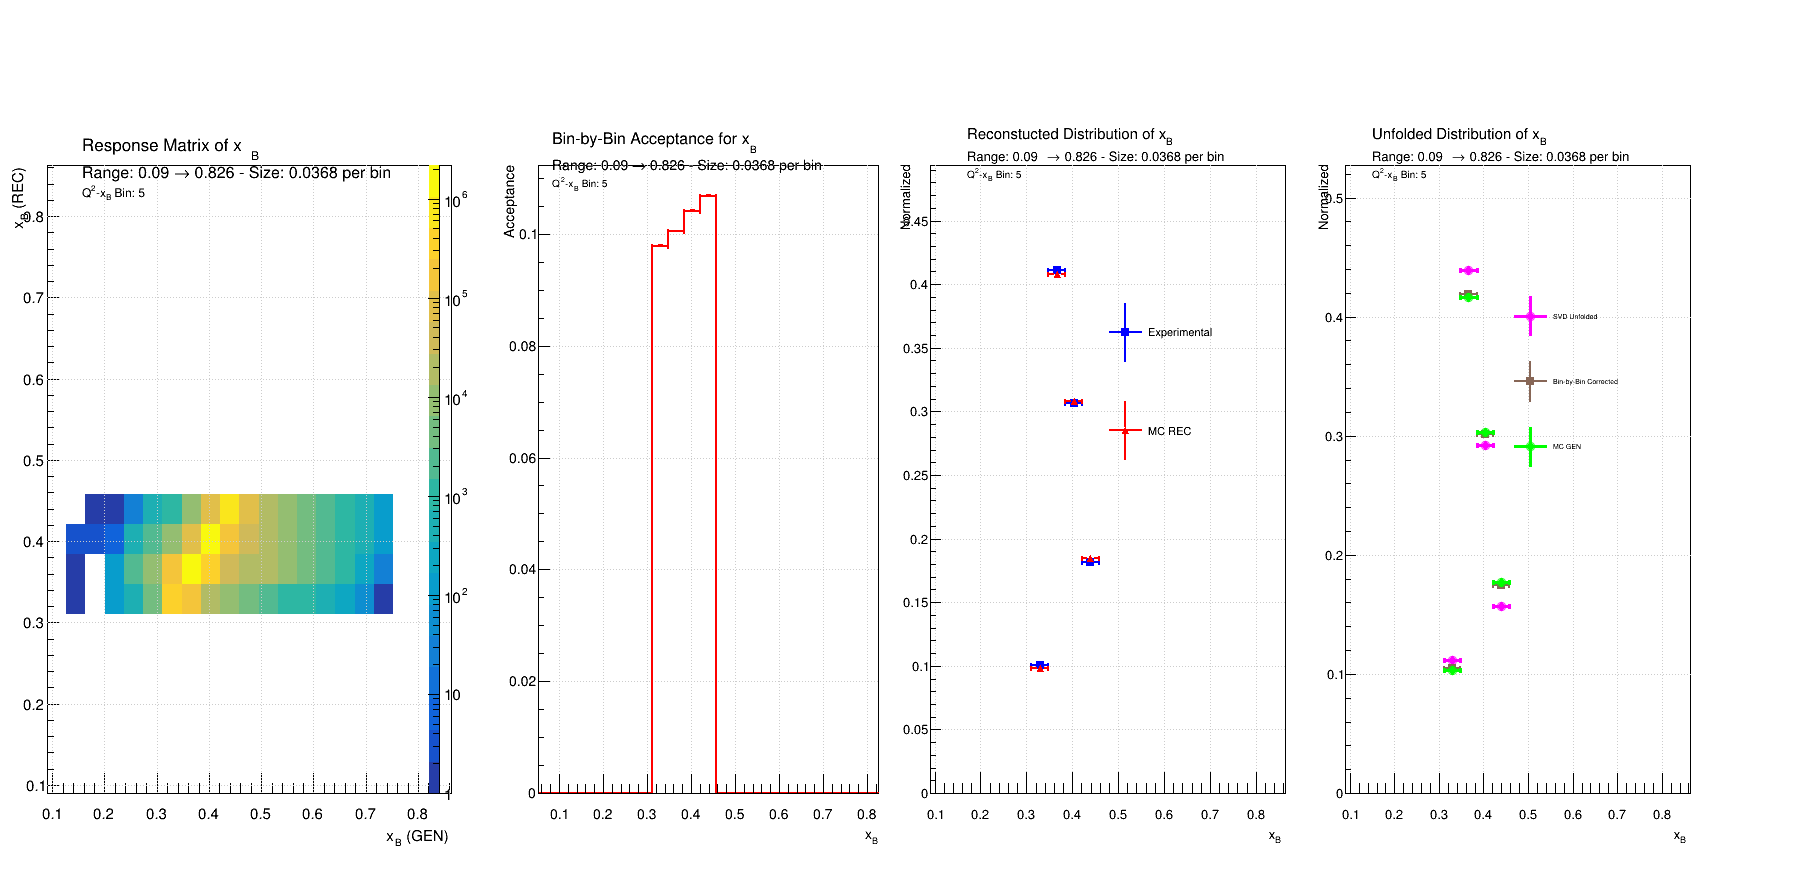

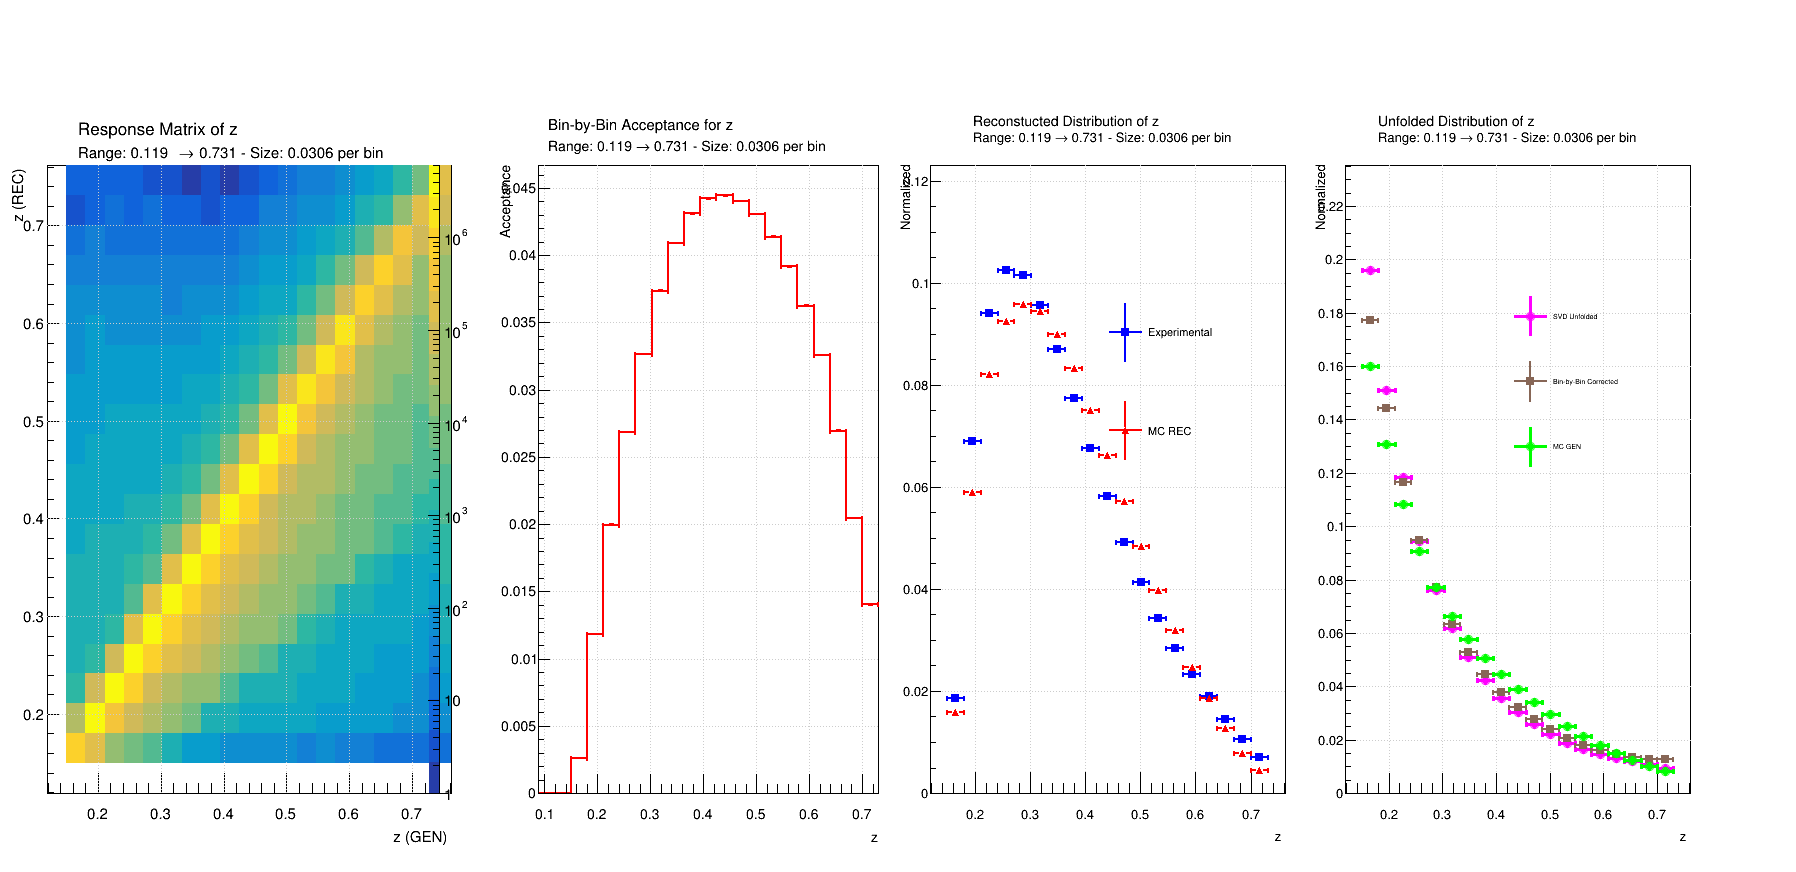

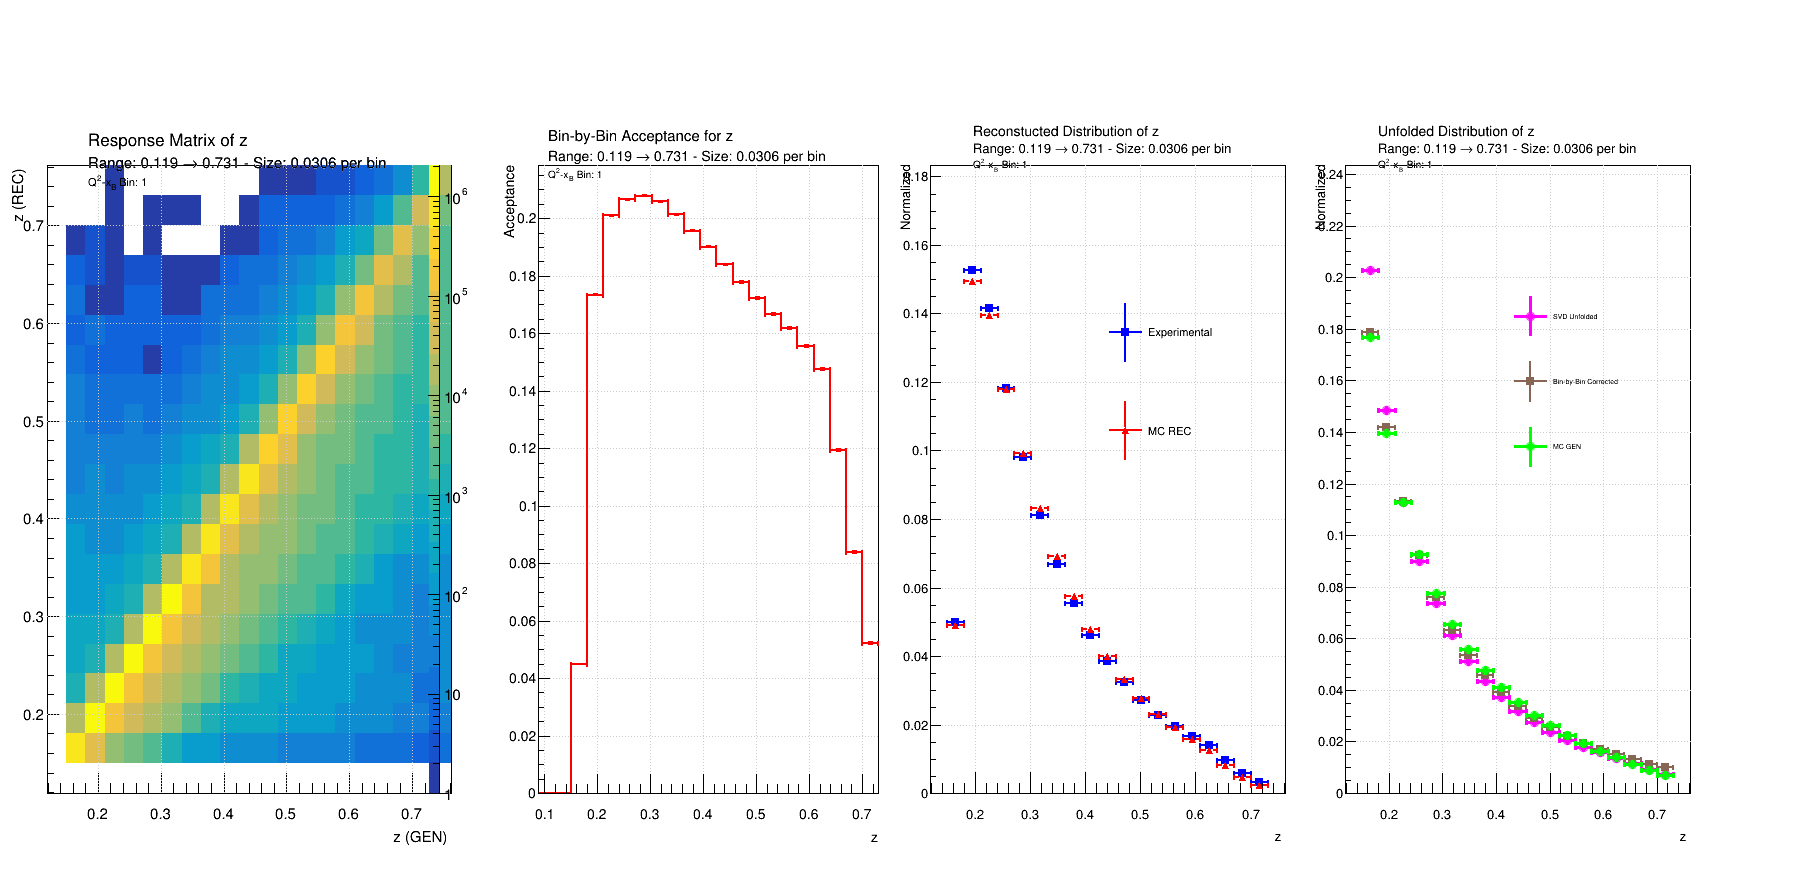

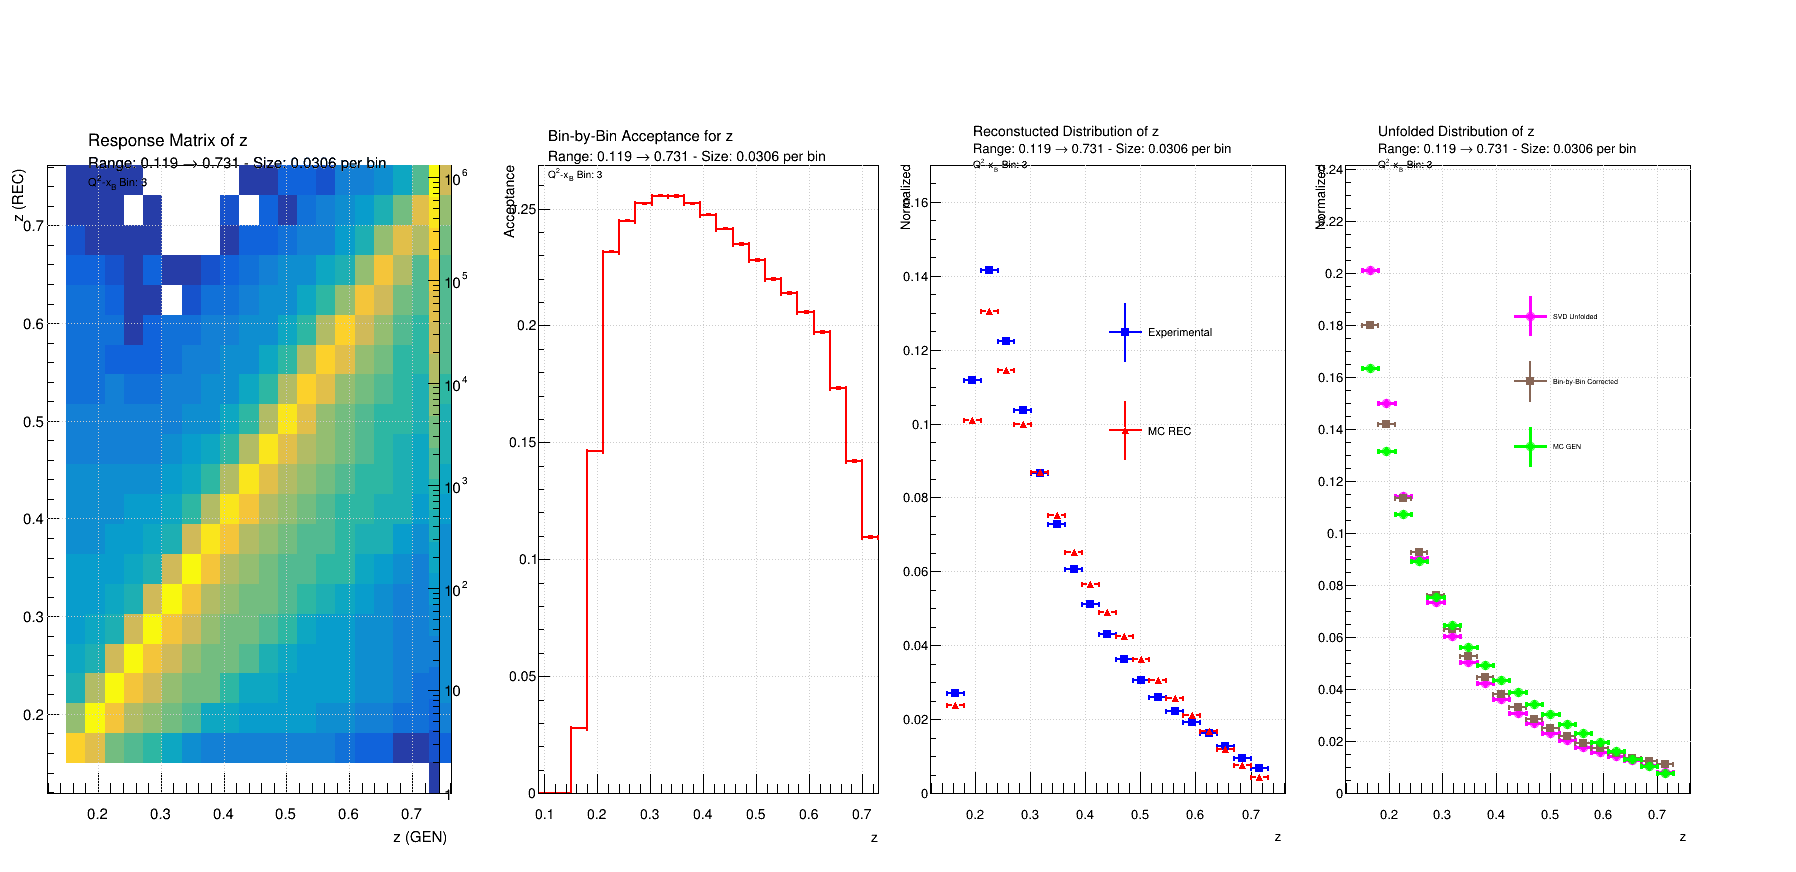

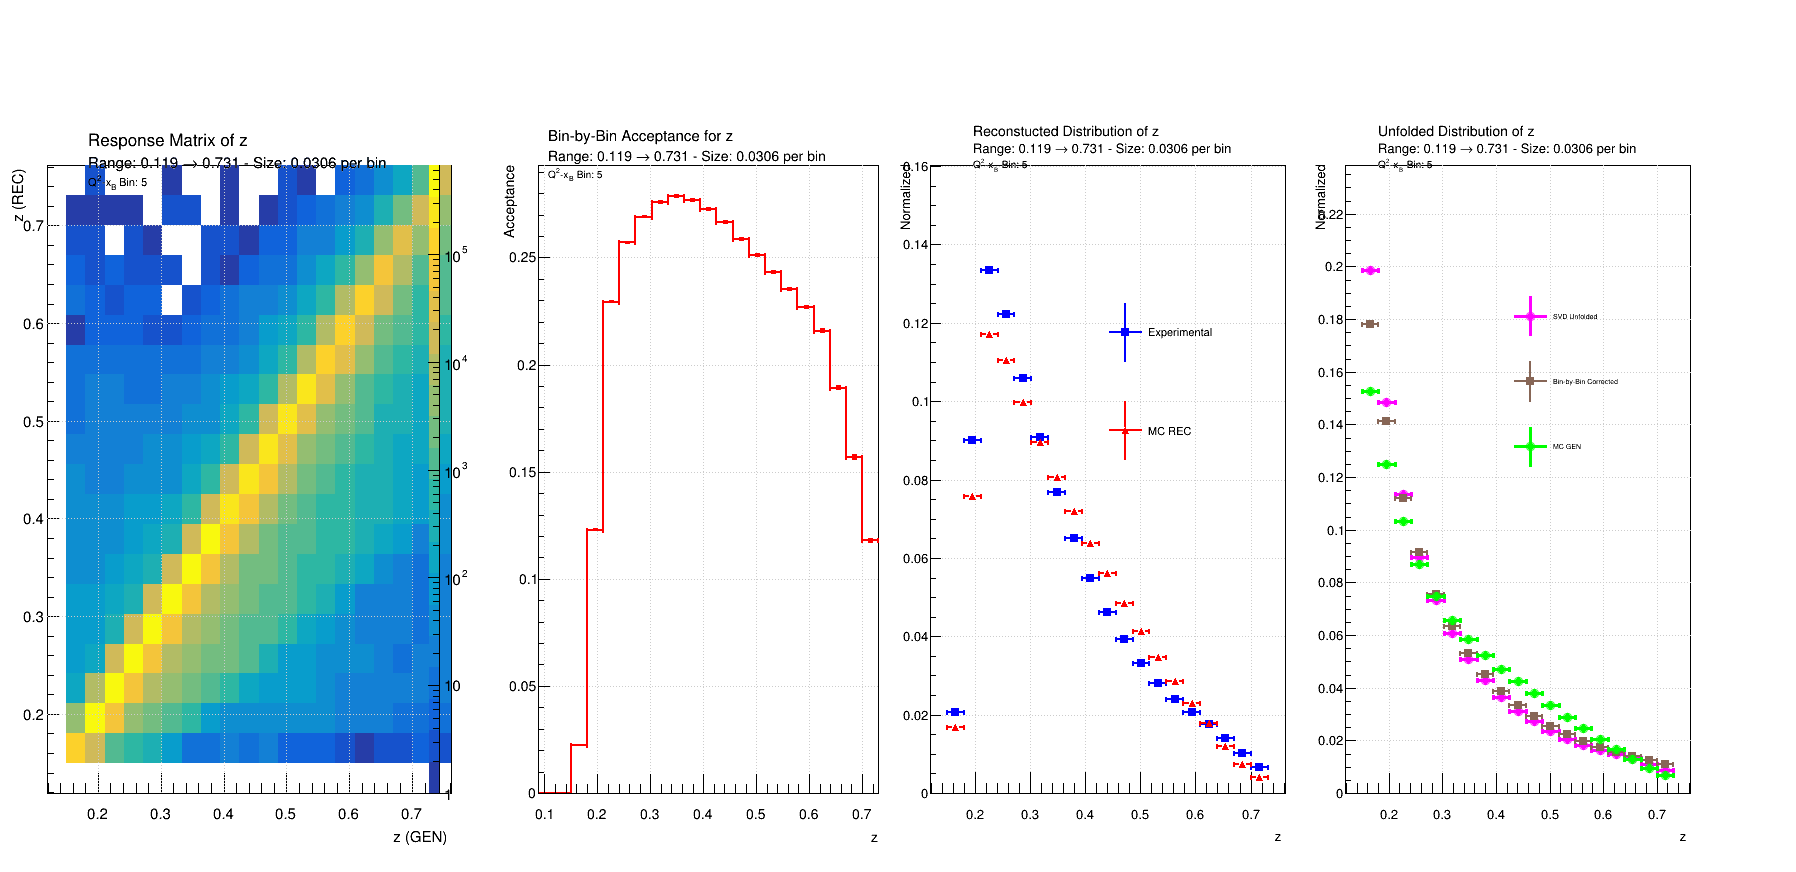

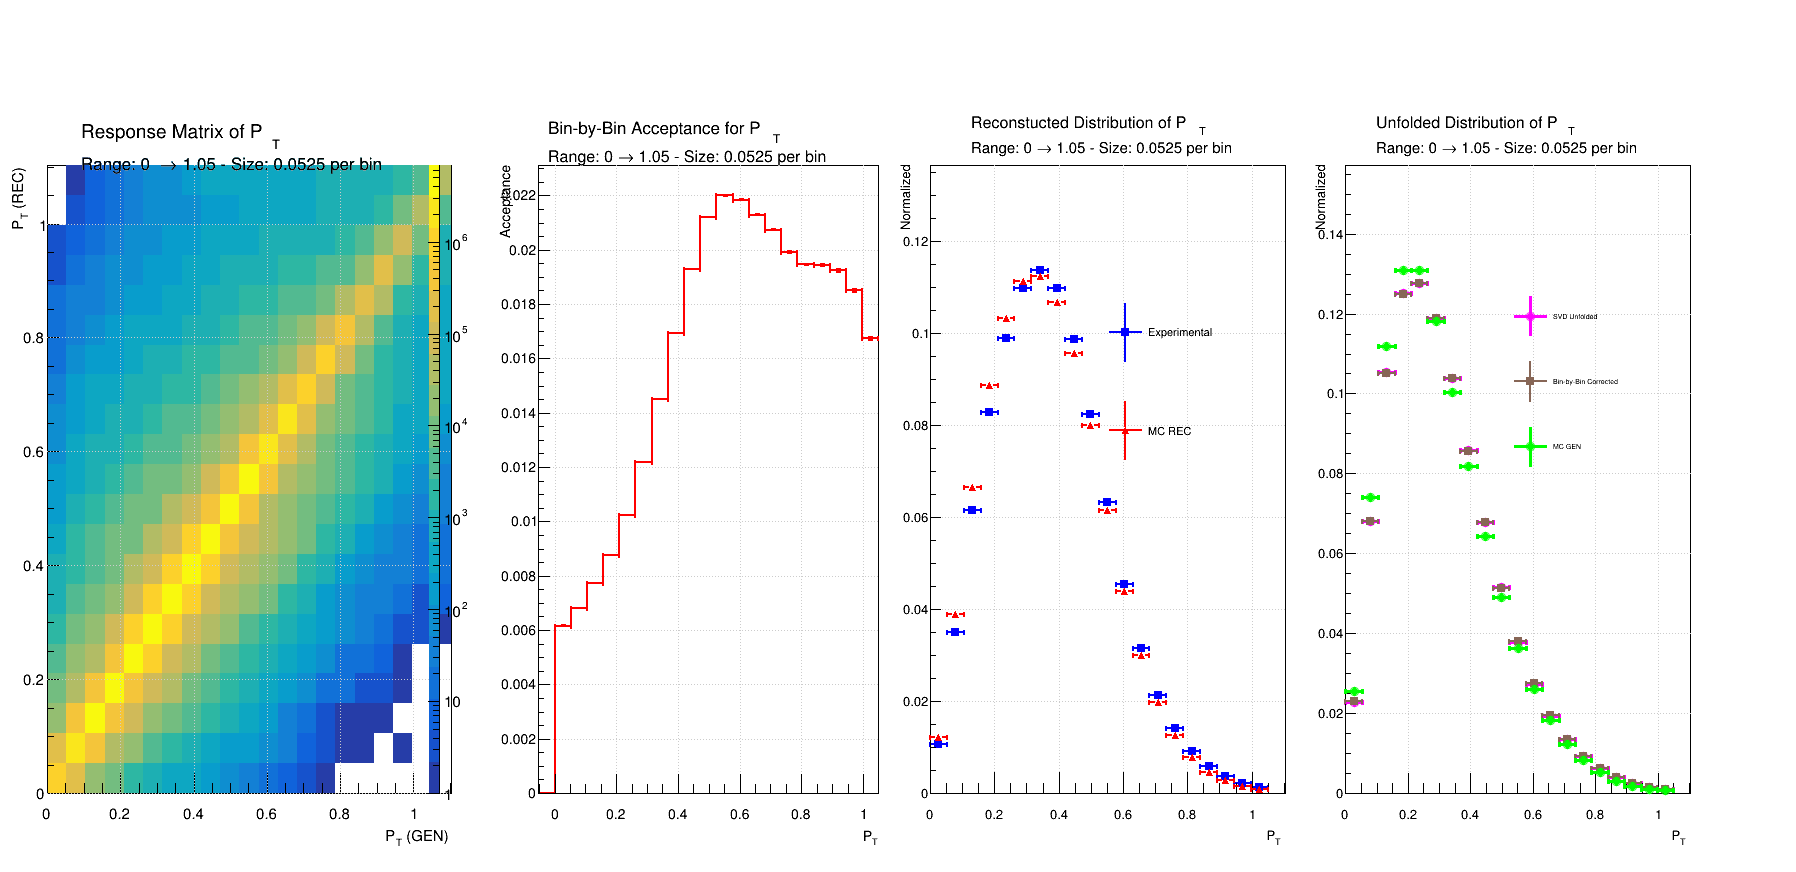

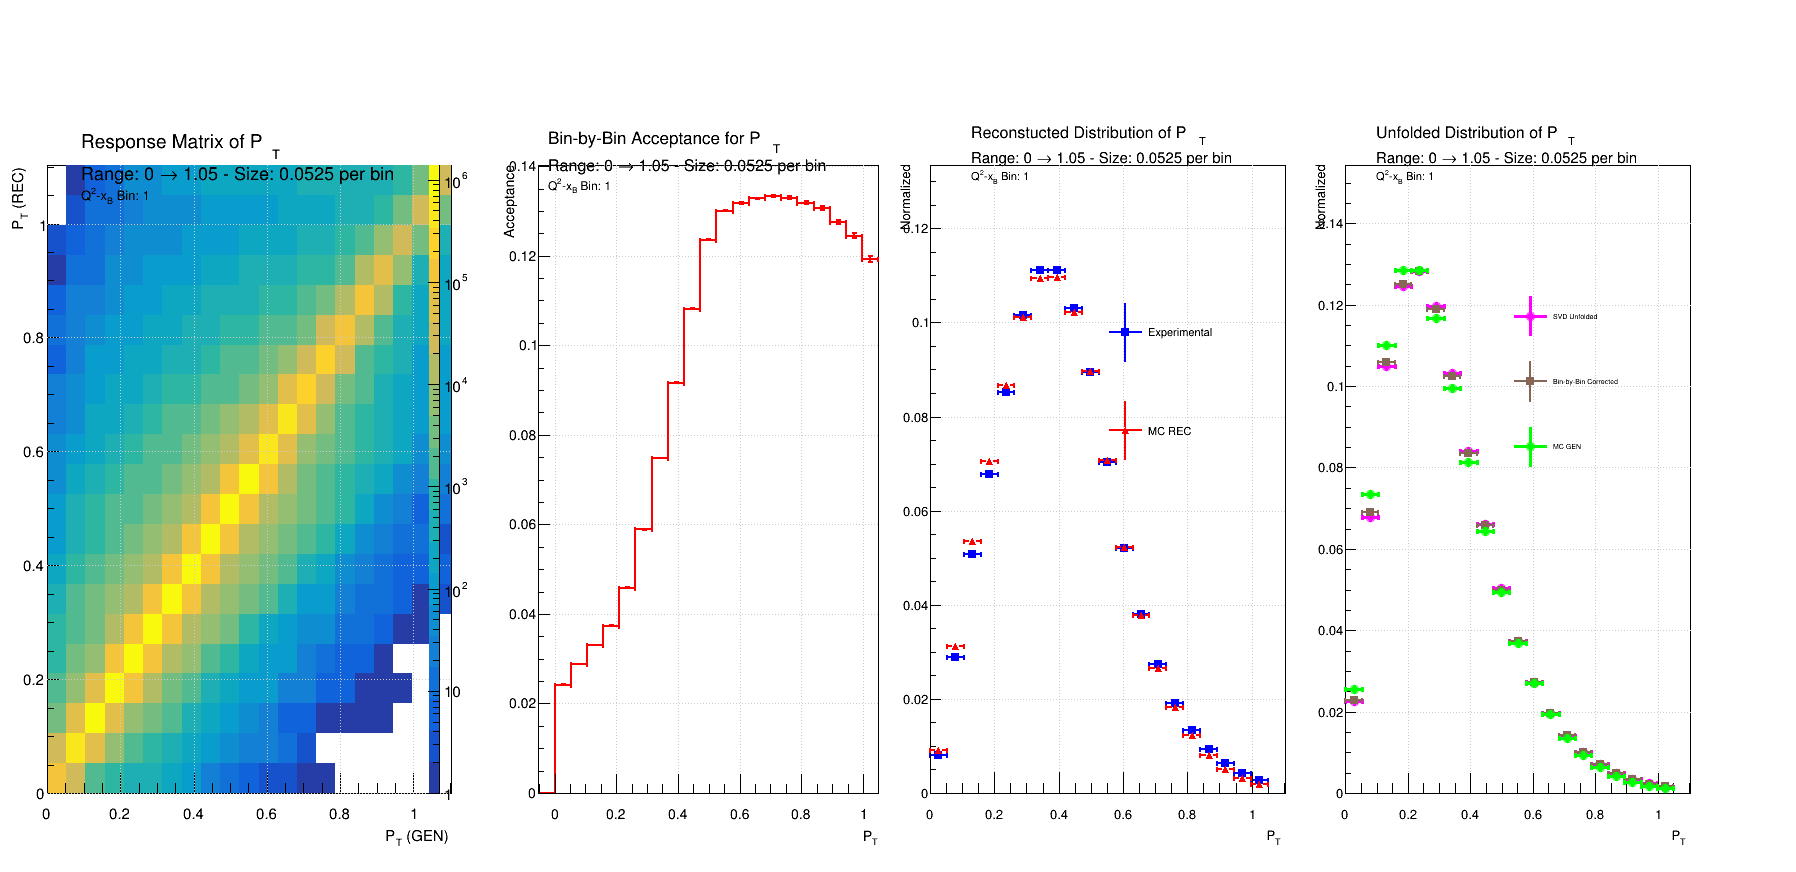

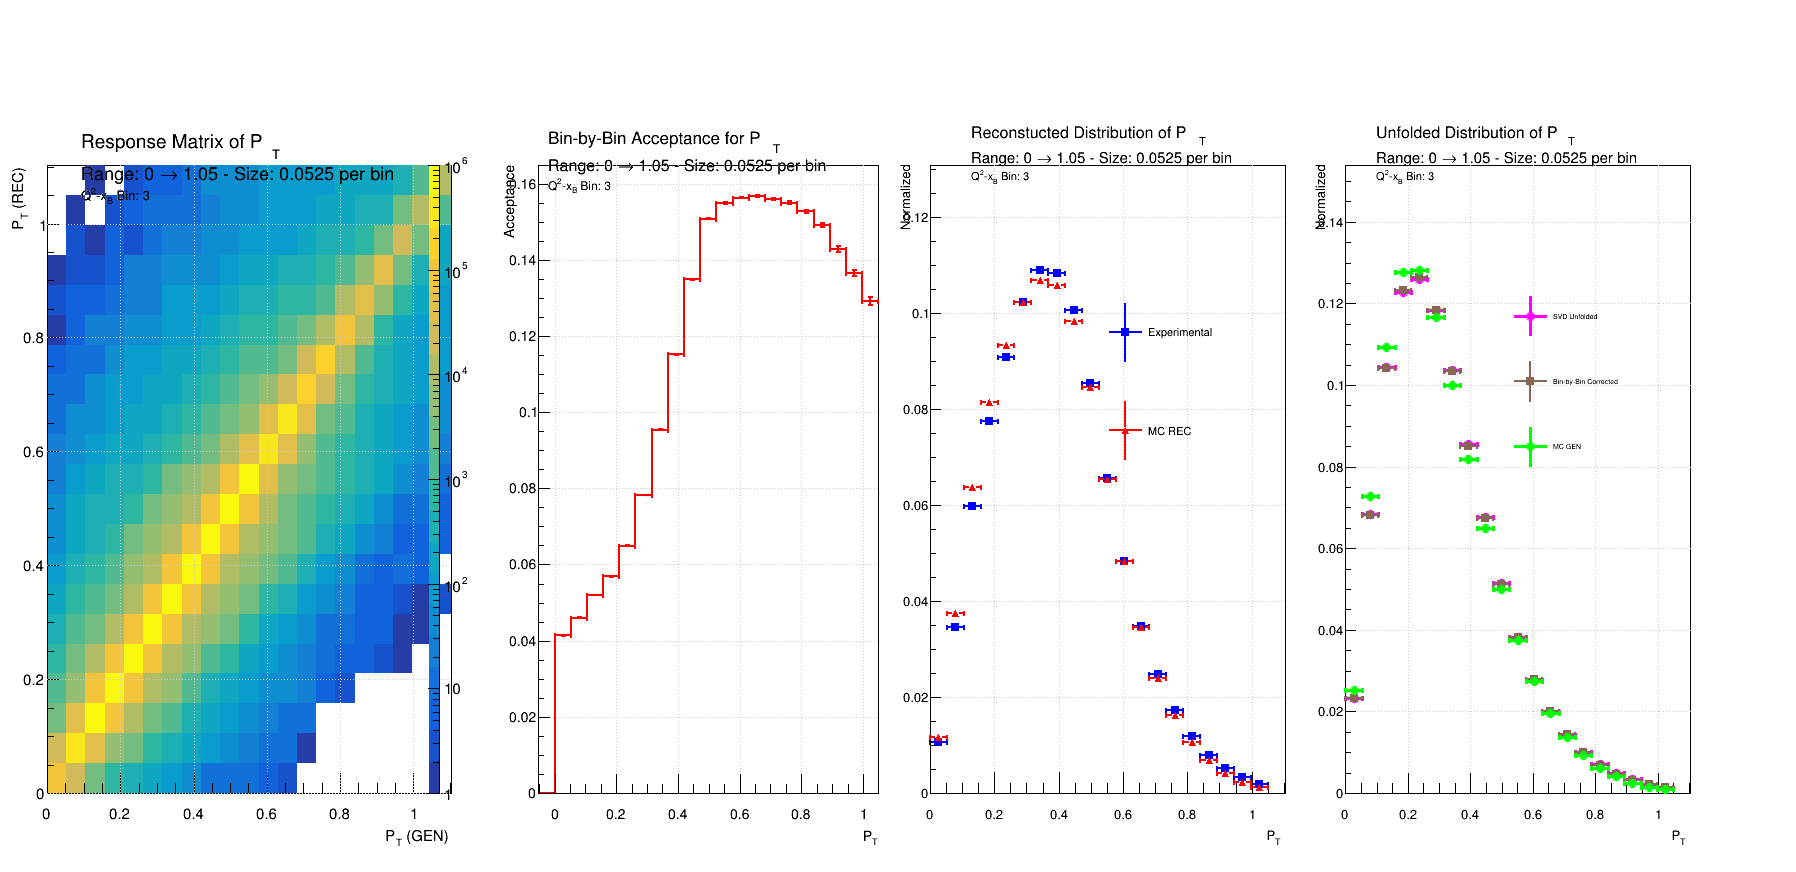

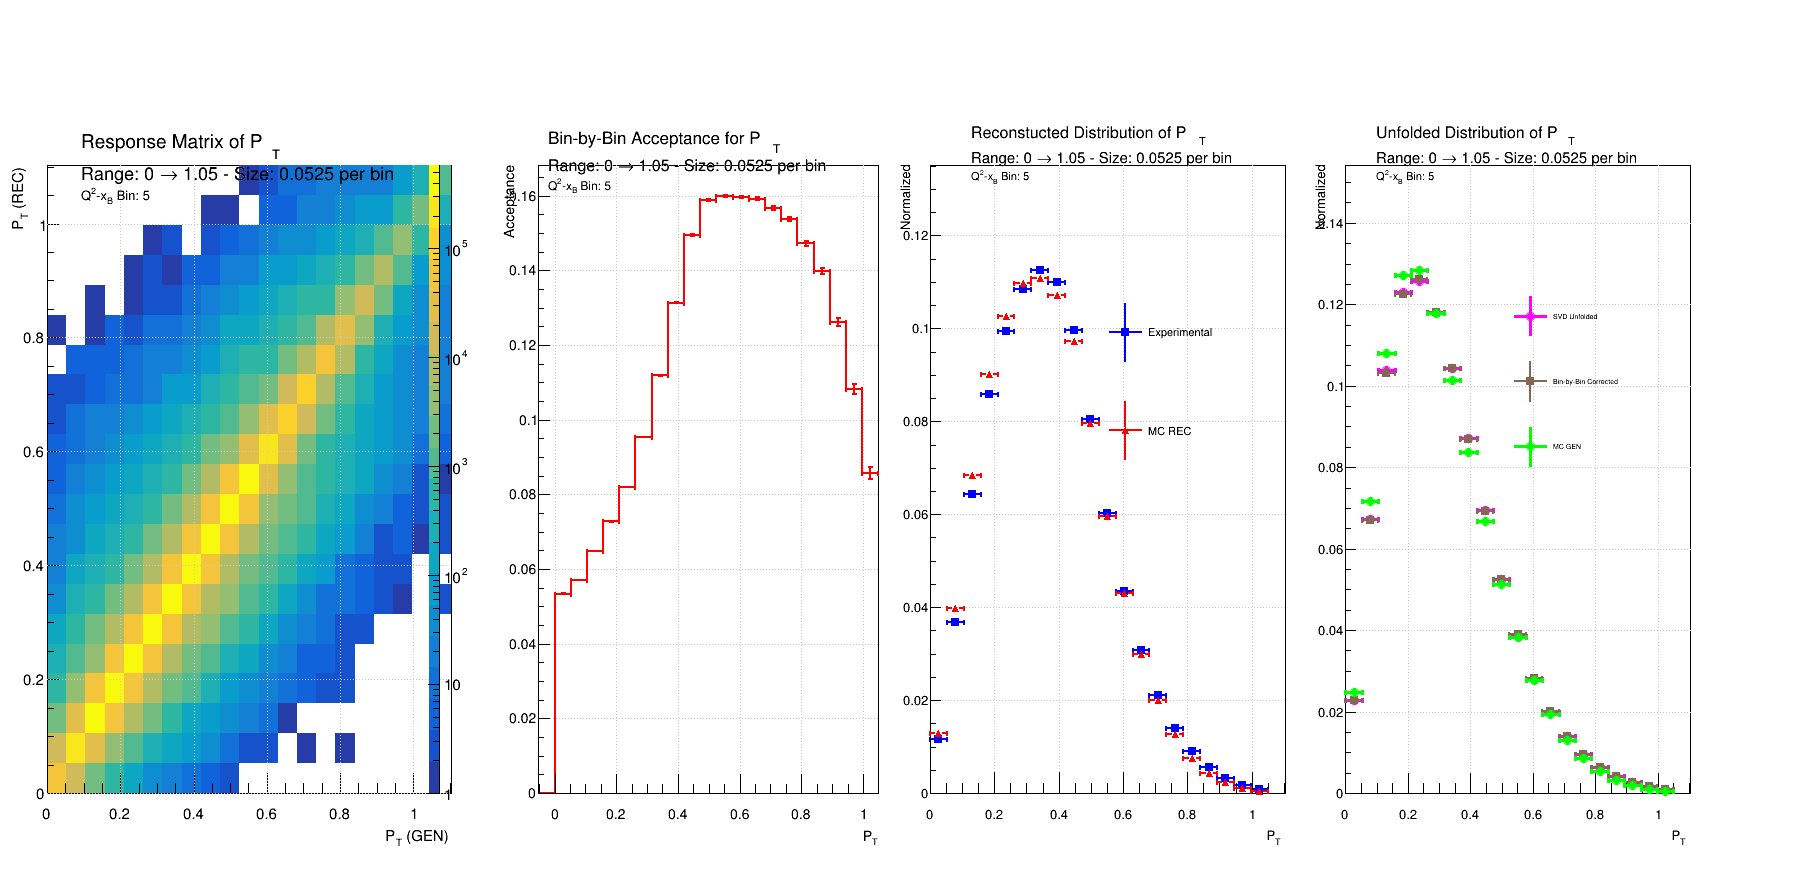

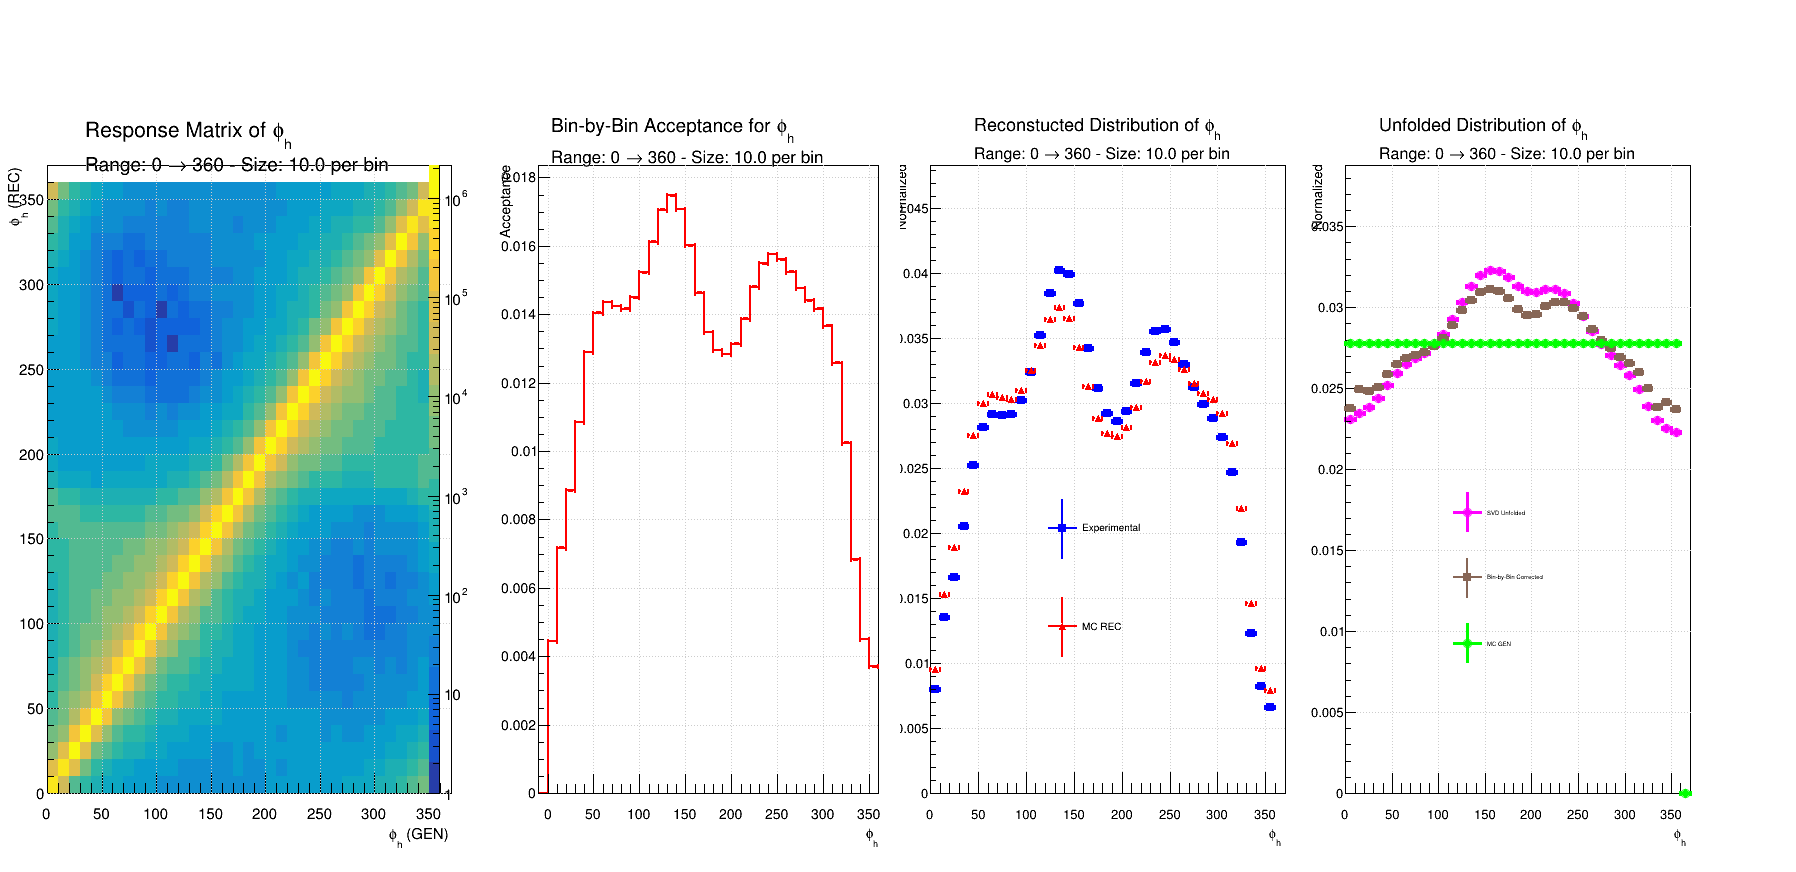

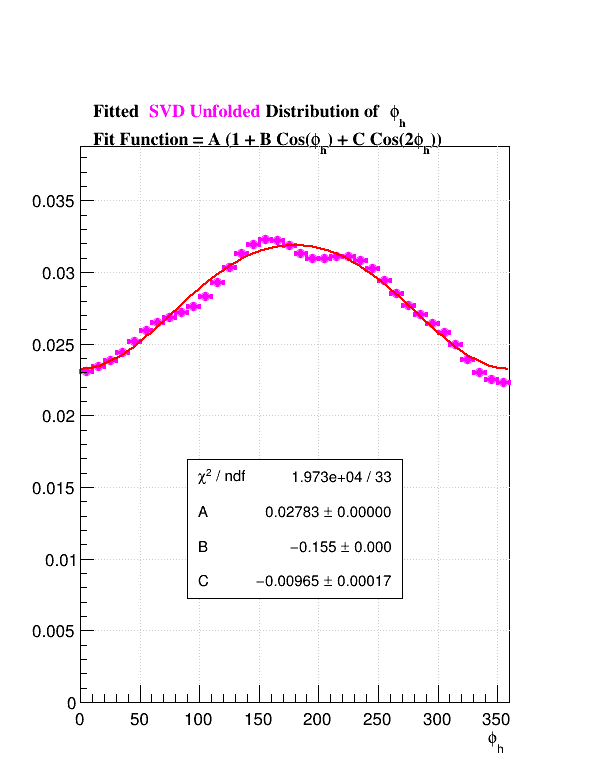

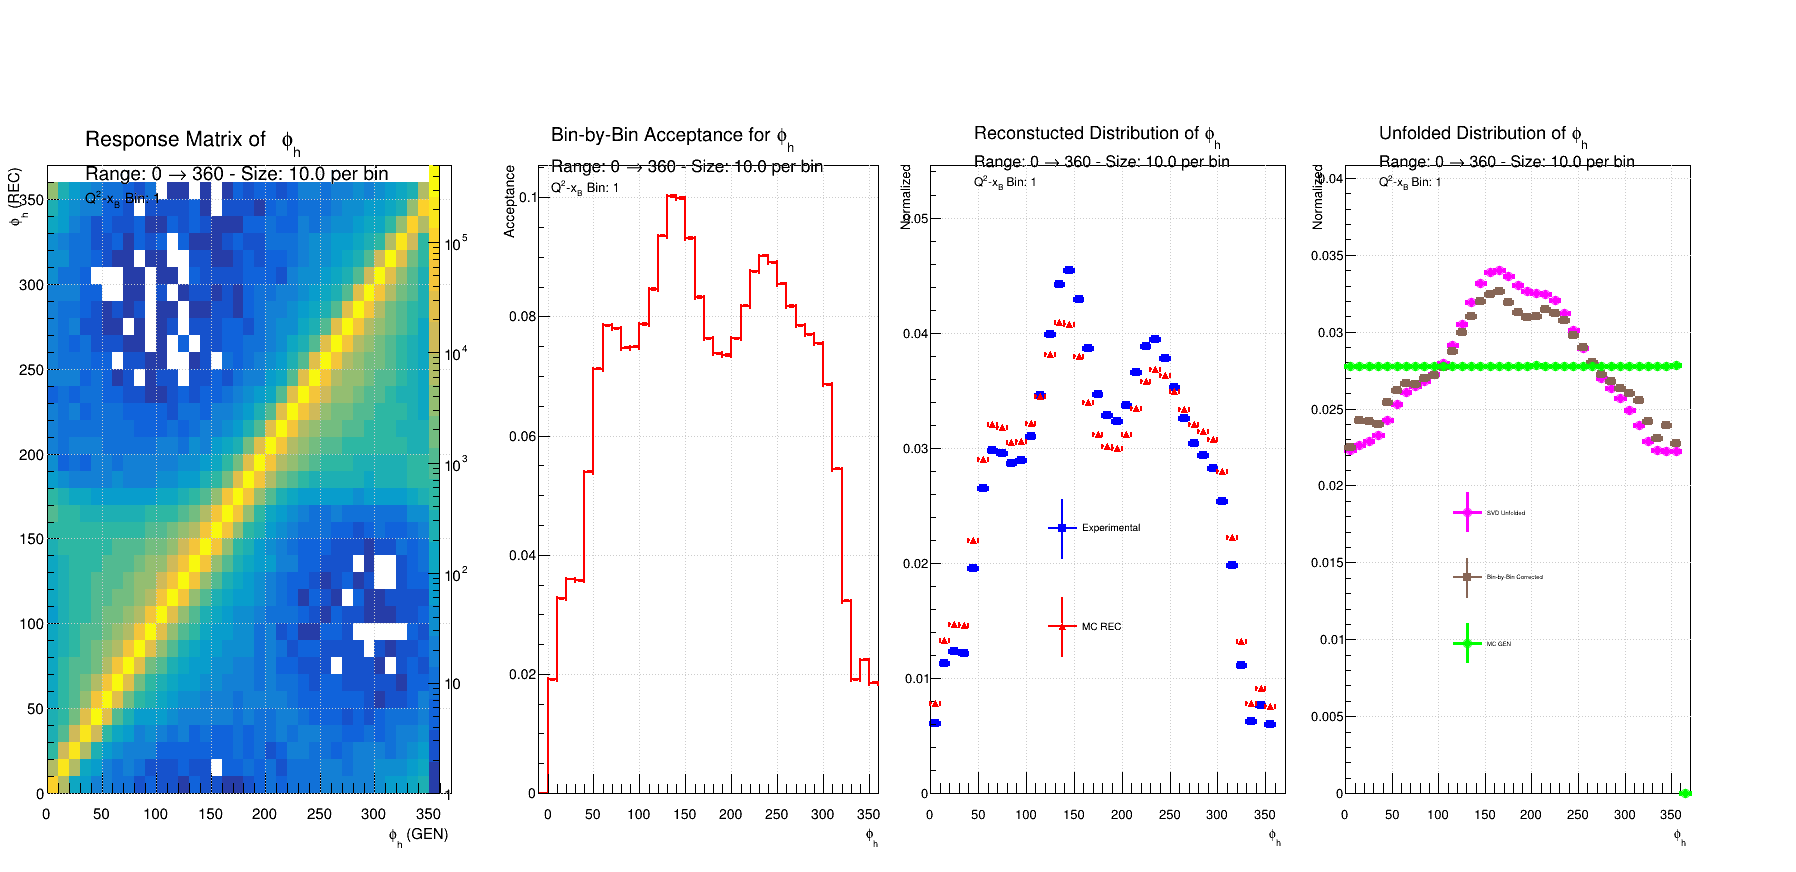

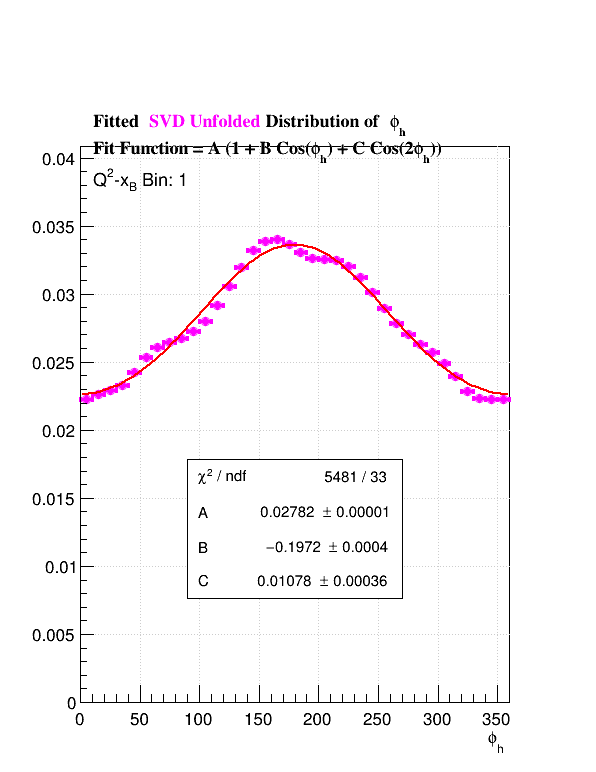

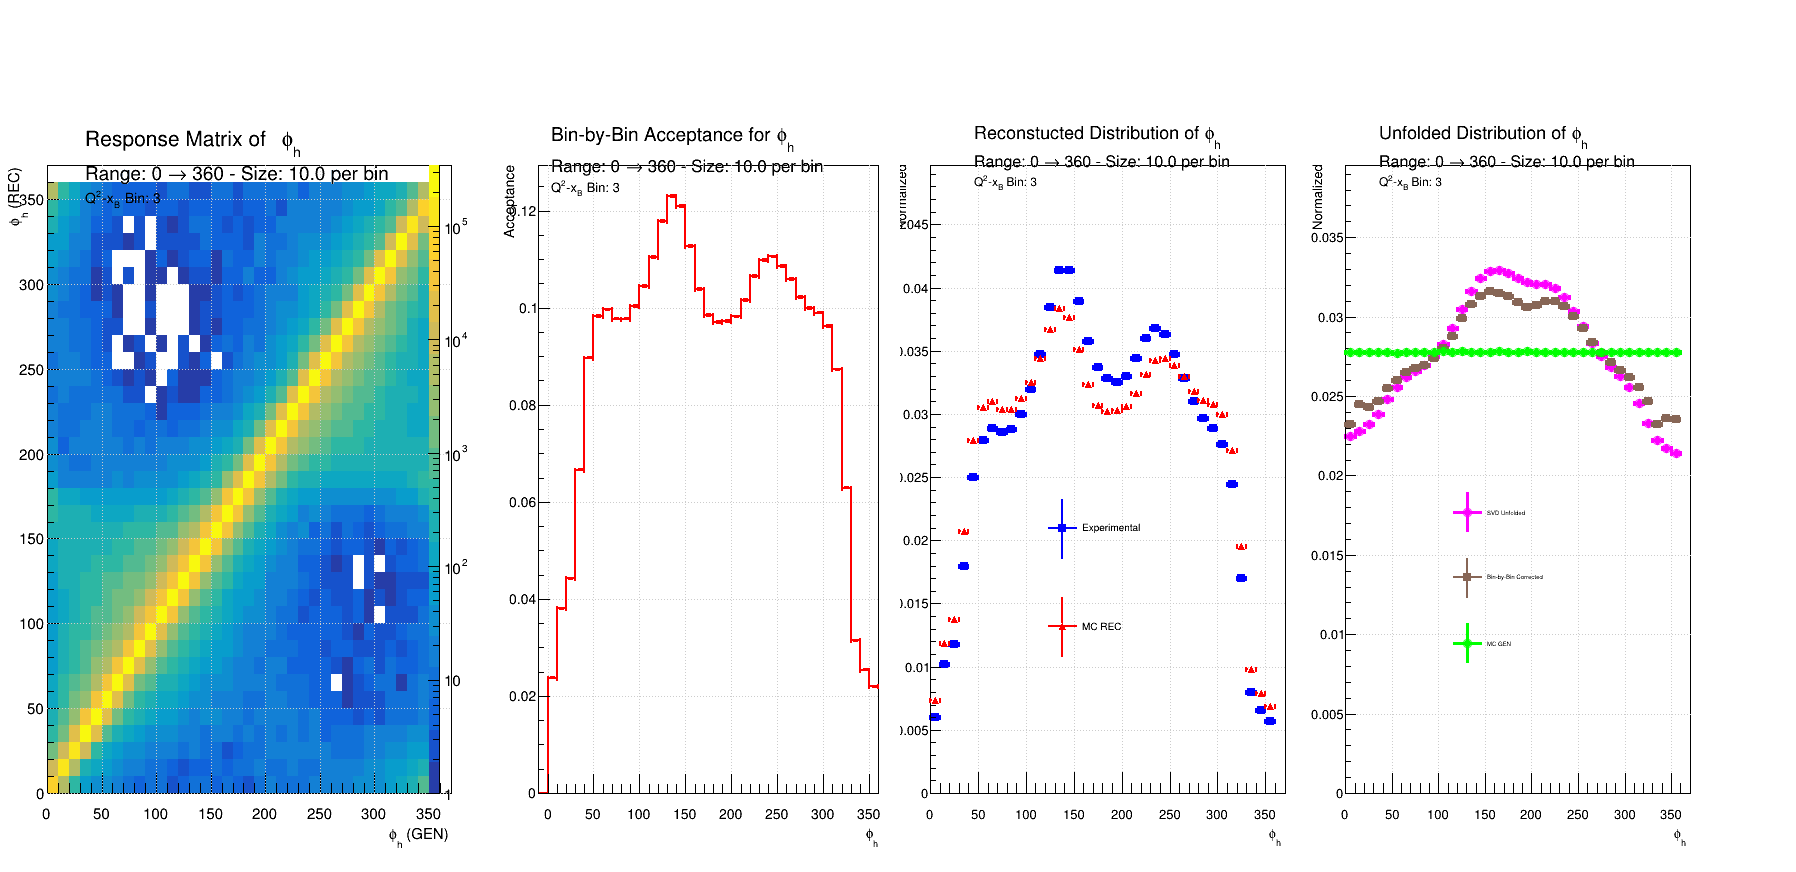

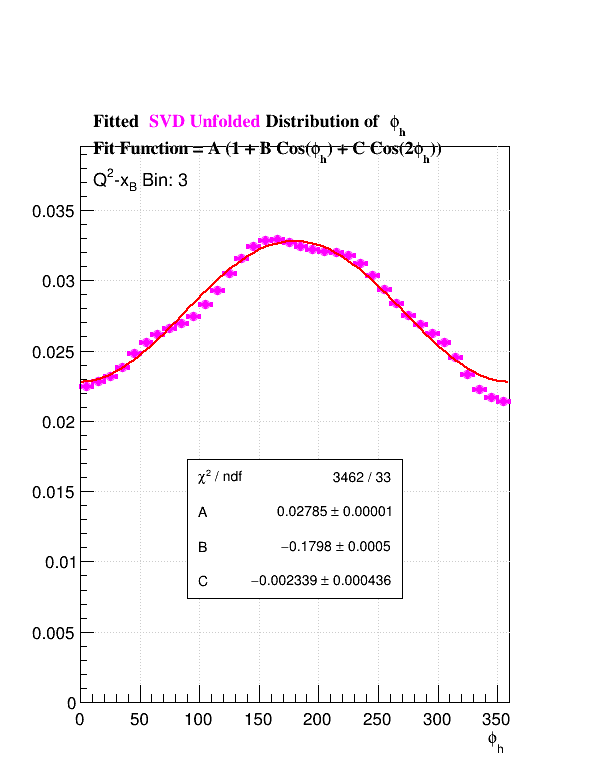

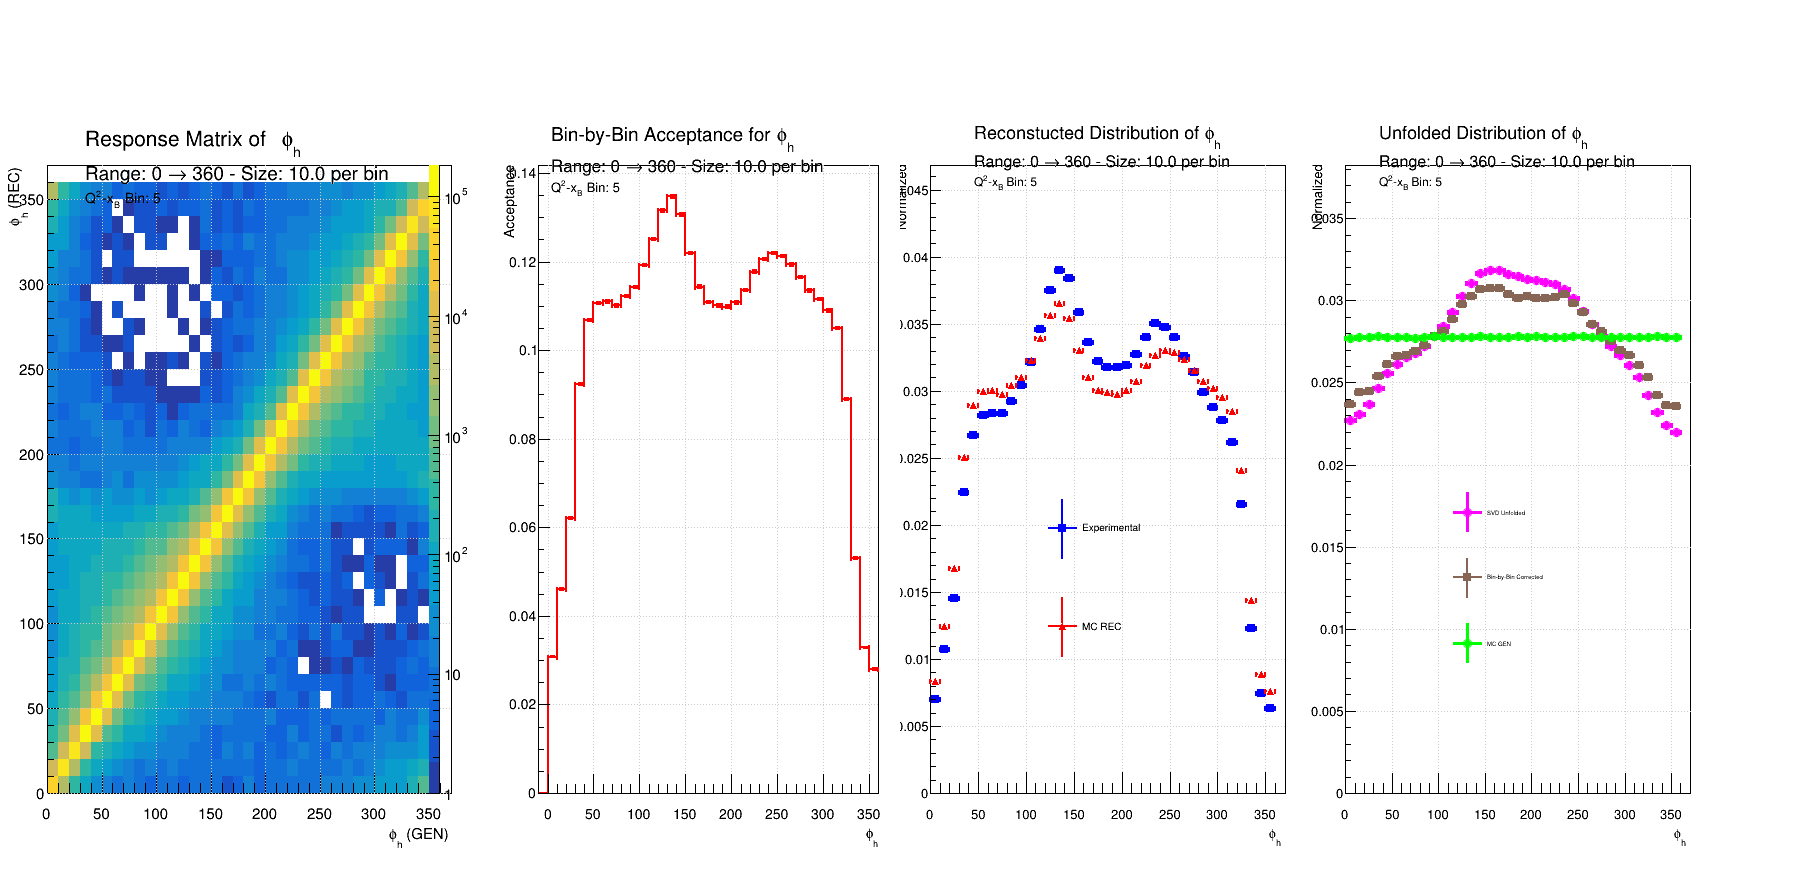

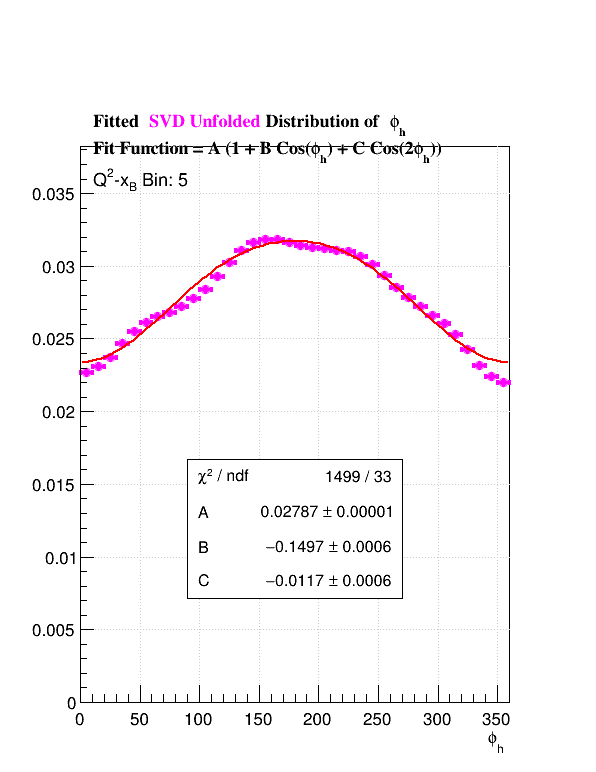

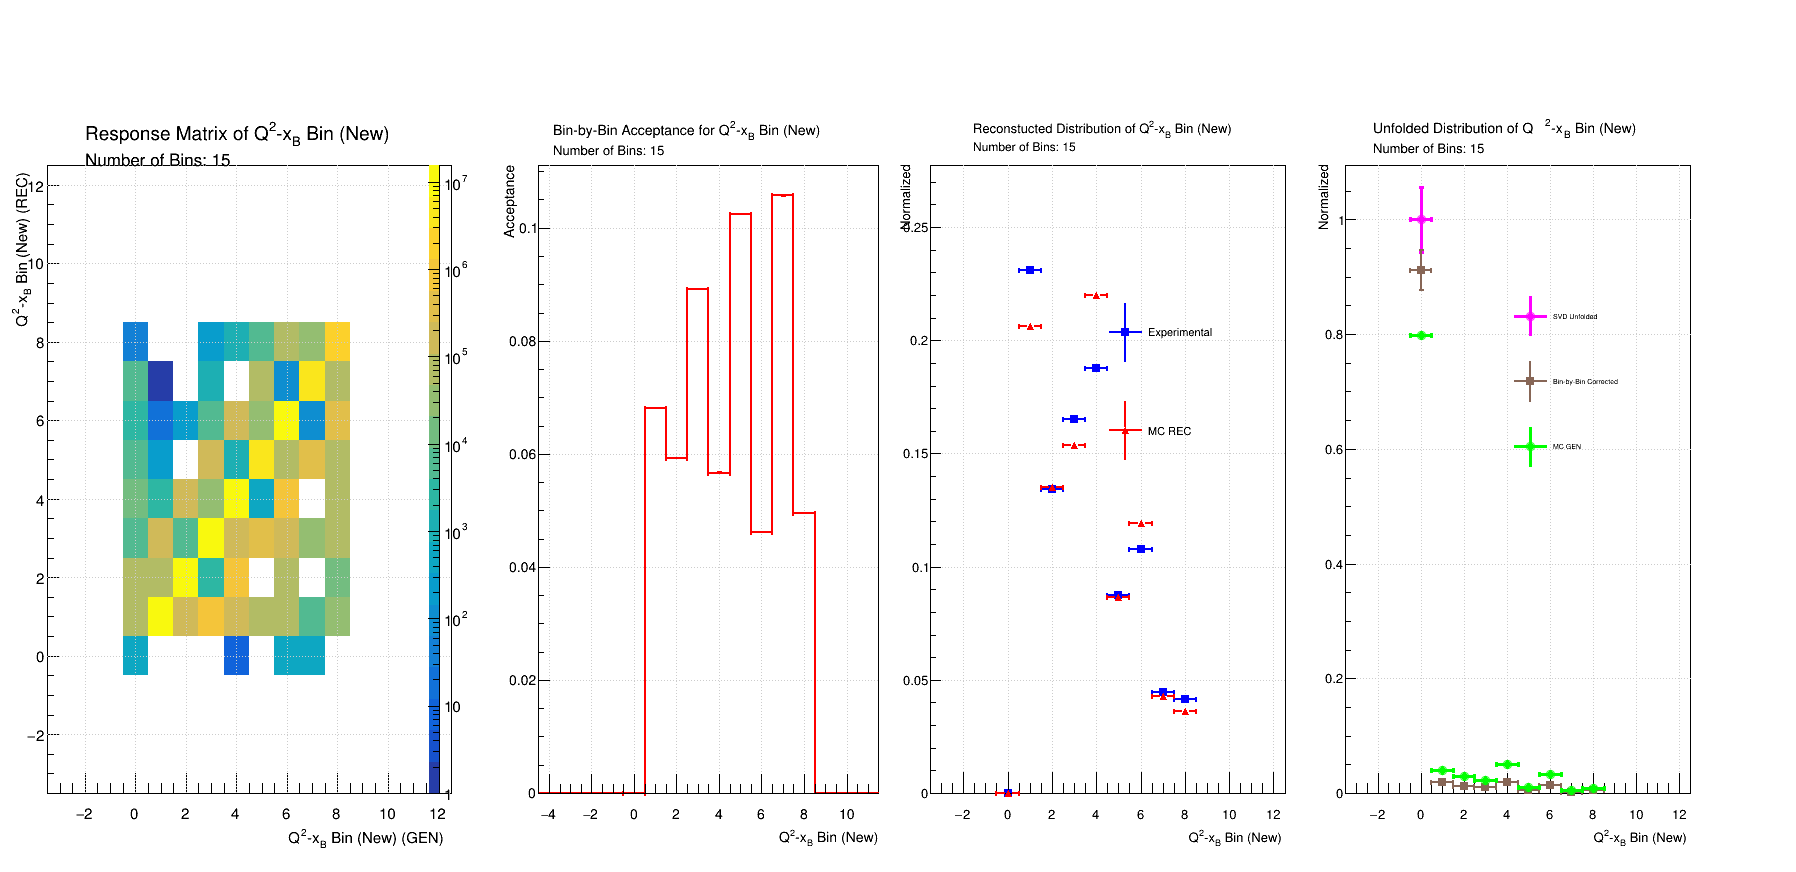

In [24]:
if("rdf" in Data_Choice and "mdf" in Data_Choice and "gdf" in Data_Choice):
    Unfolded_Canvas, Legends, Bin_Unfolded, Bin_Acceptance, Unfolding_Histogram_1_Norm_Clone = {}, {}, {}, {}, {}
    try:
        del already_notified
    except:
        # print("First run of this cell...")
        print("")
    
    count, count_unfolded = 0, 0
    for ii in mdf.GetListOfKeys():
        out_print_main = str(ii.GetName()).replace("mdf", "DataFrame_Type")
        if("DataFrame_Type" not in out_print_main):
            print("".join(["Skipping: ", str(out_print_main)]))
            continue
        
        count += 1
        out_print_main_rdf = out_print_main.replace("DataFrame_Type", "rdf")
        out_print_main_mdf = out_print_main.replace("DataFrame_Type", "mdf")
        out_print_main_gdf = out_print_main.replace("DataFrame_Type", "gdf")
        
        ################################################################################
        ##=============##    Removing Cuts from the Generated files    ##=============##
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_EDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete_SIDIS", "no_cut")
        out_print_main_gdf = out_print_main_gdf.replace("cut_Complete", "no_cut")
        ##=============##    Removing Cuts from the Generated files    ##=============##
        ################################################################################
        
        
        #############################################################################
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        out_print_main_rdf = out_print_main_rdf.replace("_smeared", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear_", "")
        out_print_main_rdf = out_print_main_rdf.replace("smear", "")
        out_print_main_gdf = out_print_main_gdf.replace("_smeared", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear_", "")
        out_print_main_gdf = out_print_main_gdf.replace("smear", "")
        ##=============##  Removing Smearing from Non-MC_REC files  ##=============##
        #############################################################################
        
        
        #############################################################################
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'")
        out_print_main_rdf = out_print_main_rdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        out_print_main_gdf = out_print_main_gdf.replace("'Response_Matrix'", "'Response_Matrix_1D'")
        ##======##  Non-MC_REC Response Matrices (these are not 2D plots)  ##======##
        #############################################################################

        if(out_print_main_mdf not in mdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, str(out_print_main_mdf), color.END, "\n"]))
            continue
        
        if(out_print_main_rdf not in rdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN RDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.BLUE, str(out_print_main_rdf), color.END, "\n"]))
            continue
            
        if(out_print_main_gdf not in gdf.GetListOfKeys()):
            print("".join([color.BOLD, color.RED, "ERROR IN MDF...\n", color.END, color.RED, "Dataframe is missing: ", color.BOLD, color.GREEN, str(out_print_main_gdf), color.END, "\n"]))
            continue
    
    
    #############################################################################
    ##===============##     Unfolding Histogram Procedure     ##===============##
        Conditions_For_Unfolding = ["Unfold" in Histo_Type]
        Conditions_For_Unfolding.append("no_cut" not in str(out_print_main))
        Conditions_For_Unfolding.append("cut_Complete_EDIS" not in str(out_print_main))
        Conditions_For_Unfolding.append("Response_Matrix_Normal" in str(out_print_main))
        Conditions_For_Unfolding.append("Response_Matrix_Normal_1D" not in str(out_print_main))
        
#         if(Common_Name == "Unfolding_Tests_V3_All"):
#             Conditions_For_Unfolding.append("(Smear-Type='')" in str(out_print_main))
#             Conditions_For_Unfolding.append("Q2-xB-Bin=All" in str(out_print_main))
#             Conditions_For_Unfolding.append("Var-D1='phi_t'" in str(out_print_main))
#         else:
#             # For Default (Variable) Selections:
        Conditions_For_Unfolding.append(Histo_Search_Function(Histo_Name=out_print_main, Search_Option="Default", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[0])
        
        if(False not in Conditions_For_Unfolding):
            print(out_print_main)
            ExREAL_1D   = rdf.Get(out_print_main_rdf)
            MC_REC_1D   = mdf.Get(out_print_main_mdf.replace("'Response_Matrix_Normal'", "'Response_Matrix_Normal_1D'"))
            MC_GEN_1D   = gdf.Get(out_print_main_gdf)
            Response_2D = mdf.Get(out_print_main_mdf)
            
            if("phi_t" not in out_print_main and "'phi_t_smeared'" not in out_print_main):
                
                # Extra Y-Bins in 2D Histogram:
                for ybin in range(0, Response_2D.GetYaxis().GetNbins() + 2, 1):
                    Response_2D.SetBinContent(0, ybin, 0)
                    if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                        Response_2D.SetBinContent(1, ybin, 0)
                
                # Extra Bins in 1D Histogram:
                ExREAL_1D.SetBinContent(0, 0)
                MC_REC_1D.SetBinContent(0, 0)
                MC_GEN_1D.SetBinContent(0, 0)
                ExREAL_1D.SetBinContent(ExREAL_1D.GetNbinsX() + 1, 0)
                MC_REC_1D.SetBinContent(MC_REC_1D.GetNbinsX() + 1, 0)
                MC_GEN_1D.SetBinContent(MC_GEN_1D.GetNbinsX() + 1, 0)
                if("'pT'" not in out_print_main and "'pT_smeared'" not in out_print_main):
                    ExREAL_1D.SetBinContent(1, 0)
                    MC_REC_1D.SetBinContent(1, 0)
                    MC_GEN_1D.SetBinContent(1, 0)
                
                
            
            ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Cut: No Cuts", "")).replace("Cut:  No Cuts", ""))
            Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Cut: Complete Set of SIDIS Cuts", "")).replace("Cut:  Complete Set of SIDIS Cuts", ""))
            
            
#             ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
#             MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
#             MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
#             Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 1.48 #rightarrow 11.87", "")).replace("Range: 0.09 #rightarrow 0.826", ""))
            
#             ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
#             MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
#             MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
#             Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: 0 #rightarrow 1.05", "")).replace("Range: 0.119 #rightarrow 0.731", ""))
            
#             ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
#             MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
#             MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
#             Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("Range: -1.5 #rightarrow 9.5", "")).replace("Range: 0 #rightarrow 360", ""))
            
            
            ExREAL_1D.SetTitle((str(ExREAL_1D.GetTitle()).replace("_{t}", "_{h}")))
            ExREAL_1D.GetXaxis().SetTitle((str(ExREAL_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
            MC_REC_1D.SetTitle((str(MC_REC_1D.GetTitle()).replace("_{t}", "_{h}")))
            MC_REC_1D.GetXaxis().SetTitle((str(MC_REC_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
            MC_GEN_1D.SetTitle((str(MC_GEN_1D.GetTitle()).replace("_{t}", "_{h}")))
            MC_GEN_1D.GetXaxis().SetTitle((str(MC_GEN_1D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
            Response_2D.SetTitle((str(Response_2D.GetTitle()).replace("_{t}", "_{h}")))
            Response_2D.GetXaxis().SetTitle((str(Response_2D.GetXaxis().GetTitle()).replace("_{t}", "_{h}")))
            Response_2D.GetYaxis().SetTitle((str(Response_2D.GetYaxis().GetTitle()).replace("_{t}", "_{h}")))
            
            # minBin, maxBin, numBin = [-1.5, 9.5, 13] if("Q2_xB_Bin_2" in out_print_main) else [1.8, 12, 20] if("Q2" in out_print_main) else [0.09, 0.83, 20] if("xB" in out_print_main) else [0.12, 0.75, 20] if("z" in out_print_main) else [0, 360, 36] if("phi_t" in out_print_main) else [0, 1.05, 20] if("pT" in out_print_main) else [0, 360, 36]
            # nBins_CVM = numBin
            # MinBinCVM = ExREAL_1D.FindBin(minBin)
            # MaxBinCVM = ExREAL_1D.FindBin(maxBin)
            # if(Common_Name != "Unfolding_Tests_V3_All"):
            #     ExREAL_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # Experimental/real data (rdf)
            #     MC_REC_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Reconstructed data (mdf)
            #     MC_GEN_1D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)     # MC Generated data (gdf)
            #     Response_2D.GetXaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (X axis --> GEN)
            #     Response_2D.GetYaxis().SetRange(MinBinCVM, MaxBinCVM)   # Response Matrix (Y axis --> REC)
            
            count_unfolded += 1
            try:
                Unfolding_Histograms  = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Default")
                Unfolding_Histogram_1 = Unfolding_Histograms[0]
                
                Bin_Method_Histograms = Unfold_Function(Response_2D, ExREAL_1D, MC_REC_1D, MC_GEN_1D, Method="Bin")
                Bin_Unfolded[out_print_main], Bin_Acceptance[out_print_main] = Bin_Method_Histograms
                
                Unfolded_Canvas[out_print_main] = Canvas_Create(Name=out_print_main, Num_Columns=2, Num_Rows=1, Size_X=1800, Size_Y=900, cd_Space=0)
                (Unfolded_Canvas[out_print_main].cd(1)).Divide(2, 1, 0, 0)
                (Unfolded_Canvas[out_print_main].cd(2)).Divide(2, 1, 0, 0)
                Unfolded_Canvas[out_print_main].Draw()
                
                
##########################################################################################################################################################
    #################################################
    ##=====##=====##   Axis Ranges   ##=====##=====##
                try:
                    Unfolded_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[Unfolding_Histogram_1, Bin_Unfolded[out_print_main], MC_GEN_1D], Norm_Q="Norm")
                except:
                    print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Unfolded)...", color.END]))
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                try:
                    Data_REC_Max = 1.2*Get_Max_Y_Histo_1D(Histo_List=[ExREAL_1D, MC_REC_1D], Norm_Q="Norm")
                except:
                    print("".join([color.BOLD, color.RED, "\nERROR IN Y-AXIS MAXIMUM (Reconstructed)...", color.END]))
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                try:
                    Response_2D.GetXaxis().SetRange(1, Response_2D.GetXaxis().GetNbins() + 2)
                    Response_2D.GetYaxis().SetRange(1, Response_2D.GetYaxis().GetNbins() + 2)
                except:
                    print("".join([color.BOLD, color.RED, "\nERROR IN 2D Matrix Ranges...", color.END]))
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
                try:
                    Bin_Unfolded[out_print_main].GetXaxis().SetRange(1, Bin_Unfolded[out_print_main].GetXaxis().GetNbins() + 1)
                    Unfolding_Histogram_1.GetXaxis().SetRange(1, Unfolding_Histogram_1.GetXaxis().GetNbins() + 1)
                    MC_GEN_1D.GetXaxis().SetRange(1, MC_GEN_1D.GetXaxis().GetNbins() + 1)
                    ExREAL_1D.GetXaxis().SetRange(1, ExREAL_1D.GetXaxis().GetNbins() + 1)
                    MC_REC_1D.GetXaxis().SetRange(1, MC_REC_1D.GetXaxis().GetNbins() + 1)
                except:
                    print("".join([color.BOLD, color.RED, "\nERROR IN 1D X-Axis Ranges...", color.END]))
                    print("".join([color.BOLD, color.RED, "ERROR:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))
    ##=====##=====##   Axis Ranges   ##=====##=====##
    #################################################
    ##=====##=====##  Legends Setup  ##=====##=====##
                if("phi_t" not in out_print_main and "'phi_t_smeared'" not in out_print_main):
                    Legends[(out_print_main, "Unfolded")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                else:
                    Legends[(out_print_main, "Unfolded")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                Legends[(out_print_main, "Unfolded")].SetNColumns(1)
                Legends[(out_print_main, "Unfolded")].SetBorderSize(0)
                Legends[(out_print_main, "Unfolded")].SetFillColor(0)
                Legends[(out_print_main, "Unfolded")].SetFillStyle(0)
                
                if("phi_t" not in out_print_main and "'phi_t_smeared'" not in out_print_main):
                    Legends[(out_print_main, "REC")] = ROOT.TLegend(0.5, 0.5, 0.95, 0.75)
                else:
                    Legends[(out_print_main, "REC")] = ROOT.TLegend(0.35, 0.25, 0.75, 0.5)
                Legends[(out_print_main, "REC")].SetNColumns(1)
                Legends[(out_print_main, "REC")].SetBorderSize(0)
                Legends[(out_print_main, "REC")].SetFillColor(0)
                Legends[(out_print_main, "REC")].SetFillStyle(0)
    ##=====##=====##  Legends Setup  ##=====##=====##
    #################################################
    

##########################################################################################################################################################
##########################################################################################################################################################
    ##=====##=====##   Unfolded Histogram   ##=====##=====##
                Unfolding_Histogram_1.GetYaxis().SetTitle("Normalized")
                Unfolding_Histogram_1.SetTitle(str(Unfolding_Histogram_1.GetTitle()).replace("SVD ", ""))
                Unfolding_Histogram_1.SetMarkerColor(root_color.Pink)
                Unfolding_Histogram_1.SetLineWidth(3)
                Unfolding_Histogram_1.SetLineStyle(1)
                Unfolding_Histogram_1.SetLineColor(root_color.Pink)
                Unfolding_Histogram_1.SetMarkerSize(1)
                Unfolding_Histogram_1.SetMarkerStyle(20)
                
                Bin_Unfolded[out_print_main].GetYaxis().SetTitle("Normalized")
                Bin_Unfolded[out_print_main].SetLineColor(root_color.Brown)
                Bin_Unfolded[out_print_main].SetLineWidth(2)
                Bin_Unfolded[out_print_main].SetLineStyle(1)
                Bin_Unfolded[out_print_main].SetMarkerColor(root_color.Brown)
                Bin_Unfolded[out_print_main].SetMarkerSize(1)
                Bin_Unfolded[out_print_main].SetMarkerStyle(21)
                
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
    ##=====##=====##   Experimental Histogram   ##=====##=====##
                ExREAL_1D.SetTitle(str(ExREAL_1D.GetTitle()).replace("Experimental", "Reconstucted"))
                ExREAL_1D.GetYaxis().SetTitle("Normalized")
                ExREAL_1D.GetXaxis().SetTitle(str(ExREAL_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                ExREAL_1D.SetLineColor(root_color.Blue)
                ExREAL_1D.SetLineWidth(2)
                ExREAL_1D.SetLineStyle(1)
                ExREAL_1D.SetMarkerColor(root_color.Blue)
                ExREAL_1D.SetMarkerSize(1)
                ExREAL_1D.SetMarkerStyle(21)
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
    ##=====##=====##   MC REC Histogram   ##=====##=====##
                MC_REC_1D.GetYaxis().SetTitle("Normalized")
                MC_REC_1D.GetXaxis().SetTitle(str(MC_REC_1D.GetXaxis().GetTitle()).replace("(REC)", ""))
                MC_REC_1D.SetLineColor(root_color.Red)
                MC_REC_1D.SetLineWidth(2)
                MC_REC_1D.SetLineStyle(1)
                MC_REC_1D.SetMarkerColor(root_color.Red)
                MC_REC_1D.SetMarkerSize(1)
                MC_REC_1D.SetMarkerStyle(22)
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
    ##=====##=====##   MC GEN Histogram   ##=====##=====##
                MC_GEN_1D.SetLineColor(root_color.Green)
                MC_GEN_1D.SetLineWidth(3)
                MC_GEN_1D.SetLineStyle(1)
                MC_GEN_1D.SetMarkerColor(root_color.Green)
                MC_GEN_1D.SetMarkerSize(1)
                MC_GEN_1D.SetMarkerStyle(20)
                MC_GEN_1D.GetYaxis().SetTitle("Normalized")
##########################################################################################################################################################
##########################################################################################################################################################

##########################################################################################################################################################
##########################################################################################################################################################
    ##=====##=====##   Drawing the Bin-by-Bin Acceptance Histogram (cd: 2-1)   ##=====##=====##
                Bin_Acceptance[out_print_main].SetLineColor(root_color.Red)
                Bin_Acceptance[out_print_main].SetLineWidth(2)
                Bin_Acceptance[out_print_main].SetMarkerColor(root_color.Red)
##########################################################################################################################################################
##########################################################################################################################################################
            
    
    
    
    
#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################
    
    ##################################################################
    ##==========##==========##     CD 1     ##==========##==========##
    ##################################################################
    ##=====##=====##   Drawing the Response Matrix    ##=====##=====##
                Draw_Canvas(canvas=Unfolded_Canvas[out_print_main].cd(1), cd_num=1, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)
                ROOT.gPad.SetLogz(1)
                Response_2D.Draw("colz")
                Unfolded_Canvas[out_print_main].Modified()
                Unfolded_Canvas[out_print_main].Update()
                palette_move(canvas=Unfolded_Canvas[out_print_main], histo=Response_2D, x_left=0.905, x_right=0.925, y_up=0.9, y_down=0.1)
    
    ##################################################################
    ##==========##==========##     CD 2     ##==========##==========##
    ##################################################################
                Draw_Canvas(canvas=Unfolded_Canvas[out_print_main].cd(2), cd_num=2, left_add=0.1, right_add=0.05, up_add=0.1, down_add=0.1)
        
                Unfolding_Histogram_1_Norm = (Unfolding_Histogram_1.DrawNormalized("PL E1 same"))
                Unfolding_Histogram_1_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                Legends[(out_print_main, "Unfolded")].AddEntry(Unfolding_Histogram_1, "SVD Unfolded", "lpE")
                
                Bin_Unfolded[out_print_main].DrawNormalized("PL E1 same")
                # Bin_Unfolded[(out_print_main, "Norm")] = (Bin_Unfolded[out_print_main].DrawNormalized("PL E1 same"))
                # Bin_Unfolded[(out_print_main, "Norm")].GetYaxis().SetRangeUser(0, Unfolded_Max)
                Legends[(out_print_main, "Unfolded")].AddEntry(Bin_Unfolded[out_print_main], "Bin-by-Bin Corrected", "lpE")
                # Legends[(out_print_main, "Unfolded")].Draw("same")
                
                # MC_GEN_1D.Draw("Hist E1 same")
                MC_GEN_1D.DrawNormalized("PL E1 same")
                # MC_GEN_1D_Norm = MC_GEN_1D.DrawNormalized("PL E1 same")
                # MC_GEN_1D_Norm.GetYaxis().SetRangeUser(0, Unfolded_Max)
                Legends[(out_print_main, "Unfolded")].AddEntry(MC_GEN_1D, "MC GEN", "lpE")
                
                Legends[(out_print_main, "Unfolded")].Draw("same")
    
    ##################################################################
    ##==========##==========##     CD 3     ##==========##==========##
    ##################################################################
                Draw_Canvas(canvas=Unfolded_Canvas[out_print_main].cd(1), cd_num=2, left_add=0.15, right_add=0.05, up_add=0.1, down_add=0.1)
                Bin_Acceptance[out_print_main].Draw("same E1 H")
                # Bin_Acceptance[out_print_main].DrawNormalized("Hist E1 same")
                
    ##################################################################
    ##==========##==========##     CD 4     ##==========##==========##
    ##################################################################
                Draw_Canvas(canvas=Unfolded_Canvas[out_print_main].cd(2), cd_num=1, left_add=0.075, right_add=0.05, up_add=0.1, down_add=0.1)
                ExREAL_1D_Norm = (ExREAL_1D.DrawNormalized("PL E1 same"))
                ExREAL_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                Legends[(out_print_main, "REC")].AddEntry(ExREAL_1D, "Experimental", "lpE")
                
                MC_REC_1D.DrawNormalized("PL E1 same")
                # MC_REC_1D_Norm = (MC_REC_1D.DrawNormalized("PL E1 same"))
                # MC_REC_1D_Norm.GetYaxis().SetRangeUser(0, Data_REC_Max)
                Legends[(out_print_main, "REC")].AddEntry(MC_REC_1D, "MC REC", "lpE")
                
                Legends[(out_print_main, "REC")].Draw("same")
                            
#########################################################################################################################
##==================================#################################################==================================##
##==========##==========##==========##   Openning Canvas Pads to Draw Histograms   ##==========##==========##==========##
##==================================#################################################==================================##
#########################################################################################################################
    
    
                Unfolded_Canvas[out_print_main].Modified()
                Unfolded_Canvas[out_print_main].Update()
            
            

            

                if("phi_t" in out_print_main):
                    # fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h}) + D Cos(3#phi_{h})"
                    # fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)) + [D]*cos(3*x*(3.1415926/180))"
                    fit_function_title = "A + B Cos(#phi_{h}) + C Cos(2#phi_{h})"
                    fit_function = "[A] + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180))"


                    fit_function_title = "A (1 + B Cos(#phi_{h}) + C Cos(2#phi_{h}))"
                    fit_function = "[A]*(1 + [B]*cos(x*(3.1415926/180)) + [C]*cos(2*x*(3.1415926/180)))"

                    
                    Q2_xB_Bin_Title = "" if("Q2-xB-Bin=All" in str(out_print_main)) else "".join(["Q^{2}-x_{B} Bin: ", "1" if("Q2-xB-Bin=1" in str(out_print_main)) else "2" if("Q2-xB-Bin=2" in str(out_print_main)) else "3" if("Q2-xB-Bin=3" in str(out_print_main)) else "4" if("Q2-xB-Bin=4" in str(out_print_main)) else "5" if("Q2-xB-Bin=5" in str(out_print_main)) else "6" if("Q2-xB-Bin=6" in str(out_print_main)) else "7" if("Q2-xB-Bin=7" in str(out_print_main)) else "8" if("Q2-xB-Bin=8" in str(out_print_main)) else "9" if("Q2-xB-Bin=9" in str(out_print_main)) else "Error"])

                ##################################################################
                ##==========##         Matrix Unfolded Fits         ##==========##
                ##################################################################
                    Unfolded_Canvas["".join([str(out_print_main), "extra"])] = Canvas_Create(Name="".join([str(out_print_main), "extra"]), Num_Columns=1, Num_Rows=1, Size_X=600, Size_Y=800, cd_Space=0)
                    Unfolded_Canvas["".join([str(out_print_main), "extra"])].Draw()
                    Draw_Canvas(Unfolded_Canvas["".join([str(out_print_main), "extra"])], 1, 0.15)
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])] = Unfolding_Histogram_1_Norm.Clone()
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].SetTitle("".join(["#splitline{#splitline{", root_color.Bold, "{Fitted #color[", str(root_color.Pink),"]{SVD Unfolded} Distribution of #phi_{h}}}{", root_color.Bold, "{Fit Function = ", str(fit_function_title), "}}}{", str(Q2_xB_Bin_Title), "}"]))
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].GetYaxis().SetTitle("")
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].GetXaxis().SetTitle(str(Unfolding_Histogram_1_Norm.GetXaxis().GetTitle()).replace("(REC)", ""))
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].GetYaxis().SetRangeUser(0, Unfolded_Max)
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].Draw("PL E1 same")
                    Unfolded_Fit_Function = ROOT.TF1("Unfolded_Fit_Function", str(fit_function), 0, 360)
                    A_Unfold, B_Unfold, C_Unfold = Full_Calc_Fit(Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])])
                    # print("\n".join([str(A_Unfold), str(B_Unfold), str(C_Unfold)]))
    #                             Unfolded_Fit_Function.SetParameter(0, A_Unfold)
    #                             Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Unfold if(A_Unfold > 0) else 1.25*A_Unfold, 1.25*A_Unfold if(A_Unfold > 0) else 0.85*A_Unfold)
    #                             Unfolded_Fit_Function.SetParameter(1, B_Unfold)
    #                             Unfolded_Fit_Function.SetParLimits(1, 0.65*B_Unfold if(B_Unfold > 0) else 1.45*B_Unfold, 1.45*B_Unfold if(B_Unfold > 0) else 0.65*B_Unfold)
    #                             Unfolded_Fit_Function.SetParameter(2, C_Unfold)
    #                             Unfolded_Fit_Function.SetParLimits(2, 0.65*C_Unfold if(C_Unfold > 0) else 1.45*C_Unfold, 1.45*C_Unfold if(C_Unfold > 0) else 0.65*C_Unfold)
                    # Unfolded_Fit_Function.SetParameter(0, A_Calc_Fit(Unfolded_C_clone))
                    # Unfolded_Fit_Function.SetParLimits(0, 0.85*A_Calc_Fit(Unfolded_C_clone), 1.25*A_Calc_Fit(Unfolded_C_clone))
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].Fit(Unfolded_Fit_Function, "RQ")
                    # statbox_move_new(Histogram=Unfolding_Histogram_1_Norm, Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)
                    statbox_move(Histogram=Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])], Canvas=Unfolded_Canvas["".join([str(out_print_main), "extra"])], Default_Stat_Obj="", Y1_add=0.25, Y2_add=0.45, X1_add=0.35, X2_add=0.75)#, Print_Method="norm"):
                    # Unfolded_C_clone.ShowPeaks()
                    Unfolding_Histogram_1_Norm_Clone["".join([str(out_print_main), "extra"])].GetXaxis().SetRangeUser(0, 360)


            except:
                print("".join([color.BOLD, color.RED, "ERROR IN UNFOLDING:\n", color.END, color.RED, str(traceback.format_exc()), color.END]))

            print("".join([color.CYAN, color.BOLD, "Finished Unfolding: ", str(Histo_Search_Function(Histo_Name=out_print_main, Search_Option="Default_Var_1D", Data_Options=Data_Choice, Histo_Options=Histo_Type, Smear_Options=Smear_Q_List, Cut_Options=Cut_List, Variables=Var_List, Variables_2D=Var_List_2D)[1]), color.END, "\n"]))
            
        elif("Unfold" not in Histo_Type):
            try:
                already_notified += 1
            except:
                print("".join([color.BOLD, color.BLUE, "'Unfold' option not included in Histo_Type list (unfolding not done)", color.END]))
                already_notified = 1
        
    ##===============##     Unfolding Histogram Procedure     ##===============##
    #############################################################################
        
        
    
    
        # if("Response_Matrix_Normal" in str(out_print_main)):
        #     print(out_print_main)
    
    # print("still making this cell...")
    print("".join(["Total: ", str(count)]))
    print("".join(["Total (Unfolded): ", str(count_unfolded)]))
    
else:
    print("Must select all of the Datatypes ('rdf', 'mdf', and 'gdf') to run this cell")
    
print("".join([color.BOLD, "\nDone\n", color.END]))
try:
    alert()
except:
    print("Alerts have not been set...")

.

.

.

.

In [19]:
%%timeit -r 500 -n 10000
# %%time
test = ["test", "test2"]
test = ["test2", "test", "test2"]



73.2 ns ± 2.44 ns per loop (mean ± std. dev. of 500 runs, 10000 loops each)


In [20]:
%%timeit -r 500 -n 10000
# %%time
test = ["test", "test2"]
test2 = ["test2", "test", "test2"]



73.9 ns ± 8.44 ns per loop (mean ± std. dev. of 500 runs, 10000 loops each)
